In [1]:
from tensorflow.keras.models import load_model
from VisionUtils import *
#from imgaug import augmenters as iaa
from Manager import *
from sklearn.model_selection import train_test_split

import tensorflow.keras.backend as k
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
#import imgaug
import shutil
import tqdm
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [2]:
print(tf.test.is_gpu_available())

True


In [3]:
# tf.data api batch_size
BATCH_SIZE = 32

In [4]:
m = load_model("Models/FaceNet/model/saved_model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
### Important Dirrectories
IMG_RT_PATH = 'data/processed/images/'
FEATURE_RT_PATH = "data/image_features/"
FEATURE_AUG_RT_PATH = "data/image_aug_features/"
IMG_AUG_RT_PATH = 'data/images_aug/'

In [6]:
import pathlib
data_root = pathlib.Path(IMG_RT_PATH)
print('data_root: ', data_root)

data_root:  data\processed\images


In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [8]:
all_dir_paths = [str(item_path) for item_path in data_root.iterdir() if '.DS_Store' not in str(item_path)]
all_dir_paths[:5]

['data\\processed\\images\\n000001',
 'data\\processed\\images\\n000002',
 'data\\processed\\images\\n000003',
 'data\\processed\\images\\n000004',
 'data\\processed\\images\\n000006']

In [9]:
len(all_dir_paths)

190

In [10]:
image_dir_paths_train, image_dir_paths_test, = train_test_split(all_dir_paths, test_size=0.2, shuffle=False)

In [11]:
len(image_dir_paths_train), image_dir_paths_train[0]

(152, 'data\\processed\\images\\n000001')

In [12]:
len(image_dir_paths_test), image_dir_paths_test[0]

(38, 'data\\processed\\images\\n002351')

In [13]:
all_train_image_paths = []
for image_dir_train_path in tqdm.tqdm(image_dir_paths_train[:606]):
    root = pathlib.Path(image_dir_train_path)
    train_image_paths = list(root.glob('*.jpg'))
    train_image_paths = [ str(item_path) for item_path in train_image_paths if '.DS_Store' not in str(item_path)]
    all_train_image_paths += train_image_paths

random.shuffle(all_train_image_paths)
train_image_count = len(all_train_image_paths)
train_image_count, all_train_image_paths[0]

100%|███████████████████████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 233.68it/s]


(46493, 'data\\processed\\images\\n000299\\0309_01.jpg')

In [14]:
all_test_image_paths = []
for image_dir_test_path in tqdm.tqdm(image_dir_paths_test[:100]):
    root = pathlib.Path(image_dir_test_path)
    test_image_paths = list(root.glob('*.jpg'))
    test_image_paths = [ str(item_path) for item_path in test_image_paths if '.DS_Store' not in str(item_path)]
    all_test_image_paths += test_image_paths

random.shuffle(all_test_image_paths)
test_image_count = len(all_test_image_paths)
test_image_count, all_test_image_paths[0]

100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 245.77it/s]


(11176, 'data\\processed\\images\\n008155\\0405_01.jpg')

In [15]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['n000001',
 'n000002',
 'n000003',
 'n000004',
 'n000006',
 'n000007',
 'n000008',
 'n000009',
 'n000010',
 'n000012',
 'n000013',
 'n000015',
 'n000016',
 'n000017',
 'n000018',
 'n000019',
 'n000020',
 'n000029',
 'n000032',
 'n000037',
 'n000040',
 'n000045',
 'n000046',
 'n000056',
 'n000065',
 'n000070',
 'n000074',
 'n000076',
 'n000078',
 'n000079',
 'n000082',
 'n000084',
 'n000088',
 'n000094',
 'n000096',
 'n000104',
 'n000106',
 'n000114',
 'n000118',
 'n000119',
 'n000127',
 'n000129',
 'n000130',
 'n000135',
 'n000144',
 'n000148',
 'n000149',
 'n000154',
 'n000158',
 'n000159',
 'n000160',
 'n000163',
 'n000165',
 'n000171',
 'n000172',
 'n000173',
 'n000178',
 'n000180',
 'n000181',
 'n000182',
 'n000186',
 'n000191',
 'n000192',
 'n000196',
 'n000198',
 'n000205',
 'n000208',
 'n000209',
 'n000210',
 'n000211',
 'n000217',
 'n000220',
 'n000223',
 'n000233',
 'n000235',
 'n000259',
 'n000267',
 'n000276',
 'n000278',
 'n000281',
 'n000284',
 'n000294',
 'n000299',
 'n0

In [16]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'n000001': 0,
 'n000002': 1,
 'n000003': 2,
 'n000004': 3,
 'n000006': 4,
 'n000007': 5,
 'n000008': 6,
 'n000009': 7,
 'n000010': 8,
 'n000012': 9,
 'n000013': 10,
 'n000015': 11,
 'n000016': 12,
 'n000017': 13,
 'n000018': 14,
 'n000019': 15,
 'n000020': 16,
 'n000029': 17,
 'n000032': 18,
 'n000037': 19,
 'n000040': 20,
 'n000045': 21,
 'n000046': 22,
 'n000056': 23,
 'n000065': 24,
 'n000070': 25,
 'n000074': 26,
 'n000076': 27,
 'n000078': 28,
 'n000079': 29,
 'n000082': 30,
 'n000084': 31,
 'n000088': 32,
 'n000094': 33,
 'n000096': 34,
 'n000104': 35,
 'n000106': 36,
 'n000114': 37,
 'n000118': 38,
 'n000119': 39,
 'n000127': 40,
 'n000129': 41,
 'n000130': 42,
 'n000135': 43,
 'n000144': 44,
 'n000148': 45,
 'n000149': 46,
 'n000154': 47,
 'n000158': 48,
 'n000159': 49,
 'n000160': 50,
 'n000163': 51,
 'n000165': 52,
 'n000171': 53,
 'n000172': 54,
 'n000173': 55,
 'n000178': 56,
 'n000180': 57,
 'n000181': 58,
 'n000182': 59,
 'n000186': 60,
 'n000191': 61,
 'n000192': 62,
 '

In [17]:
index_to_label = dict((index,name) for index,name in enumerate(label_names))
index_to_label

{0: 'n000001',
 1: 'n000002',
 2: 'n000003',
 3: 'n000004',
 4: 'n000006',
 5: 'n000007',
 6: 'n000008',
 7: 'n000009',
 8: 'n000010',
 9: 'n000012',
 10: 'n000013',
 11: 'n000015',
 12: 'n000016',
 13: 'n000017',
 14: 'n000018',
 15: 'n000019',
 16: 'n000020',
 17: 'n000029',
 18: 'n000032',
 19: 'n000037',
 20: 'n000040',
 21: 'n000045',
 22: 'n000046',
 23: 'n000056',
 24: 'n000065',
 25: 'n000070',
 26: 'n000074',
 27: 'n000076',
 28: 'n000078',
 29: 'n000079',
 30: 'n000082',
 31: 'n000084',
 32: 'n000088',
 33: 'n000094',
 34: 'n000096',
 35: 'n000104',
 36: 'n000106',
 37: 'n000114',
 38: 'n000118',
 39: 'n000119',
 40: 'n000127',
 41: 'n000129',
 42: 'n000130',
 43: 'n000135',
 44: 'n000144',
 45: 'n000148',
 46: 'n000149',
 47: 'n000154',
 48: 'n000158',
 49: 'n000159',
 50: 'n000160',
 51: 'n000163',
 52: 'n000165',
 53: 'n000171',
 54: 'n000172',
 55: 'n000173',
 56: 'n000178',
 57: 'n000180',
 58: 'n000181',
 59: 'n000182',
 60: 'n000186',
 61: 'n000191',
 62: 'n000192',
 6

In [18]:
all_train_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_train_image_paths]

print("First 10 labels indices: ", all_train_image_labels[:10])

First 10 labels indices:  [82, 92, 120, 4, 17, 107, 132, 116, 144, 33]


In [20]:
all_test_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_test_image_paths]

print("First 10 labels indices: ", all_test_image_labels[:10])

First 10 labels indices:  [184, 180, 185, 174, 175, 169, 174, 161, 154, 167]


In [20]:
def load_positive_path_match(label_index, img_path1, base="data\\processed\\images\\"):
    label = index_to_label[label_index]
    dir_path = base+label
    img_path2 = dir_path+'\\'+random.choice(os.listdir(dir_path))
    return label_index, img_path1, label_index, img_path2
    

In [21]:
def load_random_path_match(label_index1, img_path1, dirs, base="data\\processed\\images\\"):
    random_dir = random.choice(dirs)
    label = random_dir.split('\\')[-1]
    label_index = label_to_index[label]
    dir_files = os.listdir(random_dir)
    if len(dir_files) != 0:
        random_file = random.choice(dir_files)
        while '.jpg' not in random_file:
            #print('redo random.choice(dir_files) : ', random_dir)
            random_file = random.choice(dir_files)
        img_path2 = random_dir+'\\'+random_file
        return label_index1, img_path1, label_index, img_path2
    else:
        return '', '', '', ''


In [22]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_random_path_match(label_index, img_path1, image_dir_paths_train)

(62,
 'data\\processed\\images\\n000192\\0498_01.jpg',
 70,
 'data\\processed\\images\\n000217\\0021_01.jpg')

In [23]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_positive_path_match(label_index, img_path1)

(62,
 'data\\processed\\images\\n000192\\0498_01.jpg',
 62,
 'data\\processed\\images\\n000192\\0127_01.jpg')

In [24]:
all_train_image_paths[0]


'data\\processed\\images\\n000192\\0498_01.jpg'

In [25]:
all_train_image_labels[0]

62

In [26]:
all_train_image_pair_paths = []
all_train_image_pair_labels = []
all_train_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_train_image_labels, all_train_image_paths), total=len(all_train_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, image_path, image_dir_paths_train)
        all_train_image_pair_paths.append((img_path1, img_path2))
        all_train_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == '' or label_index2 == '':
            continue
        if label_index1 == label_index2:
            all_train_data_labels.append(1)
        else:
            all_train_data_labels.append(0)
            
            
    else:
        label_index1, img_path1, label_index2, img_path2 = load_positive_path_match(label_index, image_path)
        all_train_image_pair_paths.append((img_path1, img_path2))
        all_train_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == '' or label_index2 == '':
            continue
        if label_index1 == label_index2:
            all_train_data_labels.append(1)
        else:
            all_train_data_labels.append(0)

len(all_train_image_pair_paths), len(all_train_image_pair_labels), len(all_train_data_labels) 

100%|██████████████████████████████████████████████████████████████████████████| 46493/46493 [00:11<00:00, 4151.41it/s]


(46493, 46493, 46493)

In [27]:
all_train_image_pair_paths[:5], all_train_image_pair_labels[:5], all_train_data_labels[:10]

([('data\\processed\\images\\n000192\\0498_01.jpg',
   'data\\processed\\images\\n000192\\0178_01.jpg'),
  ('data\\processed\\images\\n001672\\0282_01.jpg',
   'data\\processed\\images\\n000746\\0184_01.jpg'),
  ('data\\processed\\images\\n000452\\0280_01.jpg',
   'data\\processed\\images\\n000452\\0342_01.jpg'),
  ('data\\processed\\images\\n000019\\0056_01.jpg',
   'data\\processed\\images\\n000154\\0299_01.jpg'),
  ('data\\processed\\images\\n002080\\0272_01.jpg',
   'data\\processed\\images\\n002080\\0456_01.jpg')],
 [(62, 62), (138, 118), (105, 105), (15, 47), (144, 144)],
 [1, 0, 1, 0, 1, 0, 0, 1, 0, 1])

In [28]:
a, b = list(zip(*all_train_image_pair_paths[:5]))
a

('data\\processed\\images\\n000192\\0498_01.jpg',
 'data\\processed\\images\\n001672\\0282_01.jpg',
 'data\\processed\\images\\n000452\\0280_01.jpg',
 'data\\processed\\images\\n000019\\0056_01.jpg',
 'data\\processed\\images\\n002080\\0272_01.jpg')

In [29]:
all_test_image_pair_paths = []
all_test_image_pair_labels = []
all_test_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_test_image_labels, all_test_image_paths), total=len(all_test_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, image_path, image_dir_paths_test)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)
            print()
            print(label_index1)
            print(label_index2)
            print(img_path1)
            print(img_path2)
            print()
    else:
        label_index1, img_path1, label_index2, img_path2 = load_positive_path_match(label_index, image_path)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)

len(all_test_image_pair_paths), len(all_test_image_pair_labels), len(all_test_data_labels) 

  0%|                                                                                        | 0/11176 [00:00<?, ?it/s]


174
161
data\processed\images\n005723\0110_01.jpg
data\processed\images\n003881\0151_01.jpg


179
175
data\processed\images\n006247\0066_01.jpg
data\processed\images\n005755\0405_01.jpg


165
186
data\processed\images\n004486\0166_01.jpg
data\processed\images\n008595\0029_01.jpg


176
158
data\processed\images\n005799\0223_01.jpg
data\processed\images\n003728\0353_01.jpg


152
183
data\processed\images\n002351\0066_01.jpg
data\processed\images\n008110\0283_03.jpg


159
153
data\processed\images\n003775\0094_01.jpg
data\processed\images\n002474\0055_01.jpg


168
161
data\processed\images\n005112\0071_01.jpg
data\processed\images\n003881\0217_02.jpg


185
179
data\processed\images\n008179\0132_01.jpg
data\processed\images\n006247\0018_02.jpg


156
171
data\processed\images\n003092\0414_01.jpg
data\processed\images\n005425\0140_02.jpg


168
158
data\processed\images\n005112\0183_01.jpg
data\processed\images\n003728\0102_01.jpg


161
175
data\processed\images\n003881\0158_01.jpg
data\proc

  0%|▎                                                                             | 36/11176 [00:00<00:31, 353.88it/s]


169
189
data\processed\images\n005347\0387_02.jpg
data\processed\images\n009294\0122_01.jpg


172
168
data\processed\images\n005664\0052_03.jpg
data\processed\images\n005112\0409_01.jpg


189
187
data\processed\images\n009294\0122_01.jpg
data\processed\images\n008937\0525_01.jpg


170
175
data\processed\images\n005380\0071_01.jpg
data\processed\images\n005755\0139_01.jpg


187
164
data\processed\images\n008937\0248_01.jpg
data\processed\images\n004424\0277_01.jpg


169
168
data\processed\images\n005347\0185_02.jpg
data\processed\images\n005112\0123_01.jpg


181
174
data\processed\images\n007159\0096_01.jpg
data\processed\images\n005723\0106_02.jpg


153
162
data\processed\images\n002474\0145_01.jpg
data\processed\images\n003894\0163_01.jpg


168
171
data\processed\images\n005112\0230_01.jpg
data\processed\images\n005425\0097_01.jpg


160
154
data\processed\images\n003786\0019_01.jpg
data\processed\images\n002761\0104_01.jpg


172
184
data\processed\images\n005664\0048_05.jpg
data\proc

  1%|▍                                                                             | 70/11176 [00:00<00:32, 345.63it/s]


184
186
data\processed\images\n008155\0277_02.jpg
data\processed\images\n008595\0111_01.jpg


164
178
data\processed\images\n004424\0134_01.jpg
data\processed\images\n006211\0140_02.jpg


166
160
data\processed\images\n004663\0109_01.jpg
data\processed\images\n003786\0378_03.jpg


166
169
data\processed\images\n004663\0126_01.jpg
data\processed\images\n005347\0239_01.jpg


172
161
data\processed\images\n005664\0092_01.jpg
data\processed\images\n003881\0119_01.jpg


175
160
data\processed\images\n005755\0405_01.jpg
data\processed\images\n003786\0379_01.jpg


179
171
data\processed\images\n006247\0096_02.jpg
data\processed\images\n005425\0098_01.jpg


168
187
data\processed\images\n005112\0258_01.jpg
data\processed\images\n008937\0302_01.jpg


170
159
data\processed\images\n005380\0519_02.jpg
data\processed\images\n003775\0230_02.jpg


180
168
data\processed\images\n006909\0333_01.jpg
data\processed\images\n005112\0072_01.jpg


183
162
data\processed\images\n008110\0032_01.jpg
data\proc

  1%|▋                                                                            | 103/11176 [00:00<00:32, 338.97it/s]


189
171
data\processed\images\n009294\0029_01.jpg
data\processed\images\n005425\0046_01.jpg


181
166
data\processed\images\n007159\0078_04.jpg
data\processed\images\n004663\0031_01.jpg


156
157
data\processed\images\n003092\0016_01.jpg
data\processed\images\n003554\0080_01.jpg


161
175
data\processed\images\n003881\0123_01.jpg
data\processed\images\n005755\0179_02.jpg


164
189
data\processed\images\n004424\0078_01.jpg
data\processed\images\n009294\0213_02.jpg


174
173
data\processed\images\n005723\0034_02.jpg
data\processed\images\n005695\0197_01.jpg


179
171
data\processed\images\n006247\0316_01.jpg
data\processed\images\n005425\0129_03.jpg


174
158
data\processed\images\n005723\0185_03.jpg
data\processed\images\n003728\0018_01.jpg


178
172
data\processed\images\n006211\0165_01.jpg
data\processed\images\n005664\0085_02.jpg


162
169
data\processed\images\n003894\0491_01.jpg
data\processed\images\n005347\0179_01.jpg


164
185
data\processed\images\n004424\0120_01.jpg
data\proc

  1%|▉                                                                            | 129/11176 [00:00<00:35, 308.75it/s]


156
186
data\processed\images\n003092\0353_01.jpg
data\processed\images\n008595\0069_01.jpg


176
152
data\processed\images\n005799\0489_01.jpg
data\processed\images\n002351\0076_01.jpg


181
176
data\processed\images\n007159\0152_01.jpg
data\processed\images\n005799\0355_01.jpg


184
177
data\processed\images\n008155\0571_01.jpg
data\processed\images\n005956\0091_01.jpg


167
170
data\processed\images\n004719\0408_03.jpg
data\processed\images\n005380\0171_01.jpg


153
156
data\processed\images\n002474\0260_02.jpg
data\processed\images\n003092\0304_01.jpg


185
164
data\processed\images\n008179\0083_01.jpg
data\processed\images\n004424\0526_01.jpg


178
172
data\processed\images\n006211\0473_01.jpg
data\processed\images\n005664\0103_02.jpg


175
177
data\processed\images\n005755\0061_01.jpg
data\processed\images\n005956\0248_01.jpg


168
164
data\processed\images\n005112\0061_01.jpg
data\processed\images\n004424\0256_01.jpg


158
189
data\processed\images\n003728\0455_01.jpg
data\proc

  1%|█▏                                                                           | 166/11176 [00:00<00:33, 324.26it/s]


177
181
data\processed\images\n005956\0567_01.jpg
data\processed\images\n007159\0014_01.jpg


174
185
data\processed\images\n005723\0283_01.jpg
data\processed\images\n008179\0028_01.jpg


180
169
data\processed\images\n006909\0049_01.jpg
data\processed\images\n005347\0016_02.jpg


175
165
data\processed\images\n005755\0898_03.jpg
data\processed\images\n004486\0145_01.jpg


178
157
data\processed\images\n006211\0472_01.jpg
data\processed\images\n003554\0277_01.jpg


181
178
data\processed\images\n007159\0078_01.jpg
data\processed\images\n006211\0475_01.jpg


185
161
data\processed\images\n008179\0189_04.jpg
data\processed\images\n003881\0038_01.jpg


184
159
data\processed\images\n008155\0584_01.jpg
data\processed\images\n003775\0105_02.jpg


154
155
data\processed\images\n002761\0060_01.jpg
data\processed\images\n002773\0098_01.jpg


158
188
data\processed\images\n003728\0475_01.jpg
data\processed\images\n009283\0168_01.jpg


177
166
data\processed\images\n005956\0192_01.jpg
data\proc

  2%|█▎                                                                           | 195/11176 [00:00<00:35, 312.42it/s]


177
157
data\processed\images\n005956\0219_02.jpg
data\processed\images\n003554\0363_02.jpg


174
171
data\processed\images\n005723\0086_03.jpg
data\processed\images\n005425\0198_01.jpg


153
164
data\processed\images\n002474\0122_01.jpg
data\processed\images\n004424\0425_01.jpg


158
163
data\processed\images\n003728\0284_01.jpg
data\processed\images\n004050\0115_02.jpg


162
182
data\processed\images\n003894\0162_01.jpg
data\processed\images\n007358\0229_02.jpg


170
158
data\processed\images\n005380\0140_01.jpg
data\processed\images\n003728\0116_01.jpg


157
163
data\processed\images\n003554\0479_01.jpg
data\processed\images\n004050\0024_01.jpg


187
178
data\processed\images\n008937\0123_02.jpg
data\processed\images\n006211\0079_01.jpg


174
172
data\processed\images\n005723\0390_01.jpg
data\processed\images\n005664\0641_03.jpg


168
178
data\processed\images\n005112\0158_01.jpg
data\processed\images\n006211\0045_01.jpg


164
187
data\processed\images\n004424\0441_01.jpg
data\proc

  2%|█▌                                                                           | 225/11176 [00:00<00:36, 304.16it/s]


178
173
data\processed\images\n006211\0053_01.jpg
data\processed\images\n005695\0098_02.jpg


167
183
data\processed\images\n004719\0085_01.jpg
data\processed\images\n008110\0006_02.jpg


165
179
data\processed\images\n004486\0047_01.jpg
data\processed\images\n006247\0039_01.jpg


168
176
data\processed\images\n005112\0150_01.jpg
data\processed\images\n005799\0346_01.jpg


174
170
data\processed\images\n005723\0119_02.jpg
data\processed\images\n005380\0081_01.jpg


179
173
data\processed\images\n006247\0265_02.jpg
data\processed\images\n005695\0042_01.jpg


174
161
data\processed\images\n005723\0582_08.jpg
data\processed\images\n003881\0146_01.jpg


168
186
data\processed\images\n005112\0136_01.jpg
data\processed\images\n008595\0618_01.jpg


171
159
data\processed\images\n005425\0120_02.jpg
data\processed\images\n003775\0130_02.jpg


189
175
data\processed\images\n009294\0021_01.jpg
data\processed\images\n005755\0857_01.jpg


164
165
data\processed\images\n004424\0475_01.jpg
data\proc

  2%|█▊                                                                           | 263/11176 [00:00<00:34, 318.87it/s]


160
182
data\processed\images\n003786\0096_01.jpg
data\processed\images\n007358\0249_02.jpg


157
172
data\processed\images\n003554\0271_03.jpg
data\processed\images\n005664\0111_01.jpg


161
182
data\processed\images\n003881\0032_01.jpg
data\processed\images\n007358\0023_02.jpg


173
181
data\processed\images\n005695\0282_01.jpg
data\processed\images\n007159\0064_04.jpg


157
187
data\processed\images\n003554\0295_02.jpg
data\processed\images\n008937\0168_01.jpg


182
188
data\processed\images\n007358\0237_01.jpg
data\processed\images\n009283\0213_01.jpg


169
171
data\processed\images\n005347\0263_02.jpg
data\processed\images\n005425\0041_01.jpg


159
187
data\processed\images\n003775\0241_01.jpg
data\processed\images\n008937\0532_01.jpg


183
171
data\processed\images\n008110\0036_01.jpg
data\processed\images\n005425\0065_02.jpg


164
173
data\processed\images\n004424\0425_01.jpg
data\processed\images\n005695\0237_01.jpg


157
158
data\processed\images\n003554\0078_02.jpg
data\proc

  3%|██                                                                           | 297/11176 [00:00<00:33, 321.50it/s]


164
177
data\processed\images\n004424\0599_01.jpg
data\processed\images\n005956\0151_01.jpg


160
159
data\processed\images\n003786\0354_01.jpg
data\processed\images\n003775\0351_02.jpg


180
186
data\processed\images\n006909\0080_01.jpg
data\processed\images\n008595\0055_02.jpg


181
185
data\processed\images\n007159\0150_01.jpg
data\processed\images\n008179\0257_03.jpg


184
157
data\processed\images\n008155\0062_01.jpg
data\processed\images\n003554\0174_01.jpg


177
168
data\processed\images\n005956\0096_01.jpg
data\processed\images\n005112\0205_03.jpg


167
173
data\processed\images\n004719\0102_02.jpg
data\processed\images\n005695\0366_05.jpg


182
159
data\processed\images\n007358\0226_01.jpg
data\processed\images\n003775\0436_01.jpg


157
164
data\processed\images\n003554\0404_01.jpg
data\processed\images\n004424\0109_01.jpg


161
158
data\processed\images\n003881\0068_02.jpg
data\processed\images\n003728\0158_01.jpg


159
180
data\processed\images\n003775\0077_03.jpg
data\proc

  3%|██▎                                                                          | 334/11176 [00:01<00:32, 333.10it/s]


168
164
data\processed\images\n005112\0330_01.jpg
data\processed\images\n004424\0438_01.jpg


163
186
data\processed\images\n004050\0043_01.jpg
data\processed\images\n008595\0624_01.jpg


177
178
data\processed\images\n005956\0561_01.jpg
data\processed\images\n006211\0141_01.jpg


181
167
data\processed\images\n007159\0507_01.jpg
data\processed\images\n004719\0046_01.jpg


171
165
data\processed\images\n005425\0181_01.jpg
data\processed\images\n004486\0153_01.jpg


155
168
data\processed\images\n002773\0026_01.jpg
data\processed\images\n005112\0334_01.jpg


153
180
data\processed\images\n002474\0359_01.jpg
data\processed\images\n006909\0232_01.jpg


177
166
data\processed\images\n005956\0016_02.jpg
data\processed\images\n004663\0027_02.jpg


160
182
data\processed\images\n003786\0112_01.jpg
data\processed\images\n007358\0109_02.jpg


172
171
data\processed\images\n005664\0095_04.jpg
data\processed\images\n005425\0172_01.jpg


173
153
data\processed\images\n005695\0431_02.jpg
data\proc

  3%|██▌                                                                          | 370/11176 [00:01<00:32, 335.29it/s]


162
185
data\processed\images\n003894\0221_01.jpg
data\processed\images\n008179\0093_02.jpg


176
179
data\processed\images\n005799\0184_05.jpg
data\processed\images\n006247\0193_01.jpg


170
182
data\processed\images\n005380\0081_01.jpg
data\processed\images\n007358\0033_01.jpg


152
160
data\processed\images\n002351\0408_01.jpg
data\processed\images\n003786\0112_01.jpg


174
177
data\processed\images\n005723\0075_01.jpg
data\processed\images\n005956\0477_01.jpg


171
158
data\processed\images\n005425\0194_01.jpg
data\processed\images\n003728\0343_01.jpg


162
187
data\processed\images\n003894\0232_01.jpg
data\processed\images\n008937\0023_01.jpg


167
153
data\processed\images\n004719\0160_01.jpg
data\processed\images\n002474\0105_02.jpg


163
156
data\processed\images\n004050\0179_01.jpg
data\processed\images\n003092\0416_01.jpg


175
152
data\processed\images\n005755\0079_02.jpg
data\processed\images\n002351\0024_01.jpg


179
168
data\processed\images\n006247\0165_02.jpg
data\proc

  4%|██▊                                                                          | 405/11176 [00:01<00:32, 335.93it/s]


179
169
data\processed\images\n006247\0152_01.jpg
data\processed\images\n005347\0269_03.jpg


174
159
data\processed\images\n005723\0058_01.jpg
data\processed\images\n003775\0178_06.jpg


164
174
data\processed\images\n004424\0138_01.jpg
data\processed\images\n005723\0343_01.jpg


160
184
data\processed\images\n003786\0271_01.jpg
data\processed\images\n008155\0571_01.jpg


175
189
data\processed\images\n005755\0736_01.jpg
data\processed\images\n009294\0201_01.jpg


159
185
data\processed\images\n003775\0221_02.jpg
data\processed\images\n008179\0098_01.jpg


165
183
data\processed\images\n004486\0604_01.jpg
data\processed\images\n008110\0151_02.jpg


174
167
data\processed\images\n005723\0198_01.jpg
data\processed\images\n004719\0164_12.jpg


176
165
data\processed\images\n005799\0061_01.jpg
data\processed\images\n004486\0115_01.jpg


161
168
data\processed\images\n003881\0176_01.jpg
data\processed\images\n005112\0224_01.jpg


161
153
data\processed\images\n003881\0054_01.jpg
data\proc

  4%|███                                                                          | 439/11176 [00:01<00:33, 320.29it/s]


160
161
data\processed\images\n003786\0083_01.jpg
data\processed\images\n003881\0237_03.jpg


187
161
data\processed\images\n008937\0367_01.jpg
data\processed\images\n003881\0113_02.jpg


179
180
data\processed\images\n006247\0160_03.jpg
data\processed\images\n006909\0124_01.jpg


152
178
data\processed\images\n002351\0146_02.jpg
data\processed\images\n006211\0122_01.jpg


159
182
data\processed\images\n003775\0306_02.jpg
data\processed\images\n007358\0023_02.jpg


177
188
data\processed\images\n005956\0602_01.jpg
data\processed\images\n009283\0026_01.jpg


189
176
data\processed\images\n009294\0039_01.jpg
data\processed\images\n005799\0177_01.jpg


173
183
data\processed\images\n005695\0015_02.jpg
data\processed\images\n008110\0039_05.jpg


173
176
data\processed\images\n005695\0163_01.jpg
data\processed\images\n005799\0327_01.jpg


176
172
data\processed\images\n005799\0006_01.jpg
data\processed\images\n005664\0640_01.jpg


156
154
data\processed\images\n003092\0054_01.jpg
data\proc

  4%|███▏                                                                         | 471/11176 [00:01<00:34, 310.24it/s]


186
183
data\processed\images\n008595\0132_01.jpg
data\processed\images\n008110\0151_02.jpg


171
176
data\processed\images\n005425\0126_01.jpg
data\processed\images\n005799\0254_01.jpg


187
162
data\processed\images\n008937\0323_01.jpg
data\processed\images\n003894\0530_01.jpg


173
166
data\processed\images\n005695\0360_01.jpg
data\processed\images\n004663\0019_01.jpg


163
170
data\processed\images\n004050\0272_01.jpg
data\processed\images\n005380\0077_01.jpg


159
169
data\processed\images\n003775\0281_02.jpg
data\processed\images\n005347\0095_02.jpg


157
152
data\processed\images\n003554\0369_02.jpg
data\processed\images\n002351\0434_01.jpg


164
158
data\processed\images\n004424\0349_01.jpg
data\processed\images\n003728\0058_01.jpg


159
166
data\processed\images\n003775\0220_01.jpg
data\processed\images\n004663\0173_01.jpg


164
159
data\processed\images\n004424\0533_01.jpg
data\processed\images\n003775\0323_02.jpg


156
169
data\processed\images\n003092\0015_01.jpg
data\proc

  5%|███▍                                                                         | 504/11176 [00:01<00:34, 311.69it/s]


160
189
data\processed\images\n003786\0318_01.jpg
data\processed\images\n009294\0124_01.jpg


187
154
data\processed\images\n008937\0011_01.jpg
data\processed\images\n002761\0074_02.jpg


167
163
data\processed\images\n004719\0136_01.jpg
data\processed\images\n004050\0482_01.jpg


181
179
data\processed\images\n007159\0494_01.jpg
data\processed\images\n006247\0158_02.jpg


157
158
data\processed\images\n003554\0074_01.jpg
data\processed\images\n003728\0022_01.jpg


168
156
data\processed\images\n005112\0186_01.jpg
data\processed\images\n003092\0316_01.jpg


165
188
data\processed\images\n004486\0071_02.jpg
data\processed\images\n009283\0156_01.jpg


179
166
data\processed\images\n006247\0216_02.jpg
data\processed\images\n004663\0089_01.jpg


153
163
data\processed\images\n002474\0166_01.jpg
data\processed\images\n004050\0102_03.jpg


180
159
data\processed\images\n006909\0011_01.jpg
data\processed\images\n003775\0019_01.jpg


186
178
data\processed\images\n008595\0207_02.jpg
data\proc

  5%|███▊                                                                         | 548/11176 [00:01<00:31, 339.42it/s]


163
180
data\processed\images\n004050\0021_01.jpg
data\processed\images\n006909\0168_01.jpg


171
152
data\processed\images\n005425\0104_01.jpg
data\processed\images\n002351\0178_02.jpg


170
174
data\processed\images\n005380\0189_01.jpg
data\processed\images\n005723\0493_02.jpg


187
159
data\processed\images\n008937\0370_01.jpg
data\processed\images\n003775\0263_01.jpg


172
162
data\processed\images\n005664\0005_01.jpg
data\processed\images\n003894\0319_01.jpg


158
164
data\processed\images\n003728\0249_01.jpg
data\processed\images\n004424\0329_01.jpg


187
162
data\processed\images\n008937\0109_01.jpg
data\processed\images\n003894\0294_02.jpg


170
153
data\processed\images\n005380\0017_01.jpg
data\processed\images\n002474\0034_01.jpg


152
186
data\processed\images\n002351\0042_01.jpg
data\processed\images\n008595\0418_01.jpg


170
185
data\processed\images\n005380\0069_01.jpg
data\processed\images\n008179\0045_03.jpg


156
167
data\processed\images\n003092\0201_01.jpg
data\proc

  5%|████                                                                         | 583/11176 [00:01<00:32, 325.62it/s]


166
173
data\processed\images\n004663\0184_02.jpg
data\processed\images\n005695\0445_01.jpg


170
184
data\processed\images\n005380\0527_02.jpg
data\processed\images\n008155\0578_01.jpg


163
154
data\processed\images\n004050\0234_02.jpg
data\processed\images\n002761\0343_01.jpg


174
168
data\processed\images\n005723\0115_02.jpg
data\processed\images\n005112\0407_01.jpg


187
184
data\processed\images\n008937\0310_01.jpg
data\processed\images\n008155\0590_01.jpg


176
163
data\processed\images\n005799\0118_01.jpg
data\processed\images\n004050\0176_02.jpg


180
179
data\processed\images\n006909\0251_02.jpg
data\processed\images\n006247\0132_01.jpg


162
152
data\processed\images\n003894\0509_01.jpg
data\processed\images\n002351\0414_01.jpg


171
162
data\processed\images\n005425\0060_01.jpg
data\processed\images\n003894\0195_01.jpg


185
181
data\processed\images\n008179\0226_02.jpg
data\processed\images\n007159\0098_01.jpg


159
187
data\processed\images\n003775\0071_03.jpg
data\proc

  6%|████▎                                                                        | 621/11176 [00:01<00:31, 337.75it/s]


183
173
data\processed\images\n008110\0398_01.jpg
data\processed\images\n005695\0029_01.jpg


160
176
data\processed\images\n003786\0175_02.jpg
data\processed\images\n005799\0170_01.jpg


159
175
data\processed\images\n003775\0536_01.jpg
data\processed\images\n005755\0869_01.jpg


180
178
data\processed\images\n006909\0186_01.jpg
data\processed\images\n006211\0009_01.jpg


179
168
data\processed\images\n006247\0276_01.jpg
data\processed\images\n005112\0399_01.jpg


189
169
data\processed\images\n009294\0136_01.jpg
data\processed\images\n005347\0387_02.jpg


154
169
data\processed\images\n002761\0092_02.jpg
data\processed\images\n005347\0058_02.jpg


172
184
data\processed\images\n005664\0628_01.jpg
data\processed\images\n008155\0495_01.jpg


187
175
data\processed\images\n008937\0308_02.jpg
data\processed\images\n005755\0862_02.jpg


180
169
data\processed\images\n006909\0052_01.jpg
data\processed\images\n005347\0110_03.jpg


179
161
data\processed\images\n006247\0236_01.jpg
data\proc

  6%|████▌                                                                        | 656/11176 [00:02<00:31, 329.11it/s]


153
189
data\processed\images\n002474\0294_02.jpg
data\processed\images\n009294\0044_01.jpg


185
179
data\processed\images\n008179\0100_04.jpg
data\processed\images\n006247\0142_02.jpg


180
170
data\processed\images\n006909\0197_01.jpg
data\processed\images\n005380\0184_02.jpg


158
177
data\processed\images\n003728\0293_01.jpg
data\processed\images\n005956\0261_01.jpg


161
174
data\processed\images\n003881\0203_01.jpg
data\processed\images\n005723\0471_02.jpg


159
162
data\processed\images\n003775\0165_05.jpg
data\processed\images\n003894\0177_01.jpg


175
169
data\processed\images\n005755\0265_02.jpg
data\processed\images\n005347\0263_02.jpg



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




181
179
data\processed\images\n007159\0065_01.jpg
data\processed\images\n006247\0332_02.jpg


186
156
data\processed\images\n008595\0079_03.jpg
data\processed\images\n003092\0251_01.jpg


172
173
data\processed\images\n005664\0050_04.jpg
data\processed\images\n005695\0400_01.jpg


176
180
data\processed\images\n005799\0280_01.jpg
data\processed\images\n006909\0280_02.jpg


163
175
data\processed\images\n004050\0665_04.jpg
data\processed\images\n005755\0107_01.jpg



  8%|█████▉                                                                       | 869/11176 [00:02<00:31, 326.76it/s]


177
172
data\processed\images\n005956\0059_02.jpg
data\processed\images\n005664\0161_01.jpg


162
177
data\processed\images\n003894\0072_01.jpg
data\processed\images\n005956\0232_02.jpg


158
170
data\processed\images\n003728\0225_01.jpg
data\processed\images\n005380\0078_04.jpg


169
166
data\processed\images\n005347\0067_03.jpg
data\processed\images\n004663\0193_01.jpg


162
166
data\processed\images\n003894\0314_01.jpg
data\processed\images\n004663\0056_03.jpg


166
162
data\processed\images\n004663\0123_01.jpg
data\processed\images\n003894\0547_01.jpg


167
162
data\processed\images\n004719\0177_01.jpg
data\processed\images\n003894\0299_01.jpg


157
171
data\processed\images\n003554\0026_01.jpg
data\processed\images\n005425\0120_02.jpg


178
176
data\processed\images\n006211\0056_01.jpg
data\processed\images\n005799\0463_01.jpg


161
158
data\processed\images\n003881\0039_01.jpg
data\processed\images\n003728\0188_01.jpg


179
153
data\processed\images\n006247\0180_01.jpg
data\proc

  8%|██████▏                                                                      | 903/11176 [00:02<00:31, 323.35it/s]


163
161
data\processed\images\n004050\0360_02.jpg
data\processed\images\n003881\0162_01.jpg


167
152
data\processed\images\n004719\0019_01.jpg
data\processed\images\n002351\0121_01.jpg


159
187
data\processed\images\n003775\0112_01.jpg
data\processed\images\n008937\0125_01.jpg


178
153
data\processed\images\n006211\0488_01.jpg
data\processed\images\n002474\0078_01.jpg


154
176
data\processed\images\n002761\0210_02.jpg
data\processed\images\n005799\0099_01.jpg


154
187
data\processed\images\n002761\0165_04.jpg
data\processed\images\n008937\0426_01.jpg


163
168
data\processed\images\n004050\0489_01.jpg
data\processed\images\n005112\0175_01.jpg


175
169
data\processed\images\n005755\0204_02.jpg
data\processed\images\n005347\0385_01.jpg


162
164
data\processed\images\n003894\0376_01.jpg
data\processed\images\n004424\0432_01.jpg


155
178
data\processed\images\n002773\0008_03.jpg
data\processed\images\n006211\0248_04.jpg


158
187
data\processed\images\n003728\0322_01.jpg
data\proc

  8%|██████▍                                                                      | 937/11176 [00:02<00:31, 321.00it/s]


183
159
data\processed\images\n008110\0012_03.jpg
data\processed\images\n003775\0189_02.jpg


157
182
data\processed\images\n003554\0498_01.jpg
data\processed\images\n007358\0061_01.jpg


174
169
data\processed\images\n005723\0096_01.jpg
data\processed\images\n005347\0018_01.jpg


179
185
data\processed\images\n006247\0200_01.jpg
data\processed\images\n008179\0059_01.jpg


184
153
data\processed\images\n008155\0590_01.jpg
data\processed\images\n002474\0266_01.jpg


184
158
data\processed\images\n008155\0591_01.jpg
data\processed\images\n003728\0359_02.jpg


185
183
data\processed\images\n008179\0097_01.jpg
data\processed\images\n008110\0066_02.jpg


167
175
data\processed\images\n004719\0051_01.jpg
data\processed\images\n005755\0128_01.jpg


163
170
data\processed\images\n004050\0156_01.jpg
data\processed\images\n005380\0111_01.jpg


167
157
data\processed\images\n004719\0096_01.jpg
data\processed\images\n003554\0394_01.jpg


162
159
data\processed\images\n003894\0159_01.jpg
data\proc

  9%|██████▋                                                                      | 970/11176 [00:02<00:32, 312.88it/s]


163
159
data\processed\images\n004050\0295_02.jpg
data\processed\images\n003775\0408_02.jpg


159
175
data\processed\images\n003775\0475_01.jpg
data\processed\images\n005755\0180_02.jpg


170
177
data\processed\images\n005380\0143_01.jpg
data\processed\images\n005956\0603_01.jpg


174
157
data\processed\images\n005723\0053_05.jpg
data\processed\images\n003554\0387_01.jpg


167
170
data\processed\images\n004719\0028_03.jpg
data\processed\images\n005380\0138_02.jpg


178
159
data\processed\images\n006211\0376_01.jpg
data\processed\images\n003775\0105_02.jpg


164
178
data\processed\images\n004424\0311_01.jpg
data\processed\images\n006211\0064_01.jpg


166
162
data\processed\images\n004663\0138_01.jpg
data\processed\images\n003894\0331_01.jpg


180
164
data\processed\images\n006909\0380_01.jpg
data\processed\images\n004424\0479_01.jpg


178
155
data\processed\images\n006211\0041_01.jpg
data\processed\images\n002773\0472_01.jpg


167
152
data\processed\images\n004719\0024_01.jpg
data\proc

  9%|██████▊                                                                     | 1002/11176 [00:03<00:34, 294.40it/s]


177
158
data\processed\images\n005956\0224_01.jpg
data\processed\images\n003728\0289_02.jpg


181
180
data\processed\images\n007159\0064_04.jpg
data\processed\images\n006909\0164_01.jpg


159
157
data\processed\images\n003775\0105_02.jpg
data\processed\images\n003554\0267_01.jpg


169
174
data\processed\images\n005347\0184_01.jpg
data\processed\images\n005723\0480_02.jpg


170
189
data\processed\images\n005380\0039_01.jpg
data\processed\images\n009294\0108_02.jpg


173
182
data\processed\images\n005695\0104_03.jpg
data\processed\images\n007358\0083_01.jpg


174
177
data\processed\images\n005723\0194_02.jpg
data\processed\images\n005956\0009_01.jpg


156
157
data\processed\images\n003092\0229_02.jpg
data\processed\images\n003554\0346_01.jpg


178
176
data\processed\images\n006211\0099_01.jpg
data\processed\images\n005799\0146_01.jpg


175
157
data\processed\images\n005755\0268_01.jpg
data\processed\images\n003554\0391_01.jpg


158
161
data\processed\images\n003728\0101_01.jpg
data\proc

  9%|███████                                                                     | 1033/11176 [00:03<00:34, 298.28it/s]


167
173
data\processed\images\n004719\0001_01.jpg
data\processed\images\n005695\0134_01.jpg


161
189
data\processed\images\n003881\0034_01.jpg
data\processed\images\n009294\0282_03.jpg


177
176
data\processed\images\n005956\0158_01.jpg
data\processed\images\n005799\0108_01.jpg


186
177
data\processed\images\n008595\0095_02.jpg
data\processed\images\n005956\0087_01.jpg


183
175
data\processed\images\n008110\0083_02.jpg
data\processed\images\n005755\0898_03.jpg


176
160
data\processed\images\n005799\0160_02.jpg
data\processed\images\n003786\0009_01.jpg


155
177
data\processed\images\n002773\0023_01.jpg
data\processed\images\n005956\0290_01.jpg


188
158
data\processed\images\n009283\0022_01.jpg
data\processed\images\n003728\0174_01.jpg


179
173
data\processed\images\n006247\0134_02.jpg
data\processed\images\n005695\0209_01.jpg


162
186
data\processed\images\n003894\0181_01.jpg
data\processed\images\n008595\0012_01.jpg


155
184
data\processed\images\n002773\0039_01.jpg
data\proc

 10%|███████▎                                                                    | 1070/11176 [00:03<00:32, 314.50it/s]


185
178
data\processed\images\n008179\0044_02.jpg
data\processed\images\n006211\0465_03.jpg


187
183
data\processed\images\n008937\0056_01.jpg
data\processed\images\n008110\0189_01.jpg


183
177
data\processed\images\n008110\0153_02.jpg
data\processed\images\n005956\0190_01.jpg


174
162
data\processed\images\n005723\0064_01.jpg
data\processed\images\n003894\0136_01.jpg


186
187
data\processed\images\n008595\0118_01.jpg
data\processed\images\n008937\0429_01.jpg


158
164
data\processed\images\n003728\0149_01.jpg
data\processed\images\n004424\0107_01.jpg


171
186
data\processed\images\n005425\0297_01.jpg
data\processed\images\n008595\0039_01.jpg


153
156
data\processed\images\n002474\0403_01.jpg
data\processed\images\n003092\0002_01.jpg


156
162
data\processed\images\n003092\0017_01.jpg
data\processed\images\n003894\0019_01.jpg


177
164
data\processed\images\n005956\0125_01.jpg
data\processed\images\n004424\0542_01.jpg


179
176
data\processed\images\n006247\0161_01.jpg
data\proc

 10%|███████▍                                                                    | 1102/11176 [00:03<00:34, 293.78it/s]


178
156
data\processed\images\n006211\0167_02.jpg
data\processed\images\n003092\0032_01.jpg


162
168
data\processed\images\n003894\0238_01.jpg
data\processed\images\n005112\0069_01.jpg


160
169
data\processed\images\n003786\0052_01.jpg
data\processed\images\n005347\0122_01.jpg


170
183
data\processed\images\n005380\0085_01.jpg
data\processed\images\n008110\0101_01.jpg


175
162
data\processed\images\n005755\0102_01.jpg
data\processed\images\n003894\0171_01.jpg


176
188
data\processed\images\n005799\0137_01.jpg
data\processed\images\n009283\0155_01.jpg


157
166
data\processed\images\n003554\0141_01.jpg
data\processed\images\n004663\0036_01.jpg


187
157
data\processed\images\n008937\0268_01.jpg
data\processed\images\n003554\0371_01.jpg


166
182
data\processed\images\n004663\0096_01.jpg
data\processed\images\n007358\0005_01.jpg


175
171
data\processed\images\n005755\0214_01.jpg
data\processed\images\n005425\0084_04.jpg


161
173
data\processed\images\n003881\0021_03.jpg
data\proc

 10%|███████▋                                                                    | 1134/11176 [00:03<00:33, 298.05it/s]


155
163
data\processed\images\n002773\0002_02.jpg
data\processed\images\n004050\0063_01.jpg


173
188
data\processed\images\n005695\0438_01.jpg
data\processed\images\n009283\0171_01.jpg


182
185
data\processed\images\n007358\0080_01.jpg
data\processed\images\n008179\0071_01.jpg


160
186
data\processed\images\n003786\0004_01.jpg
data\processed\images\n008595\0051_02.jpg


170
152
data\processed\images\n005380\0151_02.jpg
data\processed\images\n002351\0161_01.jpg


156
164
data\processed\images\n003092\0326_01.jpg
data\processed\images\n004424\0308_01.jpg


186
169
data\processed\images\n008595\0267_01.jpg
data\processed\images\n005347\0550_01.jpg


180
188
data\processed\images\n006909\0220_02.jpg
data\processed\images\n009283\0120_01.jpg


188
160
data\processed\images\n009283\0334_02.jpg
data\processed\images\n003786\0328_01.jpg


159
174
data\processed\images\n003775\0307_03.jpg
data\processed\images\n005723\0046_01.jpg


172
160
data\processed\images\n005664\0032_01.jpg
data\proc

 10%|███████▉                                                                    | 1165/11176 [00:03<00:33, 296.59it/s]


159
179
data\processed\images\n003775\0160_02.jpg
data\processed\images\n006247\0620_02.jpg


172
156
data\processed\images\n005664\0178_04.jpg
data\processed\images\n003092\0606_01.jpg


181
183
data\processed\images\n007159\0054_01.jpg
data\processed\images\n008110\0122_03.jpg


185
183
data\processed\images\n008179\0189_03.jpg
data\processed\images\n008110\0045_01.jpg


187
158
data\processed\images\n008937\0544_01.jpg
data\processed\images\n003728\0220_01.jpg


187
182
data\processed\images\n008937\0070_02.jpg
data\processed\images\n007358\0057_01.jpg


152
155
data\processed\images\n002351\0014_01.jpg
data\processed\images\n002773\0296_02.jpg


177
175
data\processed\images\n005956\0114_01.jpg
data\processed\images\n005755\0218_01.jpg


180
186
data\processed\images\n006909\0270_01.jpg
data\processed\images\n008595\0099_02.jpg


158
173
data\processed\images\n003728\0075_01.jpg
data\processed\images\n005695\0332_01.jpg


158
160
data\processed\images\n003728\0325_01.jpg
data\proc

 11%|████████▏                                                                   | 1195/11176 [00:03<00:35, 285.14it/s]


173
189
data\processed\images\n005695\0287_01.jpg
data\processed\images\n009294\0213_02.jpg


164
183
data\processed\images\n004424\0351_01.jpg
data\processed\images\n008110\0073_01.jpg


163
173
data\processed\images\n004050\0462_02.jpg
data\processed\images\n005695\0123_01.jpg


173
167
data\processed\images\n005695\0055_01.jpg
data\processed\images\n004719\0377_03.jpg


162
154
data\processed\images\n003894\0360_01.jpg
data\processed\images\n002761\0253_01.jpg


181
157
data\processed\images\n007159\0158_01.jpg
data\processed\images\n003554\0292_01.jpg


160
152
data\processed\images\n003786\0167_01.jpg
data\processed\images\n002351\0026_01.jpg


173
181
data\processed\images\n005695\0085_01.jpg
data\processed\images\n007159\0171_03.jpg


185
178
data\processed\images\n008179\0046_01.jpg
data\processed\images\n006211\0131_01.jpg


154
177
data\processed\images\n002761\0038_02.jpg
data\processed\images\n005956\0103_02.jpg


169
187
data\processed\images\n005347\0420_02.jpg
data\proc

 11%|████████▍                                                                   | 1233/11176 [00:03<00:32, 306.19it/s]


188
169
data\processed\images\n009283\0095_02.jpg
data\processed\images\n005347\0273_02.jpg


165
157
data\processed\images\n004486\0176_01.jpg
data\processed\images\n003554\0199_02.jpg


187
176
data\processed\images\n008937\0413_02.jpg
data\processed\images\n005799\0307_01.jpg


167
160
data\processed\images\n004719\0065_01.jpg
data\processed\images\n003786\0007_01.jpg


157
155
data\processed\images\n003554\0103_01.jpg
data\processed\images\n002773\0064_01.jpg


186
171
data\processed\images\n008595\0027_01.jpg
data\processed\images\n005425\0152_01.jpg


178
186
data\processed\images\n006211\0259_01.jpg
data\processed\images\n008595\0043_03.jpg


160
170
data\processed\images\n003786\0008_01.jpg
data\processed\images\n005380\0099_01.jpg


180
165
data\processed\images\n006909\0328_01.jpg
data\processed\images\n004486\0201_03.jpg


152
170
data\processed\images\n002351\0010_03.jpg
data\processed\images\n005380\0086_01.jpg


172
161
data\processed\images\n005664\0159_02.jpg
data\proc

 11%|████████▌                                                                   | 1265/11176 [00:04<00:34, 287.11it/s]


181
178
data\processed\images\n007159\0556_01.jpg
data\processed\images\n006211\0376_01.jpg


164
172
data\processed\images\n004424\0047_01.jpg
data\processed\images\n005664\0658_01.jpg


185
152
data\processed\images\n008179\0146_01.jpg
data\processed\images\n002351\0418_01.jpg


158
183
data\processed\images\n003728\0387_01.jpg
data\processed\images\n008110\0100_01.jpg


184
158
data\processed\images\n008155\0063_01.jpg
data\processed\images\n003728\0131_01.jpg


177
181
data\processed\images\n005956\0346_01.jpg
data\processed\images\n007159\0234_02.jpg


169
177
data\processed\images\n005347\0246_03.jpg
data\processed\images\n005956\0230_02.jpg


176
188
data\processed\images\n005799\0043_01.jpg
data\processed\images\n009283\0017_01.jpg


153
158
data\processed\images\n002474\0089_01.jpg
data\processed\images\n003728\0446_01.jpg


166
168
data\processed\images\n004663\0078_04.jpg
data\processed\images\n005112\0017_01.jpg


172
187
data\processed\images\n005664\0084_01.jpg
data\proc

 12%|████████▊                                                                   | 1296/11176 [00:04<00:33, 293.01it/s]


168
169
data\processed\images\n005112\0276_01.jpg
data\processed\images\n005347\0538_01.jpg


159
174
data\processed\images\n003775\0259_01.jpg
data\processed\images\n005723\0132_02.jpg


174
162
data\processed\images\n005723\0249_01.jpg
data\processed\images\n003894\0263_01.jpg


164
181
data\processed\images\n004424\0401_01.jpg
data\processed\images\n007159\0502_01.jpg


159
167
data\processed\images\n003775\0260_01.jpg
data\processed\images\n004719\0467_02.jpg


187
188
data\processed\images\n008937\0165_01.jpg
data\processed\images\n009283\0094_01.jpg


180
181
data\processed\images\n006909\0246_02.jpg
data\processed\images\n007159\0090_01.jpg


176
154
data\processed\images\n005799\0238_01.jpg
data\processed\images\n002761\0145_01.jpg


187
162
data\processed\images\n008937\0314_01.jpg
data\processed\images\n003894\0265_01.jpg


159
165
data\processed\images\n003775\0200_01.jpg
data\processed\images\n004486\0135_01.jpg


167
172
data\processed\images\n004719\0132_01.jpg
data\proc

 12%|█████████                                                                   | 1337/11176 [00:04<00:30, 319.89it/s]


176
169
data\processed\images\n005799\0185_01.jpg
data\processed\images\n005347\0014_02.jpg


154
162
data\processed\images\n002761\0321_01.jpg
data\processed\images\n003894\0042_01.jpg


181
185
data\processed\images\n007159\0386_02.jpg
data\processed\images\n008179\0255_02.jpg


186
173
data\processed\images\n008595\0344_01.jpg
data\processed\images\n005695\0358_01.jpg


164
186
data\processed\images\n004424\0290_01.jpg
data\processed\images\n008595\0187_01.jpg


169
174
data\processed\images\n005347\0066_01.jpg
data\processed\images\n005723\0182_01.jpg


166
184
data\processed\images\n004663\0083_02.jpg
data\processed\images\n008155\0590_01.jpg


158
188
data\processed\images\n003728\0282_01.jpg
data\processed\images\n009283\0277_02.jpg


184
166
data\processed\images\n008155\0111_01.jpg
data\processed\images\n004663\0087_01.jpg


155
162
data\processed\images\n002773\0226_02.jpg
data\processed\images\n003894\0216_02.jpg


165
175
data\processed\images\n004486\0074_01.jpg
data\proc

 12%|█████████▎                                                                  | 1371/11176 [00:04<00:31, 309.92it/s]


164
152
data\processed\images\n004424\0117_01.jpg
data\processed\images\n002351\0168_01.jpg


181
170
data\processed\images\n007159\0027_02.jpg
data\processed\images\n005380\0211_01.jpg


181
159
data\processed\images\n007159\0057_01.jpg
data\processed\images\n003775\0221_01.jpg


179
177
data\processed\images\n006247\0297_01.jpg
data\processed\images\n005956\0034_01.jpg


176
169
data\processed\images\n005799\0022_01.jpg
data\processed\images\n005347\0120_02.jpg


173
165
data\processed\images\n005695\0052_03.jpg
data\processed\images\n004486\0169_01.jpg


168
163
data\processed\images\n005112\0324_01.jpg
data\processed\images\n004050\0683_02.jpg


177
169
data\processed\images\n005956\0131_02.jpg
data\processed\images\n005347\0097_03.jpg


164
158
data\processed\images\n004424\0139_01.jpg
data\processed\images\n003728\0343_01.jpg


156
153
data\processed\images\n003092\0063_02.jpg
data\processed\images\n002474\0109_01.jpg


185
180
data\processed\images\n008179\0235_02.jpg
data\proc

 13%|█████████▌                                                                  | 1403/11176 [00:04<00:34, 285.54it/s]


159
156
data\processed\images\n003775\0277_01.jpg
data\processed\images\n003092\0117_01.jpg


185
162
data\processed\images\n008179\0252_03.jpg
data\processed\images\n003894\0159_01.jpg


182
168
data\processed\images\n007358\0257_02.jpg
data\processed\images\n005112\0160_01.jpg


175
184
data\processed\images\n005755\0110_01.jpg
data\processed\images\n008155\0364_01.jpg


156
152
data\processed\images\n003092\0232_01.jpg
data\processed\images\n002351\0015_01.jpg


160
183
data\processed\images\n003786\0161_02.jpg
data\processed\images\n008110\0014_01.jpg


159
187
data\processed\images\n003775\0128_02.jpg
data\processed\images\n008937\0346_02.jpg


174
188
data\processed\images\n005723\0473_04.jpg
data\processed\images\n009283\0181_02.jpg


174
163
data\processed\images\n005723\0244_03.jpg
data\processed\images\n004050\0699_02.jpg


177
174
data\processed\images\n005956\0323_02.jpg
data\processed\images\n005723\0092_03.jpg


169
160
data\processed\images\n005347\0138_02.jpg
data\proc

 13%|█████████▊                                                                  | 1441/11176 [00:04<00:31, 306.51it/s]


179
163
data\processed\images\n006247\0072_01.jpg
data\processed\images\n004050\0172_02.jpg


184
185
data\processed\images\n008155\0039_01.jpg
data\processed\images\n008179\0024_01.jpg


159
174
data\processed\images\n003775\0528_01.jpg
data\processed\images\n005723\0031_02.jpg


164
184
data\processed\images\n004424\0526_01.jpg
data\processed\images\n008155\0575_01.jpg


167
168
data\processed\images\n004719\0031_01.jpg
data\processed\images\n005112\0179_01.jpg


165
169
data\processed\images\n004486\0139_02.jpg
data\processed\images\n005347\0049_01.jpg


174
154
data\processed\images\n005723\0186_01.jpg
data\processed\images\n002761\0171_01.jpg


156
155
data\processed\images\n003092\0323_01.jpg
data\processed\images\n002773\0006_01.jpg


158
156
data\processed\images\n003728\0002_01.jpg
data\processed\images\n003092\0482_01.jpg


159
173
data\processed\images\n003775\0122_01.jpg
data\processed\images\n005695\0134_01.jpg


185
162
data\processed\images\n008179\0191_03.jpg
data\proc

 13%|██████████                                                                  | 1473/11176 [00:04<00:33, 293.62it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



187
168
data\processed\images\n008937\0178_01.jpg
data\processed\images\n005112\0288_01.jpg


184
178
data\processed\images\n008155\0036_01.jpg
data\processed\images\n006211\0248_04.jpg


172
175
data\processed\images\n005664\0183_01.jpg
data\processed\images\n005755\0152_04.jpg


153
187
data\processed\images\n002474\0274_01.jpg
data\processed\images\n008937\0163_02.jpg


156
169
data\processed\images\n003092\0148_01.jpg
data\processed\images\n005347\0040_01.jpg


167
152
data\processed\images\n004719\0078_01.jpg
data\processed\images\n002351\0033_03.jpg


159
187
data\processed\images\n003775\0088_01.jpg
data\processed\images\n008937\0388_01.jpg


185
161
data\processed\images\n008179\0009_01.jpg
data\processed\images\n003881\0020_01.jpg



 15%|███████████▍                                                                | 1688/11176 [00:05<00:29, 322.12it/s]


162
157
data\processed\images\n003894\0508_01.jpg
data\processed\images\n003554\0267_01.jpg


157
166
data\processed\images\n003554\0325_01.jpg
data\processed\images\n004663\0442_07.jpg


162
182
data\processed\images\n003894\0027_01.jpg
data\processed\images\n007358\0040_01.jpg


172
177
data\processed\images\n005664\0130_01.jpg
data\processed\images\n005956\0513_01.jpg


178
187
data\processed\images\n006211\0464_01.jpg
data\processed\images\n008937\0413_02.jpg


166
173
data\processed\images\n004663\0060_01.jpg
data\processed\images\n005695\0412_02.jpg


157
175
data\processed\images\n003554\0130_01.jpg
data\processed\images\n005755\0873_02.jpg


172
177
data\processed\images\n005664\0639_01.jpg
data\processed\images\n005956\0182_01.jpg


157
183
data\processed\images\n003554\0509_01.jpg
data\processed\images\n008110\0379_04.jpg


173
171
data\processed\images\n005695\0390_01.jpg
data\processed\images\n005425\0106_01.jpg


159
183
data\processed\images\n003775\0088_02.jpg
data\proc

 15%|███████████▋                                                                | 1726/11176 [00:05<00:28, 333.35it/s]


181
174
data\processed\images\n007159\0518_01.jpg
data\processed\images\n005723\0047_03.jpg


164
152
data\processed\images\n004424\0052_01.jpg
data\processed\images\n002351\0408_01.jpg


168
167
data\processed\images\n005112\0472_02.jpg
data\processed\images\n004719\0032_01.jpg


180
188
data\processed\images\n006909\0170_01.jpg
data\processed\images\n009283\0330_01.jpg


170
181
data\processed\images\n005380\0003_01.jpg
data\processed\images\n007159\0117_01.jpg


189
174
data\processed\images\n009294\0158_04.jpg
data\processed\images\n005723\0582_08.jpg


159
154
data\processed\images\n003775\0010_03.jpg
data\processed\images\n002761\0023_01.jpg


156
179
data\processed\images\n003092\0031_01.jpg
data\processed\images\n006247\0646_01.jpg


167
178
data\processed\images\n004719\0190_01.jpg
data\processed\images\n006211\0483_01.jpg


159
168
data\processed\images\n003775\0521_01.jpg
data\processed\images\n005112\0146_03.jpg


154
168
data\processed\images\n002761\0198_01.jpg
data\proc

 16%|███████████▉                                                                | 1761/11176 [00:05<00:29, 323.47it/s]


187
179
data\processed\images\n008937\0464_01.jpg
data\processed\images\n006247\0617_01.jpg


179
168
data\processed\images\n006247\0629_01.jpg
data\processed\images\n005112\0471_01.jpg


159
180
data\processed\images\n003775\0479_02.jpg
data\processed\images\n006909\0141_02.jpg


179
168
data\processed\images\n006247\0147_01.jpg
data\processed\images\n005112\0079_01.jpg


153
176
data\processed\images\n002474\0230_02.jpg
data\processed\images\n005799\0152_01.jpg


171
155
data\processed\images\n005425\0010_01.jpg
data\processed\images\n002773\0128_03.jpg


172
156
data\processed\images\n005664\0128_01.jpg
data\processed\images\n003092\0146_01.jpg


177
152
data\processed\images\n005956\0276_01.jpg
data\processed\images\n002351\0027_01.jpg


188
186
data\processed\images\n009283\0097_01.jpg
data\processed\images\n008595\0370_03.jpg


180
186
data\processed\images\n006909\0115_01.jpg
data\processed\images\n008595\0455_03.jpg


174
162
data\processed\images\n005723\0158_02.jpg
data\proc

 16%|████████████▏                                                               | 1794/11176 [00:05<00:31, 302.44it/s]


189
178
data\processed\images\n009294\0224_01.jpg
data\processed\images\n006211\0496_02.jpg


169
189
data\processed\images\n005347\0117_02.jpg
data\processed\images\n009294\0084_01.jpg


158
169
data\processed\images\n003728\0218_01.jpg
data\processed\images\n005347\0369_02.jpg


163
167
data\processed\images\n004050\0279_01.jpg
data\processed\images\n004719\0170_01.jpg


157
186
data\processed\images\n003554\0367_01.jpg
data\processed\images\n008595\0107_01.jpg


180
164
data\processed\images\n006909\0045_01.jpg
data\processed\images\n004424\0277_01.jpg


176
157
data\processed\images\n005799\0383_01.jpg
data\processed\images\n003554\0118_01.jpg


155
178
data\processed\images\n002773\0376_01.jpg
data\processed\images\n006211\0023_01.jpg


188
161
data\processed\images\n009283\0043_01.jpg
data\processed\images\n003881\0207_01.jpg


175
178
data\processed\images\n005755\0441_02.jpg
data\processed\images\n006211\0503_02.jpg


176
164
data\processed\images\n005799\0009_01.jpg
data\proc

 16%|████████████▍                                                               | 1831/11176 [00:05<00:29, 315.29it/s]


176
164
data\processed\images\n005799\0462_01.jpg
data\processed\images\n004424\0210_01.jpg


184
155
data\processed\images\n008155\0099_02.jpg
data\processed\images\n002773\0260_01.jpg


173
177
data\processed\images\n005695\0382_01.jpg
data\processed\images\n005956\0237_01.jpg


175
152
data\processed\images\n005755\0289_01.jpg
data\processed\images\n002351\0049_01.jpg


159
164
data\processed\images\n003775\0021_01.jpg
data\processed\images\n004424\0537_01.jpg


162
160
data\processed\images\n003894\0104_01.jpg
data\processed\images\n003786\0039_01.jpg


165
176
data\processed\images\n004486\0167_01.jpg
data\processed\images\n005799\0388_01.jpg


167
159
data\processed\images\n004719\0204_02.jpg
data\processed\images\n003775\0318_01.jpg


165
189
data\processed\images\n004486\0066_02.jpg
data\processed\images\n009294\0063_01.jpg


177
173
data\processed\images\n005956\0009_01.jpg
data\processed\images\n005695\0116_01.jpg


163
154
data\processed\images\n004050\0167_01.jpg
data\proc

 17%|████████████▋                                                               | 1868/11176 [00:05<00:28, 325.81it/s]


180
187
data\processed\images\n006909\0237_01.jpg
data\processed\images\n008937\0373_01.jpg


170
171
data\processed\images\n005380\0160_01.jpg
data\processed\images\n005425\0097_01.jpg


180
168
data\processed\images\n006909\0026_01.jpg
data\processed\images\n005112\0238_01.jpg


170
154
data\processed\images\n005380\0532_02.jpg
data\processed\images\n002761\0158_01.jpg


163
186
data\processed\images\n004050\0203_02.jpg
data\processed\images\n008595\0624_01.jpg


159
186
data\processed\images\n003775\0169_01.jpg
data\processed\images\n008595\0045_01.jpg


187
165
data\processed\images\n008937\0054_01.jpg
data\processed\images\n004486\0122_01.jpg


167
154
data\processed\images\n004719\0428_01.jpg
data\processed\images\n002761\0035_03.jpg


179
189
data\processed\images\n006247\0603_01.jpg
data\processed\images\n009294\0014_01.jpg


169
159
data\processed\images\n005347\0098_03.jpg
data\processed\images\n003775\0665_01.jpg


174
155
data\processed\images\n005723\0272_01.jpg
data\proc

 17%|████████████▉                                                               | 1905/11176 [00:06<00:27, 332.71it/s]


171
163
data\processed\images\n005425\0102_02.jpg
data\processed\images\n004050\0016_02.jpg


165
178
data\processed\images\n004486\0172_02.jpg
data\processed\images\n006211\0496_02.jpg


175
157
data\processed\images\n005755\0089_03.jpg
data\processed\images\n003554\0414_01.jpg


179
185
data\processed\images\n006247\0378_05.jpg
data\processed\images\n008179\0057_01.jpg


188
185
data\processed\images\n009283\0172_01.jpg
data\processed\images\n008179\0160_04.jpg


166
172
data\processed\images\n004663\0056_03.jpg
data\processed\images\n005664\0018_01.jpg


165
157
data\processed\images\n004486\0056_01.jpg
data\processed\images\n003554\0477_01.jpg


160
176
data\processed\images\n003786\0090_01.jpg
data\processed\images\n005799\0185_01.jpg


168
171
data\processed\images\n005112\0050_01.jpg
data\processed\images\n005425\0045_02.jpg


156
172
data\processed\images\n003092\0181_01.jpg
data\processed\images\n005664\0231_01.jpg


185
182
data\processed\images\n008179\0363_07.jpg
data\proc

 17%|█████████████▏                                                              | 1939/11176 [00:06<00:29, 314.71it/s]


175
173
data\processed\images\n005755\0057_01.jpg
data\processed\images\n005695\0103_01.jpg


174
185
data\processed\images\n005723\0114_02.jpg
data\processed\images\n008179\0454_02.jpg


172
154
data\processed\images\n005664\0157_01.jpg
data\processed\images\n002761\0102_03.jpg


162
157
data\processed\images\n003894\0099_02.jpg
data\processed\images\n003554\0491_01.jpg


188
189
data\processed\images\n009283\0241_01.jpg
data\processed\images\n009294\0141_01.jpg


172
164
data\processed\images\n005664\0164_01.jpg
data\processed\images\n004424\0157_01.jpg


163
156
data\processed\images\n004050\0270_01.jpg
data\processed\images\n003092\0385_01.jpg


163
177
data\processed\images\n004050\0145_01.jpg
data\processed\images\n005956\0042_02.jpg


174
184
data\processed\images\n005723\0471_09.jpg
data\processed\images\n008155\0068_03.jpg


156
154
data\processed\images\n003092\0154_01.jpg
data\processed\images\n002761\0145_01.jpg


164
180
data\processed\images\n004424\0368_01.jpg
data\proc

 18%|█████████████▍                                                              | 1971/11176 [00:06<00:29, 312.82it/s]


155
159
data\processed\images\n002773\0067_01.jpg
data\processed\images\n003775\0001_03.jpg


159
177
data\processed\images\n003775\0006_01.jpg
data\processed\images\n005956\0241_01.jpg


176
171
data\processed\images\n005799\0254_01.jpg
data\processed\images\n005425\0054_03.jpg


181
168
data\processed\images\n007159\0208_01.jpg
data\processed\images\n005112\0195_01.jpg


157
187
data\processed\images\n003554\0419_01.jpg
data\processed\images\n008937\0171_02.jpg


175
153
data\processed\images\n005755\0009_02.jpg
data\processed\images\n002474\0370_01.jpg


174
165
data\processed\images\n005723\0557_01.jpg
data\processed\images\n004486\0596_01.jpg


159
182
data\processed\images\n003775\0669_03.jpg
data\processed\images\n007358\0001_01.jpg


157
178
data\processed\images\n003554\0046_01.jpg
data\processed\images\n006211\0499_01.jpg


162
174
data\processed\images\n003894\0272_01.jpg
data\processed\images\n005723\0278_02.jpg


187
168
data\processed\images\n008937\0125_01.jpg
data\proc

 18%|█████████████▋                                                              | 2007/11176 [00:06<00:28, 323.23it/s]


183
185
data\processed\images\n008110\0280_04.jpg
data\processed\images\n008179\0081_01.jpg


177
170
data\processed\images\n005956\0551_01.jpg
data\processed\images\n005380\0040_02.jpg


171
164
data\processed\images\n005425\0046_01.jpg
data\processed\images\n004424\0235_01.jpg


170
166
data\processed\images\n005380\0029_01.jpg
data\processed\images\n004663\0077_01.jpg


156
164
data\processed\images\n003092\0305_01.jpg
data\processed\images\n004424\0152_01.jpg


153
179
data\processed\images\n002474\0048_01.jpg
data\processed\images\n006247\0620_02.jpg


164
157
data\processed\images\n004424\0110_01.jpg
data\processed\images\n003554\0388_01.jpg


176
163
data\processed\images\n005799\0261_01.jpg
data\processed\images\n004050\0328_02.jpg


162
179
data\processed\images\n003894\0431_01.jpg
data\processed\images\n006247\0612_01.jpg


180
186
data\processed\images\n006909\0371_01.jpg
data\processed\images\n008595\0138_01.jpg


162
180
data\processed\images\n003894\0348_01.jpg
data\proc

 18%|█████████████▊                                                              | 2040/11176 [00:06<00:30, 298.19it/s]


186
174
data\processed\images\n008595\0226_02.jpg
data\processed\images\n005723\0264_03.jpg


159
170
data\processed\images\n003775\0323_02.jpg
data\processed\images\n005380\0541_01.jpg


164
165
data\processed\images\n004424\0377_01.jpg
data\processed\images\n004486\0008_01.jpg


161
168
data\processed\images\n003881\0159_02.jpg
data\processed\images\n005112\0290_01.jpg


156
164
data\processed\images\n003092\0364_08.jpg
data\processed\images\n004424\0272_01.jpg


189
153
data\processed\images\n009294\0133_04.jpg
data\processed\images\n002474\0165_01.jpg


164
154
data\processed\images\n004424\0391_01.jpg
data\processed\images\n002761\0039_02.jpg


183
166
data\processed\images\n008110\0151_02.jpg
data\processed\images\n004663\0138_01.jpg


152
175
data\processed\images\n002351\0419_01.jpg
data\processed\images\n005755\0061_01.jpg


174
167
data\processed\images\n005723\0030_02.jpg
data\processed\images\n004719\0114_01.jpg


158
161
data\processed\images\n003728\0389_01.jpg
data\proc

 19%|██████████████                                                              | 2073/11176 [00:06<00:29, 305.59it/s]


153
156
data\processed\images\n002474\0120_01.jpg
data\processed\images\n003092\0024_01.jpg


163
159
data\processed\images\n004050\0147_01.jpg
data\processed\images\n003775\0207_01.jpg


174
181
data\processed\images\n005723\0587_03.jpg
data\processed\images\n007159\0283_01.jpg


168
186
data\processed\images\n005112\0023_02.jpg
data\processed\images\n008595\0205_01.jpg


163
180
data\processed\images\n004050\0191_02.jpg
data\processed\images\n006909\0002_01.jpg


178
159
data\processed\images\n006211\0471_01.jpg
data\processed\images\n003775\0277_02.jpg


174
162
data\processed\images\n005723\0124_01.jpg
data\processed\images\n003894\0012_01.jpg


178
174
data\processed\images\n006211\0011_01.jpg
data\processed\images\n005723\0188_02.jpg


169
185
data\processed\images\n005347\0097_03.jpg
data\processed\images\n008179\0268_04.jpg


156
172
data\processed\images\n003092\0084_02.jpg
data\processed\images\n005664\0039_01.jpg


160
155
data\processed\images\n003786\0044_01.jpg
data\proc

 19%|██████████████▎                                                             | 2105/11176 [00:06<00:30, 297.10it/s]


189
188
data\processed\images\n009294\0049_01.jpg
data\processed\images\n009283\0271_01.jpg


180
184
data\processed\images\n006909\0368_01.jpg
data\processed\images\n008155\0052_01.jpg


169
189
data\processed\images\n005347\0548_01.jpg
data\processed\images\n009294\0245_02.jpg


159
187
data\processed\images\n003775\0212_04.jpg
data\processed\images\n008937\0031_01.jpg


171
162
data\processed\images\n005425\0095_01.jpg
data\processed\images\n003894\0383_02.jpg


156
160
data\processed\images\n003092\0217_01.jpg
data\processed\images\n003786\0251_01.jpg


188
176
data\processed\images\n009283\0313_01.jpg
data\processed\images\n005799\0034_02.jpg


163
172
data\processed\images\n004050\0265_01.jpg
data\processed\images\n005664\0119_01.jpg


171
173
data\processed\images\n005425\0145_01.jpg
data\processed\images\n005695\0192_01.jpg


167
181
data\processed\images\n004719\0431_01.jpg
data\processed\images\n007159\0086_01.jpg


185
186
data\processed\images\n008179\0167_02.jpg
data\proc

 19%|██████████████▌                                                             | 2137/11176 [00:06<00:29, 302.99it/s]


156
178
data\processed\images\n003092\0200_01.jpg
data\processed\images\n006211\0045_01.jpg


174
188
data\processed\images\n005723\0208_02.jpg
data\processed\images\n009283\0265_01.jpg


174
189
data\processed\images\n005723\0471_02.jpg
data\processed\images\n009294\0215_04.jpg


164
187
data\processed\images\n004424\0329_01.jpg
data\processed\images\n008937\0340_01.jpg


179
160
data\processed\images\n006247\0277_04.jpg
data\processed\images\n003786\0022_02.jpg


189
185
data\processed\images\n009294\0017_01.jpg
data\processed\images\n008179\0196_02.jpg


171
180
data\processed\images\n005425\0011_01.jpg
data\processed\images\n006909\0074_01.jpg


181
157
data\processed\images\n007159\0100_01.jpg
data\processed\images\n003554\0215_01.jpg


157
177
data\processed\images\n003554\0074_04.jpg
data\processed\images\n005956\0256_02.jpg


153
164
data\processed\images\n002474\0121_01.jpg
data\processed\images\n004424\0435_01.jpg


187
154
data\processed\images\n008937\0114_01.jpg
data\proc

 19%|██████████████▋                                                             | 2168/11176 [00:06<00:30, 292.37it/s]


187
175
data\processed\images\n008937\0067_01.jpg
data\processed\images\n005755\0058_06.jpg


184
174
data\processed\images\n008155\0098_01.jpg
data\processed\images\n005723\0030_01.jpg


187
186
data\processed\images\n008937\0222_01.jpg
data\processed\images\n008595\0146_02.jpg


173
177
data\processed\images\n005695\0131_01.jpg
data\processed\images\n005956\0280_02.jpg


187
168
data\processed\images\n008937\0536_01.jpg
data\processed\images\n005112\0439_01.jpg


162
176
data\processed\images\n003894\0120_02.jpg
data\processed\images\n005799\0226_01.jpg


159
186
data\processed\images\n003775\0090_01.jpg
data\processed\images\n008595\0323_01.jpg


169
189
data\processed\images\n005347\0045_01.jpg
data\processed\images\n009294\0264_02.jpg


185
172
data\processed\images\n008179\0186_02.jpg
data\processed\images\n005664\0027_02.jpg


176
172
data\processed\images\n005799\0117_01.jpg
data\processed\images\n005664\0090_01.jpg


187
180
data\processed\images\n008937\0061_01.jpg
data\proc

 20%|██████████████▉                                                             | 2202/11176 [00:07<00:29, 302.97it/s]


163
183
data\processed\images\n004050\0195_01.jpg
data\processed\images\n008110\0075_01.jpg


172
159
data\processed\images\n005664\0012_01.jpg
data\processed\images\n003775\0428_02.jpg


183
171
data\processed\images\n008110\0572_02.jpg
data\processed\images\n005425\0020_02.jpg


177
159
data\processed\images\n005956\0167_02.jpg
data\processed\images\n003775\0245_04.jpg


154
186
data\processed\images\n002761\0032_01.jpg
data\processed\images\n008595\0188_01.jpg


159
177
data\processed\images\n003775\0669_02.jpg
data\processed\images\n005956\0467_01.jpg


156
164
data\processed\images\n003092\0080_01.jpg
data\processed\images\n004424\0454_01.jpg


173
183
data\processed\images\n005695\0281_01.jpg
data\processed\images\n008110\0225_01.jpg


156
159
data\processed\images\n003092\0621_01.jpg
data\processed\images\n003775\0312_02.jpg


180
160
data\processed\images\n006909\0113_01.jpg
data\processed\images\n003786\0175_02.jpg


152
153
data\processed\images\n002351\0022_01.jpg
data\proc

 20%|███████████████▏                                                            | 2233/11176 [00:07<00:29, 303.50it/s]


179
184
data\processed\images\n006247\0646_01.jpg
data\processed\images\n008155\0023_02.jpg


159
153
data\processed\images\n003775\0213_01.jpg
data\processed\images\n002474\0248_01.jpg


179
178
data\processed\images\n006247\0140_01.jpg
data\processed\images\n006211\0122_01.jpg


169
186
data\processed\images\n005347\0086_01.jpg
data\processed\images\n008595\0630_02.jpg


154
180
data\processed\images\n002761\0041_01.jpg
data\processed\images\n006909\0285_01.jpg


163
156
data\processed\images\n004050\0035_02.jpg
data\processed\images\n003092\0187_01.jpg


159
189
data\processed\images\n003775\0146_01.jpg
data\processed\images\n009294\0131_02.jpg


179
183
data\processed\images\n006247\0076_01.jpg
data\processed\images\n008110\0016_04.jpg


186
160
data\processed\images\n008595\0443_01.jpg
data\processed\images\n003786\0128_02.jpg


165
180
data\processed\images\n004486\0179_01.jpg
data\processed\images\n006909\0307_01.jpg


159
165
data\processed\images\n003775\0049_02.jpg
data\proc

 20%|███████████████▍                                                            | 2270/11176 [00:07<00:27, 318.57it/s]


174
186
data\processed\images\n005723\0075_06.jpg
data\processed\images\n008595\0127_01.jpg


152
177
data\processed\images\n002351\0046_01.jpg
data\processed\images\n005956\0075_03.jpg


157
162
data\processed\images\n003554\0341_02.jpg
data\processed\images\n003894\0235_01.jpg


184
168
data\processed\images\n008155\0079_01.jpg
data\processed\images\n005112\0005_01.jpg


165
155
data\processed\images\n004486\0041_03.jpg
data\processed\images\n002773\0375_01.jpg


189
177
data\processed\images\n009294\0261_02.jpg
data\processed\images\n005956\0013_02.jpg


161
175
data\processed\images\n003881\0087_01.jpg
data\processed\images\n005755\0131_01.jpg


180
154
data\processed\images\n006909\0195_01.jpg
data\processed\images\n002761\0164_01.jpg


176
170
data\processed\images\n005799\0200_01.jpg
data\processed\images\n005380\0191_02.jpg


174
164
data\processed\images\n005723\0045_03.jpg
data\processed\images\n004424\0262_01.jpg


169
189
data\processed\images\n005347\0184_02.jpg
data\proc

 21%|███████████████▋                                                            | 2303/11176 [00:07<00:29, 297.01it/s]


187
159
data\processed\images\n008937\0078_01.jpg
data\processed\images\n003775\0666_01.jpg


177
187
data\processed\images\n005956\0232_02.jpg
data\processed\images\n008937\0408_01.jpg


176
184
data\processed\images\n005799\0310_01.jpg
data\processed\images\n008155\0003_01.jpg


185

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




163
data\processed\images\n009283\0180_02.jpg
data\processed\images\n004050\0666_04.jpg


169
178
data\processed\images\n005347\0129_03.jpg
data\processed\images\n006211\0027_01.jpg


170
183
data\processed\images\n005380\0035_01.jpg
data\processed\images\n008110\0096_03.jpg


179
157
data\processed\images\n006247\0339_02.jpg
data\processed\images\n003554\0089_01.jpg


181
166
data\processed\images\n007159\0029_01.jpg
data\processed\images\n004663\0412_01.jpg


179
170
data\processed\images\n006247\0026_01.jpg
data\processed\images\n005380\0121_03.jpg


163
162
data\processed\images\n004050\0293_01.jpg
data\processed\images\n003894\0272_01.jpg


173
182
data\processed\images\n005695\0066_01.jpg
data\processed\images\n007358\0042_01.jpg


185
166
data\processed\images\n008179\0218_01.jpg
data\processed\images\n004663\0184_02.jpg


159
184
data\processed\images\n003775\0530_01.jpg
data\processed\images\n008155\0022_01.jpg


159
189
data\processed\images\n003775\0651_01.jpg
data\processe

 23%|█████████████████▎                                                          | 2540/11176 [00:08<00:27, 308.60it/s]


172
178
data\processed\images\n005664\0047_01.jpg
data\processed\images\n006211\0465_03.jpg


186
170
data\processed\images\n008595\0084_02.jpg
data\processed\images\n005380\0132_01.jpg


159
162
data\processed\images\n003775\0436_01.jpg
data\processed\images\n003894\0153_01.jpg


162
173
data\processed\images\n003894\0378_01.jpg
data\processed\images\n005695\0259_01.jpg


181
183
data\processed\images\n007159\0076_01.jpg
data\processed\images\n008110\0181_01.jpg


181
152
data\processed\images\n007159\0157_02.jpg
data\processed\images\n002351\0109_01.jpg


188
161
data\processed\images\n009283\0264_01.jpg
data\processed\images\n003881\0169_01.jpg


168
157
data\processed\images\n005112\0127_02.jpg
data\processed\images\n003554\0255_01.jpg


159
158
data\processed\images\n003775\0127_01.jpg
data\processed\images\n003728\0175_01.jpg


178
180
data\processed\images\n006211\0100_02.jpg
data\processed\images\n006909\0203_01.jpg


188
170
data\processed\images\n009283\0144_01.jpg
data\proc

 23%|█████████████████▍                                                          | 2572/11176 [00:08<00:29, 287.82it/s]


159
180
data\processed\images\n003775\0128_03.jpg
data\processed\images\n006909\0233_01.jpg


172
169
data\processed\images\n005664\0142_01.jpg
data\processed\images\n005347\0276_02.jpg


172
173
data\processed\images\n005664\0055_02.jpg
data\processed\images\n005695\0147_01.jpg


170
176
data\processed\images\n005380\0492_01.jpg
data\processed\images\n005799\0261_01.jpg


163
159
data\processed\images\n004050\0083_01.jpg
data\processed\images\n003775\0178_04.jpg


173
163
data\processed\images\n005695\0327_01.jpg
data\processed\images\n004050\0128_01.jpg


183
152
data\processed\images\n008110\0018_01.jpg
data\processed\images\n002351\0102_03.jpg


179
182
data\processed\images\n006247\0599_01.jpg
data\processed\images\n007358\0232_01.jpg


164
159
data\processed\images\n004424\0262_01.jpg
data\processed\images\n003775\0289_04.jpg


159
182
data\processed\images\n003775\0264_09.jpg
data\processed\images\n007358\0218_01.jpg


163
166
data\processed\images\n004050\0063_01.jpg
data\proc

 23%|█████████████████▋                                                          | 2602/11176 [00:08<00:31, 271.81it/s]


159
189
data\processed\images\n003775\0143_02.jpg
data\processed\images\n009294\0181_01.jpg


165
163
data\processed\images\n004486\0155_01.jpg
data\processed\images\n004050\0143_01.jpg


163
160
data\processed\images\n004050\0394_01.jpg
data\processed\images\n003786\0101_01.jpg


157
156
data\processed\images\n003554\0278_01.jpg
data\processed\images\n003092\0443_01.jpg


153
160
data\processed\images\n002474\0096_01.jpg
data\processed\images\n003786\0037_01.jpg


167
154
data\processed\images\n004719\0325_01.jpg
data\processed\images\n002761\0108_03.jpg


158
171
data\processed\images\n003728\0463_01.jpg
data\processed\images\n005425\0173_01.jpg


169
181
data\processed\images\n005347\0095_02.jpg
data\processed\images\n007159\0185_01.jpg


168
159
data\processed\images\n005112\0219_01.jpg
data\processed\images\n003775\0259_01.jpg


176
167
data\processed\images\n005799\0096_01.jpg
data\processed\images\n004719\0121_03.jpg


162
171
data\processed\images\n003894\0028_01.jpg
data\proc

 24%|█████████████████▉                                                          | 2632/11176 [00:08<00:30, 276.05it/s]


168
158
data\processed\images\n005112\0083_01.jpg
data\processed\images\n003728\0321_01.jpg


187
188
data\processed\images\n008937\0031_01.jpg
data\processed\images\n009283\0061_01.jpg


165
156
data\processed\images\n004486\0138_01.jpg
data\processed\images\n003092\0157_01.jpg


173
163
data\processed\images\n005695\0251_01.jpg
data\processed\images\n004050\0363_03.jpg


161
156
data\processed\images\n003881\0088_01.jpg
data\processed\images\n003092\0163_01.jpg


158
187
data\processed\images\n003728\0329_05.jpg
data\processed\images\n008937\0053_01.jpg


187
180
data\processed\images\n008937\0158_01.jpg
data\processed\images\n006909\0397_03.jpg


179
155
data\processed\images\n006247\0032_01.jpg
data\processed\images\n002773\0066_02.jpg


184
180
data\processed\images\n008155\0048_01.jpg
data\processed\images\n006909\0402_01.jpg


164
168
data\processed\images\n004424\0564_01.jpg
data\processed\images\n005112\0006_01.jpg


171
175
data\processed\images\n005425\0110_01.jpg
data\proc

 24%|██████████████████                                                          | 2661/11176 [00:08<00:30, 279.52it/s]


165
185
data\processed\images\n004486\0110_02.jpg
data\processed\images\n008179\0182_06.jpg


161
166
data\processed\images\n003881\0134_01.jpg
data\processed\images\n004663\0432_01.jpg


174
159
data\processed\images\n005723\0038_01.jpg
data\processed\images\n003775\0248_01.jpg


173
175
data\processed\images\n005695\0393_01.jpg
data\processed\images\n005755\0873_02.jpg


159
185
data\processed\images\n003775\0214_02.jpg
data\processed\images\n008179\0096_01.jpg


178
176
data\processed\images\n006211\0062_02.jpg
data\processed\images\n005799\0457_01.jpg


167
173
data\processed\images\n004719\0083_01.jpg
data\processed\images\n005695\0055_01.jpg


159
186
data\processed\images\n003775\0690_01.jpg
data\processed\images\n008595\0255_02.jpg


181
182
data\processed\images\n007159\0043_01.jpg
data\processed\images\n007358\0022_01.jpg


156
160
data\processed\images\n003092\0345_01.jpg
data\processed\images\n003786\0297_02.jpg


164
183
data\processed\images\n004424\0200_01.jpg
data\proc

 24%|██████████████████▎                                                         | 2690/11176 [00:08<00:30, 275.57it/s]


168
163
data\processed\images\n005112\0202_01.jpg
data\processed\images\n004050\0370_02.jpg


153
173
data\processed\images\n002474\0109_01.jpg
data\processed\images\n005695\0115_01.jpg


179
163
data\processed\images\n006247\0235_02.jpg
data\processed\images\n004050\0659_02.jpg


174
175
data\processed\images\n005723\0075_08.jpg
data\processed\images\n005755\0163_01.jpg


180
188
data\processed\images\n006909\0249_01.jpg
data\processed\images\n009283\0165_01.jpg


170
183
data\processed\images\n005380\0089_01.jpg
data\processed\images\n008110\0280_04.jpg


164
155
data\processed\images\n004424\0350_01.jpg
data\processed\images\n002773\0246_01.jpg


168
158
data\processed\images\n005112\0175_01.jpg
data\processed\images\n003728\0168_01.jpg


153
179
data\processed\images\n002474\0016_01.jpg
data\processed\images\n006247\0363_02.jpg


155
179
data\processed\images\n002773\0075_01.jpg
data\processed\images\n006247\0044_02.jpg


162
179
data\processed\images\n003894\0155_01.jpg
data\proc

 24%|██████████████████▍                                                         | 2718/11176 [00:08<00:33, 255.89it/s]


172
183
data\processed\images\n005664\0110_01.jpg
data\processed\images\n008110\0047_02.jpg


174
183
data\processed\images\n005723\0111_01.jpg
data\processed\images\n008110\0091_01.jpg


164
170
data\processed\images\n004424\0404_01.jpg
data\processed\images\n005380\0029_01.jpg


156
177
data\processed\images\n003092\0471_01.jpg
data\processed\images\n005956\0558_02.jpg


187
168
data\processed\images\n008937\0179_01.jpg
data\processed\images\n005112\0295_01.jpg


174
187
data\processed\images\n005723\0163_01.jpg
data\processed\images\n008937\0064_01.jpg


166
178
data\processed\images\n004663\0054_01.jpg
data\processed\images\n006211\0115_01.jpg


174
162
data\processed\images\n005723\0122_02.jpg
data\processed\images\n003894\0034_01.jpg


182
187
data\processed\images\n007358\0004_01.jpg
data\processed\images\n008937\0561_01.jpg


179
155
data\processed\images\n006247\0312_02.jpg
data\processed\images\n002773\0054_01.jpg


176
153
data\processed\images\n005799\0133_01.jpg
data\proc

 25%|██████████████████▋                                                         | 2748/11176 [00:08<00:31, 263.66it/s]


159
177
data\processed\images\n003775\0257_05.jpg
data\processed\images\n005956\0148_01.jpg


158
170
data\processed\images\n003728\0251_01.jpg
data\processed\images\n005380\0013_01.jpg


168
154
data\processed\images\n005112\0103_01.jpg
data\processed\images\n002761\0104_01.jpg


152
153
data\processed\images\n002351\0087_01.jpg
data\processed\images\n002474\0164_01.jpg


176
185
data\processed\images\n005799\0351_01.jpg
data\processed\images\n008179\0131_01.jpg


175
154
data\processed\images\n005755\0189_01.jpg
data\processed\images\n002761\0161_01.jpg


179
171
data\processed\images\n006247\0515_01.jpg
data\processed\images\n005425\0148_03.jpg


162
165
data\processed\images\n003894\0125_01.jpg
data\processed\images\n004486\0049_01.jpg


174
172
data\processed\images\n005723\0014_02.jpg
data\processed\images\n005664\0161_01.jpg


157
180
data\processed\images\n003554\0197_01.jpg
data\processed\images\n006909\0175_01.jpg


164
171
data\processed\images\n004424\0004_01.jpg
data\proc

 25%|██████████████████▉                                                         | 2778/11176 [00:09<00:30, 273.04it/s]


164
169
data\processed\images\n004424\0101_01.jpg
data\processed\images\n005347\0234_01.jpg


173
185
data\processed\images\n005695\0034_01.jpg
data\processed\images\n008179\0153_02.jpg


164
176
data\processed\images\n004424\0579_01.jpg
data\processed\images\n005799\0134_01.jpg


182
163
data\processed\images\n007358\0259_01.jpg
data\processed\images\n004050\0550_02.jpg


187
174
data\processed\images\n008937\0301_01.jpg
data\processed\images\n005723\0053_03.jpg


180
173
data\processed\images\n006909\0007_01.jpg
data\processed\images\n005695\0218_01.jpg


155
177
data\processed\images\n002773\0443_01.jpg
data\processed\images\n005956\0036_01.jpg


158
179
data\processed\images\n003728\0055_01.jpg
data\processed\images\n006247\0239_01.jpg


157
158
data\processed\images\n003554\0177_02.jpg
data\processed\images\n003728\0352_01.jpg


159
152
data\processed\images\n003775\0134_02.jpg
data\processed\images\n002351\0032_01.jpg


154
167
data\processed\images\n002761\0246_01.jpg
data\proc

 25%|███████████████████                                                         | 2806/11176 [00:09<00:32, 260.73it/s]


159
168
data\processed\images\n003775\0177_07.jpg
data\processed\images\n005112\0175_01.jpg


176
162
data\processed\images\n005799\0103_01.jpg
data\processed\images\n003894\0267_01.jpg


181
164
data\processed\images\n007159\0259_01.jpg
data\processed\images\n004424\0173_01.jpg


180
155
data\processed\images\n006909\0397_03.jpg
data\processed\images\n002773\0416_02.jpg


154
164
data\processed\images\n002761\0008_02.jpg
data\processed\images\n004424\0116_01.jpg


156
158
data\processed\images\n003092\0195_01.jpg
data\processed\images\n003728\0029_02.jpg


186
177
data\processed\images\n008595\0053_01.jpg
data\processed\images\n005956\0040_02.jpg


174
185
data\processed\images\n005723\0480_02.jpg
data\processed\images\n008179\0104_01.jpg


178
181
data\processed\images\n006211\0247_01.jpg
data\processed\images\n007159\0105_01.jpg


189
159
data\processed\images\n009294\0240_02.jpg
data\processed\images\n003775\0182_06.jpg


157
176
data\processed\images\n003554\0074_03.jpg
data\proc

 25%|███████████████████▎                                                        | 2841/11176 [00:09<00:29, 281.18it/s]


180
162
data\processed\images\n006909\0128_01.jpg
data\processed\images\n003894\0080_01.jpg


153
166
data\processed\images\n002474\0224_01.jpg
data\processed\images\n004663\0255_01.jpg


179
162
data\processed\images\n006247\0630_01.jpg
data\processed\images\n003894\0113_01.jpg


171
156
data\processed\images\n005425\0383_02.jpg
data\processed\images\n003092\0175_01.jpg


180
160
data\processed\images\n006909\0129_02.jpg
data\processed\images\n003786\0378_03.jpg


160
168
data\processed\images\n003786\0185_01.jpg
data\processed\images\n005112\0434_01.jpg


169
165
data\processed\images\n005347\0189_02.jpg
data\processed\images\n004486\0029_02.jpg


164
178
data\processed\images\n004424\0002_01.jpg
data\processed\images\n006211\0493_01.jpg


165
163
data\processed\images\n004486\0055_01.jpg
data\processed\images\n004050\0398_02.jpg


156
183
data\processed\images\n003092\0297_02.jpg
data\processed\images\n008110\0036_01.jpg


169
152
data\processed\images\n005347\0057_03.jpg
data\proc

 26%|███████████████████▌                                                        | 2874/11176 [00:09<00:28, 292.88it/s]


173
185
data\processed\images\n005695\0023_01.jpg
data\processed\images\n008179\0044_02.jpg


156
158
data\processed\images\n003092\0275_01.jpg
data\processed\images\n003728\0101_01.jpg


169
170
data\processed\images\n005347\0150_01.jpg
data\processed\images\n005380\0033_01.jpg


189
153
data\processed\images\n009294\0110_02.jpg
data\processed\images\n002474\0068_01.jpg


159
189
data\processed\images\n003775\0188_03.jpg
data\processed\images\n009294\0130_01.jpg


160
188
data\processed\images\n003786\0089_02.jpg
data\processed\images\n009283\0320_01.jpg


188
175
data\processed\images\n009283\0203_01.jpg
data\processed\images\n005755\0162_01.jpg


176
165
data\processed\images\n005799\0172_01.jpg
data\processed\images\n004486\0061_02.jpg


172
176
data\processed\images\n005664\0027_02.jpg
data\processed\images\n005799\0087_01.jpg


158
181
data\processed\images\n003728\0063_01.jpg
data\processed\images\n007159\0436_01.jpg


187
168
data\processed\images\n008937\0168_02.jpg
data\proc

 26%|███████████████████▊                                                        | 2910/11176 [00:09<00:27, 305.55it/s]


179
178
data\processed\images\n006247\0273_01.jpg
data\processed\images\n006211\0467_01.jpg


153
165
data\processed\images\n002474\0125_01.jpg
data\processed\images\n004486\0167_01.jpg


186
185
data\processed\images\n008595\0238_01.jpg
data\processed\images\n008179\0043_03.jpg


182
158
data\processed\images\n007358\0034_01.jpg
data\processed\images\n003728\0205_01.jpg


181
172
data\processed\images\n007159\0363_01.jpg
data\processed\images\n005664\0069_01.jpg


164
189
data\processed\images\n004424\0605_01.jpg
data\processed\images\n009294\0269_09.jpg


185
157
data\processed\images\n008179\0061_01.jpg
data\processed\images\n003554\0371_01.jpg


163
176
data\processed\images\n004050\0698_02.jpg
data\processed\images\n005799\0436_01.jpg


168
164
data\processed\images\n005112\0448_01.jpg
data\processed\images\n004424\0173_01.jpg


176
183
data\processed\images\n005799\0023_01.jpg
data\processed\images\n008110\0283_03.jpg


174
161
data\processed\images\n005723\0260_01.jpg
data\proc

 26%|████████████████████                                                        | 2942/11176 [00:09<00:29, 282.93it/s]


156
173
data\processed\images\n003092\0214_01.jpg
data\processed\images\n005695\0249_03.jpg


159
156
data\processed\images\n003775\0131_01.jpg
data\processed\images\n003092\0099_06.jpg


164
165
data\processed\images\n004424\0489_01.jpg
data\processed\images\n004486\0037_01.jpg


173
183
data\processed\images\n005695\0259_01.jpg
data\processed\images\n008110\0026_06.jpg


183
169
data\processed\images\n008110\0119_02.jpg
data\processed\images\n005347\0412_03.jpg


160
158
data\processed\images\n003786\0046_01.jpg
data\processed\images\n003728\0362_02.jpg


181
169
data\processed\images\n007159\0156_01.jpg
data\processed\images\n005347\0007_01.jpg


159
169
data\processed\images\n003775\0114_03.jpg
data\processed\images\n005347\0179_03.jpg


164
163
data\processed\images\n004424\0492_01.jpg
data\processed\images\n004050\0660_01.jpg


168
158
data\processed\images\n005112\0112_01.jpg
data\processed\images\n003728\0380_01.jpg


159
173
data\processed\images\n003775\0459_05.jpg
data\proc

 27%|████████████████████▏                                                       | 2972/11176 [00:09<00:29, 280.78it/s]


188
162
data\processed\images\n009283\0207_01.jpg
data\processed\images\n003894\0235_01.jpg


168
174
data\processed\images\n005112\0178_01.jpg
data\processed\images\n005723\0111_01.jpg


177
161
data\processed\images\n005956\0194_01.jpg
data\processed\images\n003881\0027_01.jpg


153
177
data\processed\images\n002474\0005_01.jpg
data\processed\images\n005956\0180_01.jpg


160
158
data\processed\images\n003786\0186_01.jpg
data\processed\images\n003728\0095_01.jpg


164
162
data\processed\images\n004424\0590_01.jpg
data\processed\images\n003894\0383_02.jpg


153
154
data\processed\images\n002474\0022_01.jpg
data\processed\images\n002761\0063_01.jpg


164
182
data\processed\images\n004424\0039_01.jpg
data\processed\images\n007358\0025_01.jpg


169
183
data\processed\images\n005347\0020_01.jpg
data\processed\images\n008110\0056_03.jpg


177
164
data\processed\images\n005956\0001_01.jpg
data\processed\images\n004424\0272_01.jpg


172
182
data\processed\images\n005664\0182_01.jpg
data\proc

 27%|████████████████████▍                                                       | 3007/11176 [00:09<00:27, 294.21it/s]


154
184
data\processed\images\n002761\0133_01.jpg
data\processed\images\n008155\0062_01.jpg


164
160
data\processed\images\n004424\0201_01.jpg
data\processed\images\n003786\0060_01.jpg


188
182
data\processed\images\n009283\0299_01.jpg
data\processed\images\n007358\0027_01.jpg


177
166
data\processed\images\n005956\0263_01.jpg
data\processed\images\n004663\0090_01.jpg


177
157
data\processed\images\n005956\0211_01.jpg
data\processed\images\n003554\0088_01.jpg


153
179
data\processed\images\n002474\0172_01.jpg
data\processed\images\n006247\0457_04.jpg


165
167
data\processed\images\n004486\0150_02.jpg
data\processed\images\n004719\0036_01.jpg


158
159
data\processed\images\n003728\0057_01.jpg
data\processed\images\n003775\0436_01.jpg


189
182
data\processed\images\n009294\0096_02.jpg
data\processed\images\n007358\0015_02.jpg


164
162
data\processed\images\n004424\0068_01.jpg
data\processed\images\n003894\0277_01.jpg


177
157
data\processed\images\n005956\0052_01.jpg
data\proc

 27%|████████████████████▋                                                       | 3037/11176 [00:09<00:27, 294.42it/s]


185
180
data\processed\images\n008179\0190_02.jpg
data\processed\images\n006909\0014_01.jpg


184
183
data\processed\images\n008155\0396_01.jpg
data\processed\images\n008110\0028_02.jpg


178
185
data\processed\images\n006211\0061_01.jpg
data\processed\images\n008179\0034_01.jpg


173
180
data\processed\images\n005695\0046_01.jpg
data\processed\images\n006909\0195_01.jpg


172
154
data\processed\images\n005664\0162_01.jpg
data\processed\images\n002761\0170_03.jpg


156
179
data\processed\images\n003092\0226_01.jpg
data\processed\images\n006247\0149_01.jpg


158
175
data\processed\images\n003728\0289_02.jpg
data\processed\images\n005755\0003_03.jpg


170
155
data\processed\images\n005380\0106_02.jpg
data\processed\images\n002773\0070_01.jpg


167
152
data\processed\images\n004719\0466_01.jpg
data\processed\images\n002351\0421_01.jpg


156
160
data\processed\images\n003092\0367_01.jpg
data\processed\images\n003786\0242_02.jpg


159
164
data\processed\images\n003775\0081_04.jpg
data\proc

 28%|████████████████████▉                                                       | 3078/11176 [00:10<00:25, 318.82it/s]


170
185
data\processed\images\n005380\0152_01.jpg
data\processed\images\n008179\0270_03.jpg


163
157
data\processed\images\n004050\0354_01.jpg
data\processed\images\n003554\0238_01.jpg


160
155
data\processed\images\n003786\0345_01.jpg
data\processed\images\n002773\0029_01.jpg


158
169
data\processed\images\n003728\0253_01.jpg
data\processed\images\n005347\0099_01.jpg


175
160
data\processed\images\n005755\0160_03.jpg
data\processed\images\n003786\0376_01.jpg


173
184
data\processed\images\n005695\0239_01.jpg
data\processed\images\n008155\0083_01.jpg


169
171
data\processed\images\n005347\0042_02.jpg
data\processed\images\n005425\0274_01.jpg


168
156
data\processed\images\n005112\0266_01.jpg
data\processed\images\n003092\0345_01.jpg


167
159
data\processed\images\n004719\0202_01.jpg
data\processed\images\n003775\0182_08.jpg


166
157
data\processed\images\n004663\0002_01.jpg
data\processed\images\n003554\0387_01.jpg


186
160
data\processed\images\n008595\0113_01.jpg
data\proc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




data\processed\images\n004663\0053_02.jpg


156
157
data\processed\images\n003092\0176_01.jpg
data\processed\images\n003554\0547_01.jpg


185
159
data\processed\images\n008179\0458_04.jpg
data\processed\images\n003775\0191_01.jpg


152
153
data\processed\images\n002351\0102_03.jpg
data\processed\images\n002474\0018_01.jpg


162
159
data\processed\images\n003894\0049_01.jpg
data\processed\images\n003775\0258_01.jpg


152
179
data\processed\images\n002351\0041_02.jpg
data\processed\images\n006247\0602_03.jpg


169
185
data\processed\images\n005347\0081_01.jpg
data\processed\images\n008179\0255_02.jpg


164
173
data\processed\images\n004424\0065_01.jpg
data\processed\images\n005695\0170_01.jpg


175
168
data\processed\images\n005755\0003_03.jpg
data\processed\images\n005112\0454_01.jpg


169
184
data\processed\images\n005347\0169_01.jpg
data\processed\images\n008155\0571_01.jpg


177
161
data\processed\images\n005956\0334_01.jpg
data\processed\images\n003881\0043_01.jpg


155
166
data\pr

 31%|███████████████████████▏                                                    | 3414/11176 [00:10<00:20, 373.29it/s]


163
153
data\processed\images\n004050\0538_01.jpg
data\processed\images\n002474\0074_01.jpg


174
155
data\processed\images\n005723\0430_04.jpg
data\processed\images\n002773\0322_01.jpg


169
158
data\processed\images\n005347\0362_02.jpg
data\processed\images\n003728\0392_02.jpg


189
159
data\processed\images\n009294\0162_03.jpg
data\processed\images\n003775\0099_02.jpg


170
160
data\processed\images\n005380\0070_01.jpg
data\processed\images\n003786\0024_01.jpg


177
168
data\processed\images\n005956\0066_01.jpg
data\processed\images\n005112\0159_01.jpg


179
163
data\processed\images\n006247\0095_01.jpg
data\processed\images\n004050\0679_01.jpg


178
172
data\processed\images\n006211\0151_02.jpg
data\processed\images\n005664\0663_01.jpg


174
168
data\processed\images\n005723\0146_03.jpg
data\processed\images\n005112\0133_01.jpg


159
167
data\processed\images\n003775\0656_02.jpg
data\processed\images\n004719\0075_01.jpg


176
163
data\processed\images\n005799\0455_01.jpg
data\proc

 31%|███████████████████████▍                                                    | 3453/11176 [00:11<00:25, 307.11it/s]


185
180
data\processed\images\n008179\0149_02.jpg
data\processed\images\n006909\0093_02.jpg


168
182
data\processed\images\n005112\0014_01.jpg
data\processed\images\n007358\0180_02.jpg


172
186
data\processed\images\n005664\0225_01.jpg
data\processed\images\n008595\0499_02.jpg


157
168
data\processed\images\n003554\0136_01.jpg
data\processed\images\n005112\0184_01.jpg


172
175
data\processed\images\n005664\0049_01.jpg
data\processed\images\n005755\0179_02.jpg


178
188
data\processed\images\n006211\0477_01.jpg
data\processed\images\n009283\0315_01.jpg


177
179
data\processed\images\n005956\0577_01.jpg
data\processed\images\n006247\0608_01.jpg


189
179
data\processed\images\n009294\0223_01.jpg
data\processed\images\n006247\0617_01.jpg


158
157
data\processed\images\n003728\0059_01.jpg
data\processed\images\n003554\0183_01.jpg


181
153
data\processed\images\n007159\0374_01.jpg
data\processed\images\n002474\0269_01.jpg


156
187
data\processed\images\n003092\0364_05.jpg
data\proc

 31%|███████████████████████▋                                                    | 3487/11176 [00:11<00:26, 290.62it/s]


153
188
data\processed\images\n002474\0248_01.jpg
data\processed\images\n009283\0007_01.jpg


167
165
data\processed\images\n004719\0260_01.jpg
data\processed\images\n004486\0148_01.jpg


158
185
data\processed\images\n003728\0340_01.jpg
data\processed\images\n008179\0076_01.jpg


164
167
data\processed\images\n004424\0474_01.jpg
data\processed\images\n004719\0284_02.jpg


166
156
data\processed\images\n004663\0307_03.jpg
data\processed\images\n003092\0363_01.jpg


179
156
data\processed\images\n006247\0073_01.jpg
data\processed\images\n003092\0398_01.jpg


167
184
data\processed\images\n004719\0003_01.jpg
data\processed\images\n008155\0019_01.jpg


187
154
data\processed\images\n008937\0369_01.jpg
data\processed\images\n002761\0107_02.jpg


162
175
data\processed\images\n003894\0198_01.jpg
data\processed\images\n005755\0872_03.jpg


186
181
data\processed\images\n008595\0150_01.jpg
data\processed\images\n007159\0132_02.jpg


181
171
data\processed\images\n007159\0018_02.jpg
data\proc

 31%|███████████████████████▉                                                    | 3520/11176 [00:11<00:25, 300.81it/s]


157
165
data\processed\images\n003554\0037_01.jpg
data\processed\images\n004486\0083_01.jpg


188
179
data\processed\images\n009283\0084_01.jpg
data\processed\images\n006247\0033_01.jpg


157
176
data\processed\images\n003554\0433_01.jpg
data\processed\images\n005799\0123_01.jpg


164
153
data\processed\images\n004424\0190_01.jpg
data\processed\images\n002474\0081_01.jpg


159
187
data\processed\images\n003775\0373_01.jpg
data\processed\images\n008937\0521_01.jpg


162
174
data\processed\images\n003894\0309_01.jpg
data\processed\images\n005723\0244_03.jpg


185
179
data\processed\images\n008179\0038_01.jpg
data\processed\images\n006247\0277_04.jpg


166
171
data\processed\images\n004663\0442_05.jpg
data\processed\images\n005425\0188_02.jpg


187
173
data\processed\images\n008937\0266_01.jpg
data\processed\images\n005695\0103_01.jpg


163
181
data\processed\images\n004050\0513_01.jpg
data\processed\images\n007159\0229_01.jpg


178
157
data\processed\images\n006211\0181_01.jpg
data\proc

 32%|████████████████████████▏                                                   | 3561/11176 [00:11<00:23, 324.81it/s]


168
188
data\processed\images\n005112\0455_01.jpg
data\processed\images\n009283\0333_01.jpg


176
160
data\processed\images\n005799\0195_01.jpg
data\processed\images\n003786\0336_02.jpg


161
172
data\processed\images\n003881\0010_01.jpg
data\processed\images\n005664\0329_01.jpg


185
171
data\processed\images\n008179\0091_04.jpg
data\processed\images\n005425\0120_02.jpg


184
186
data\processed\images\n008155\0582_01.jpg
data\processed\images\n008595\0455_04.jpg


162
176
data\processed\images\n003894\0287_07.jpg
data\processed\images\n005799\0388_01.jpg


180
186
data\processed\images\n006909\0167_02.jpg
data\processed\images\n008595\0238_01.jpg


185
181
data\processed\images\n008179\0071_01.jpg
data\processed\images\n007159\0117_01.jpg


175
163
data\processed\images\n005755\0016_01.jpg
data\processed\images\n004050\0666_04.jpg


174
187
data\processed\images\n005723\0155_01.jpg
data\processed\images\n008937\0326_01.jpg


161
166
data\processed\images\n003881\0174_01.jpg
data\proc

 32%|████████████████████████▍                                                   | 3596/11176 [00:11<00:24, 306.15it/s]


178
175
data\processed\images\n006211\0468_01.jpg
data\processed\images\n005755\0881_02.jpg


159
153
data\processed\images\n003775\0107_01.jpg
data\processed\images\n002474\0047_02.jpg


186
169
data\processed\images\n008595\0188_01.jpg
data\processed\images\n005347\0203_02.jpg


157
184
data\processed\images\n003554\0400_01.jpg
data\processed\images\n008155\0126_01.jpg


187
179
data\processed\images\n008937\0211_01.jpg
data\processed\images\n006247\0093_03.jpg


184
157
data\processed\images\n008155\0126_01.jpg
data\processed\images\n003554\0280_01.jpg


168
176
data\processed\images\n005112\0043_01.jpg
data\processed\images\n005799\0308_01.jpg


168
167
data\processed\images\n005112\0450_01.jpg
data\processed\images\n004719\0137_01.jpg


187
165
data\processed\images\n008937\0554_01.jpg
data\processed\images\n004486\0191_01.jpg


189
177
data\processed\images\n009294\0179_02.jpg
data\processed\images\n005956\0317_01.jpg


172
189
data\processed\images\n005664\0226_01.jpg
data\proc

 32%|████████████████████████▋                                                   | 3632/11176 [00:11<00:23, 315.71it/s]


153
166
data\processed\images\n002474\0038_01.jpg
data\processed\images\n004663\0137_01.jpg


162
174
data\processed\images\n003894\0160_01.jpg
data\processed\images\n005723\0356_02.jpg


158
161
data\processed\images\n003728\0051_01.jpg
data\processed\images\n003881\0065_01.jpg


167
176
data\processed\images\n004719\0117_01.jpg
data\processed\images\n005799\0074_01.jpg


165
177
data\processed\images\n004486\0184_01.jpg
data\processed\images\n005956\0052_01.jpg


189
182
data\processed\images\n009294\0126_02.jpg
data\processed\images\n007358\0221_01.jpg


172
167
data\processed\images\n005664\0222_07.jpg
data\processed\images\n004719\0340_02.jpg


181
170
data\processed\images\n007159\0073_01.jpg
data\processed\images\n005380\0090_01.jpg


165
170
data\processed\images\n004486\0020_01.jpg
data\processed\images\n005380\0173_01.jpg


176
159
data\processed\images\n005799\0327_01.jpg
data\processed\images\n003775\0482_01.jpg


174
156
data\processed\images\n005723\0411_01.jpg
data\proc

 33%|████████████████████████▉                                                   | 3665/11176 [00:11<00:24, 310.21it/s]


171
181
data\processed\images\n005425\0201_02.jpg
data\processed\images\n007159\0489_01.jpg


163
154
data\processed\images\n004050\0199_02.jpg
data\processed\images\n002761\0026_01.jpg


159
182
data\processed\images\n003775\0671_01.jpg
data\processed\images\n007358\0244_01.jpg


157
185
data\processed\images\n003554\0505_01.jpg
data\processed\images\n008179\0147_01.jpg


168
178
data\processed\images\n005112\0236_01.jpg
data\processed\images\n006211\0469_01.jpg


187
181
data\processed\images\n008937\0320_01.jpg
data\processed\images\n007159\0050_01.jpg


187
169
data\processed\images\n008937\0193_01.jpg
data\processed\images\n005347\0189_02.jpg


176
162
data\processed\images\n005799\0155_04.jpg
data\processed\images\n003894\0048_01.jpg


154
184
data\processed\images\n002761\0603_01.jpg
data\processed\images\n008155\0141_01.jpg


164
187
data\processed\images\n004424\0455_01.jpg
data\processed\images\n008937\0259_01.jpg


189
160
data\processed\images\n009294\0143_01.jpg
data\proc

 33%|█████████████████████████▏                                                  | 3697/11176 [00:11<00:24, 307.92it/s]


155
174
data\processed\images\n002773\0210_02.jpg
data\processed\images\n005723\0471_03.jpg


160
165
data\processed\images\n003786\0100_01.jpg
data\processed\images\n004486\0077_01.jpg


161
181
data\processed\images\n003881\0120_01.jpg
data\processed\images\n007159\0128_03.jpg


186
164
data\processed\images\n008595\0135_02.jpg
data\processed\images\n004424\0264_01.jpg


161
155
data\processed\images\n003881\0227_01.jpg
data\processed\images\n002773\0367_01.jpg


161
171
data\processed\images\n003881\0092_01.jpg
data\processed\images\n005425\0216_01.jpg


160
185
data\processed\images\n003786\0336_02.jpg
data\processed\images\n008179\0186_02.jpg


181
161
data\processed\images\n007159\0112_02.jpg
data\processed\images\n003881\0169_01.jpg


172
168
data\processed\images\n005664\0661_01.jpg
data\processed\images\n005112\0123_01.jpg


158
174
data\processed\images\n003728\0090_01.jpg
data\processed\images\n005723\0045_03.jpg


185
161
data\processed\images\n008179\0420_01.jpg
data\proc

 33%|█████████████████████████▍                                                  | 3734/11176 [00:11<00:23, 322.77it/s]


186
154
data\processed\images\n008595\0647_01.jpg
data\processed\images\n002761\0207_03.jpg


157
177
data\processed\images\n003554\0364_01.jpg
data\processed\images\n005956\0201_02.jpg


157
160
data\processed\images\n003554\0474_01.jpg
data\processed\images\n003786\0007_01.jpg


158
175
data\processed\images\n003728\0392_02.jpg
data\processed\images\n005755\0326_02.jpg


185
184
data\processed\images\n008179\0292_02.jpg
data\processed\images\n008155\0051_01.jpg


180
182
data\processed\images\n006909\0073_01.jpg
data\processed\images\n007358\0075_01.jpg


174
173
data\processed\images\n005723\0577_02.jpg
data\processed\images\n005695\0117_01.jpg


165
174
data\processed\images\n004486\0090_01.jpg
data\processed\images\n005723\0153_02.jpg


169
186
data\processed\images\n005347\0248_02.jpg
data\processed\images\n008595\0596_01.jpg


177
156
data\processed\images\n005956\0171_01.jpg
data\processed\images\n003092\0088_01.jpg


187
181
data\processed\images\n008937\0442_01.jpg
data\proc

 34%|█████████████████████████▌                                                  | 3767/11176 [00:12<00:24, 299.55it/s]


156
185
data\processed\images\n003092\0159_05.jpg
data\processed\images\n008179\0432_01.jpg


163
165
data\processed\images\n004050\0667_03.jpg
data\processed\images\n004486\0601_01.jpg


189
182
data\processed\images\n009294\0034_01.jpg
data\processed\images\n007358\0051_02.jpg


169
173
data\processed\images\n005347\0087_02.jpg
data\processed\images\n005695\0012_01.jpg


162
172
data\processed\images\n003894\0320_01.jpg
data\processed\images\n005664\0055_02.jpg


160
180
data\processed\images\n003786\0125_02.jpg
data\processed\images\n006909\0123_01.jpg


173
162
data\processed\images\n005695\0238_01.jpg
data\processed\images\n003894\0138_02.jpg


176
173
data\processed\images\n005799\0001_01.jpg
data\processed\images\n005695\0061_01.jpg


187
154
data\processed\images\n008937\0055_01.jpg
data\processed\images\n002761\0091_01.jpg


171
167
data\processed\images\n005425\0122_02.jpg
data\processed\images\n004719\0088_01.jpg


158
168
data\processed\images\n003728\0079_01.jpg
data\proc

 34%|█████████████████████████▊                                                  | 3798/11176 [00:12<00:24, 301.09it/s]


175
180
data\processed\images\n005755\0060_01.jpg
data\processed\images\n006909\0011_01.jpg


175
185
data\processed\images\n005755\0207_04.jpg
data\processed\images\n008179\0128_02.jpg


154
184
data\processed\images\n002761\0035_01.jpg
data\processed\images\n008155\0605_01.jpg


155
176
data\processed\images\n002773\0383_01.jpg
data\processed\images\n005799\0098_01.jpg


179
183
data\processed\images\n006247\0424_02.jpg
data\processed\images\n008110\0425_01.jpg


168
155
data\processed\images\n005112\0442_01.jpg
data\processed\images\n002773\0060_01.jpg


152
153
data\processed\images\n002351\0045_01.jpg
data\processed\images\n002474\0028_01.jpg


180
177
data\processed\images\n006909\0377_01.jpg
data\processed\images\n005956\0160_02.jpg


158
157
data\processed\images\n003728\0235_01.jpg
data\processed\images\n003554\0523_01.jpg


157
189
data\processed\images\n003554\0294_03.jpg
data\processed\images\n009294\0233_01.jpg


156
176
data\processed\images\n003092\0633_01.jpg
data\proc

 34%|██████████████████████████                                                  | 3839/11176 [00:12<00:22, 324.65it/s]


176
165
data\processed\images\n005799\0468_01.jpg
data\processed\images\n004486\0016_01.jpg


158
171
data\processed\images\n003728\0143_02.jpg
data\processed\images\n005425\0049_01.jpg


159
158
data\processed\images\n003775\0572_01.jpg
data\processed\images\n003728\0362_02.jpg


181
161
data\processed\images\n007159\0214_01.jpg
data\processed\images\n003881\0173_01.jpg


177
181
data\processed\images\n005956\0067_02.jpg
data\processed\images\n007159\0200_02.jpg


173
163
data\processed\images\n005695\0331_01.jpg
data\processed\images\n004050\0196_01.jpg


162
154
data\processed\images\n003894\0496_01.jpg
data\processed\images\n002761\0164_01.jpg


167
174
data\processed\images\n004719\0074_01.jpg
data\processed\images\n005723\0044_01.jpg


179
173
data\processed\images\n006247\0191_01.jpg
data\processed\images\n005695\0259_01.jpg


156
167
data\processed\images\n003092\0006_01.jpg
data\processed\images\n004719\0454_01.jpg


175
157
data\processed\images\n005755\0063_01.jpg
data\proc

 35%|██████████████████████████▎                                                 | 3873/11176 [00:12<00:23, 308.78it/s]


158
179
data\processed\images\n003728\0226_01.jpg
data\processed\images\n006247\0146_02.jpg


177
180
data\processed\images\n005956\0143_01.jpg
data\processed\images\n006909\0200_01.jpg


174
185
data\processed\images\n005723\0287_01.jpg
data\processed\images\n008179\0010_02.jpg


181
189
data\processed\images\n007159\0173_01.jpg
data\processed\images\n009294\0071_01.jpg


163
171
data\processed\images\n004050\0236_01.jpg
data\processed\images\n005425\0095_01.jpg


162
183
data\processed\images\n003894\0124_01.jpg
data\processed\images\n008110\0370_02.jpg


173
156
data\processed\images\n005695\0033_01.jpg
data\processed\images\n003092\0263_01.jpg


152
169
data\processed\images\n002351\0118_01.jpg
data\processed\images\n005347\0252_01.jpg


156
160
data\processed\images\n003092\0468_01.jpg
data\processed\images\n003786\0289_01.jpg


156
168
data\processed\images\n003092\0451_01.jpg
data\processed\images\n005112\0097_01.jpg


172
155
data\processed\images\n005664\0095_03.jpg
data\proc

 35%|██████████████████████████▌                                                 | 3905/11176 [00:12<00:24, 292.65it/s]


158
179
data\processed\images\n003728\0023_01.jpg
data\processed\images\n006247\0612_01.jpg


186
162
data\processed\images\n008595\0237_01.jpg
data\processed\images\n003894\0061_01.jpg


187
164
data\processed\images\n008937\0270_01.jpg
data\processed\images\n004424\0180_01.jpg


179
178
data\processed\images\n006247\0398_02.jpg
data\processed\images\n006211\0086_01.jpg


165
157
data\processed\images\n004486\0065_01.jpg
data\processed\images\n003554\0405_01.jpg


162
158
data\processed\images\n003894\0061_01.jpg
data\processed\images\n003728\0333_01.jpg


157
169
data\processed\images\n003554\0209_01.jpg
data\processed\images\n005347\0116_03.jpg


157
156
data\processed\images\n003554\0059_01.jpg
data\processed\images\n003092\0139_01.jpg


167
177
data\processed\images\n004719\0458_02.jpg
data\processed\images\n005956\0323_02.jpg


166
155
data\processed\images\n004663\0050_02.jpg
data\processed\images\n002773\0399_01.jpg


169
167
data\processed\images\n005347\0250_01.jpg
data\proc

 35%|██████████████████████████▊                                                 | 3940/11176 [00:12<00:23, 305.58it/s]


185
172
data\processed\images\n008179\0240_03.jpg
data\processed\images\n005664\0017_01.jpg


187
157
data\processed\images\n008937\0196_01.jpg
data\processed\images\n003554\0315_01.jpg


160
171
data\processed\images\n003786\0212_01.jpg
data\processed\images\n005425\0016_01.jpg


161
178
data\processed\images\n003881\0239_01.jpg
data\processed\images\n006211\0114_02.jpg


185
188
data\processed\images\n008179\0142_01.jpg
data\processed\images\n009283\0287_01.jpg


174
163
data\processed\images\n005723\0367_01.jpg
data\processed\images\n004050\0178_02.jpg


168
173
data\processed\images\n005112\0304_01.jpg
data\processed\images\n005695\0112_01.jpg


167
166
data\processed\images\n004719\0232_01.jpg
data\processed\images\n004663\0127_01.jpg


181
155
data\processed\images\n007159\0198_01.jpg
data\processed\images\n002773\0032_01.jpg


168
158
data\processed\images\n005112\0376_02.jpg
data\processed\images\n003728\0424_01.jpg


165
153
data\processed\images\n004486\0126_01.jpg
data\proc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



data\processed\images\n004050\0404_01.jpg
data\processed\images\n004486\0075_01.jpg


153
173
data\processed\images\n002474\0371_01.jpg
data\processed\images\n005695\0001_01.jpg


188
178
data\processed\images\n009283\0329_01.jpg
data\processed\images\n006211\0082_01.jpg


160
178
data\processed\images\n003786\0344_01.jpg
data\processed\images\n006211\0498_01.jpg


159
155
data\processed\images\n003775\0216_01.jpg
data\processed\images\n002773\0412_02.jpg


183
155
data\processed\images\n008110\0342_02.jpg
data\processed\images\n002773\0260_01.jpg


168
174
data\processed\images\n005112\0168_01.jpg
data\processed\images\n005723\0055_02.jpg



 38%|████████████████████████████▊                                               | 4239/11176 [00:13<00:20, 335.36it/s]


171
174
data\processed\images\n005425\0221_01.jpg
data\processed\images\n005723\0266_01.jpg


166
158
data\processed\images\n004663\0099_02.jpg
data\processed\images\n003728\0365_01.jpg


154
174
data\processed\images\n002761\0007_02.jpg
data\processed\images\n005723\0031_04.jpg


176
158
data\processed\images\n005799\0037_01.jpg
data\processed\images\n003728\0058_01.jpg


172
186
data\processed\images\n005664\0040_03.jpg
data\processed\images\n008595\0622_02.jpg


177
176
data\processed\images\n005956\0261_01.jpg
data\processed\images\n005799\0349_01.jpg


162
161
data\processed\images\n003894\0361_01.jpg
data\processed\images\n003881\0205_01.jpg


168
183
data\processed\images\n005112\0405_01.jpg
data\processed\images\n008110\0043_01.jpg


180
155
data\processed\images\n006909\0345_03.jpg
data\processed\images\n002773\0060_01.jpg


180
181
data\processed\images\n006909\0284_01.jpg
data\processed\images\n007159\0227_02.jpg


187
179
data\processed\images\n008937\0008_01.jpg
data\proc

 38%|█████████████████████████████                                               | 4274/11176 [00:13<00:22, 312.64it/s]


157
183
data\processed\images\n003554\0345_01.jpg
data\processed\images\n008110\0158_02.jpg


181
153
data\processed\images\n007159\0300_01.jpg
data\processed\images\n002474\0229_01.jpg


189
157
data\processed\images\n009294\0164_03.jpg
data\processed\images\n003554\0142_01.jpg


157
156
data\processed\images\n003554\0316_01.jpg
data\processed\images\n003092\0155_01.jpg


169
185
data\processed\images\n005347\0165_04.jpg
data\processed\images\n008179\0067_01.jpg


189
169
data\processed\images\n009294\0044_01.jpg
data\processed\images\n005347\0134_03.jpg


156
162
data\processed\images\n003092\0075_07.jpg
data\processed\images\n003894\0398_01.jpg


168
173
data\processed\images\n005112\0119_01.jpg
data\processed\images\n005695\0392_01.jpg


158
189
data\processed\images\n003728\0424_01.jpg
data\processed\images\n009294\0229_01.jpg


158
181
data\processed\images\n003728\0018_01.jpg
data\processed\images\n007159\0051_02.jpg


153
187
data\processed\images\n002474\0045_01.jpg
data\proc

 39%|█████████████████████████████▎                                              | 4316/11176 [00:13<00:20, 333.96it/s]


187
179
data\processed\images\n008937\0426_01.jpg
data\processed\images\n006247\0204_01.jpg


157
184
data\processed\images\n003554\0253_01.jpg
data\processed\images\n008155\0076_01.jpg


165
174
data\processed\images\n004486\0063_02.jpg
data\processed\images\n005723\0196_03.jpg


157
167
data\processed\images\n003554\0162_01.jpg
data\processed\images\n004719\0018_01.jpg


188
183
data\processed\images\n009283\0310_01.jpg
data\processed\images\n008110\0231_01.jpg


159
153
data\processed\images\n003775\0004_01.jpg
data\processed\images\n002474\0148_01.jpg


169
180
data\processed\images\n005347\0264_03.jpg
data\processed\images\n006909\0055_01.jpg


182
179
data\processed\images\n007358\0049_01.jpg
data\processed\images\n006247\0389_02.jpg


175
154
data\processed\images\n005755\0295_01.jpg
data\processed\images\n002761\0176_01.jpg


175
152
data\processed\images\n005755\0884_01.jpg
data\processed\images\n002351\0003_02.jpg


156
182
data\processed\images\n003092\0327_01.jpg
data\proc

 39%|█████████████████████████████▌                                              | 4351/11176 [00:13<00:20, 330.30it/s]


156
152
data\processed\images\n003092\0348_01.jpg
data\processed\images\n002351\0114_01.jpg


187
166
data\processed\images\n008937\0312_01.jpg
data\processed\images\n004663\0029_01.jpg


163
175
data\processed\images\n004050\0397_02.jpg
data\processed\images\n005755\0326_02.jpg


183
174
data\processed\images\n008110\0051_01.jpg
data\processed\images\n005723\0012_01.jpg


185
166
data\processed\images\n008179\0037_01.jpg
data\processed\images\n004663\0171_02.jpg


162
177
data\processed\images\n003894\0014_01.jpg
data\processed\images\n005956\0605_02.jpg


180
164
data\processed\images\n006909\0353_01.jpg
data\processed\images\n004424\0260_01.jpg


173
153
data\processed\images\n005695\0115_01.jpg
data\processed\images\n002474\0321_05.jpg


156
161
data\processed\images\n003092\0207_01.jpg
data\processed\images\n003881\0045_01.jpg


185
162
data\processed\images\n008179\0456_02.jpg
data\processed\images\n003894\0173_01.jpg


163
173
data\processed\images\n004050\0305_01.jpg
data\proc

 39%|█████████████████████████████▊                                              | 4385/11176 [00:13<00:20, 326.67it/s]


153
165
data\processed\images\n002474\0199_01.jpg
data\processed\images\n004486\0142_03.jpg


184
185
data\processed\images\n008155\0117_01.jpg
data\processed\images\n008179\0317_01.jpg


168
188
data\processed\images\n005112\0003_01.jpg
data\processed\images\n009283\0273_01.jpg


157
188
data\processed\images\n003554\0050_01.jpg
data\processed\images\n009283\0075_01.jpg


187
163
data\processed\images\n008937\0066_01.jpg
data\processed\images\n004050\0285_01.jpg


153
182
data\processed\images\n002474\0397_01.jpg
data\processed\images\n007358\0243_01.jpg


171
159
data\processed\images\n005425\0045_02.jpg
data\processed\images\n003775\0057_01.jpg


166
167
data\processed\images\n004663\0101_01.jpg
data\processed\images\n004719\0004_01.jpg


163
160
data\processed\images\n004050\0373_06.jpg
data\processed\images\n003786\0087_01.jpg


163
189
data\processed\images\n004050\0429_02.jpg
data\processed\images\n009294\0169_02.jpg


179
186
data\processed\images\n006247\0369_01.jpg
data\proc

 40%|██████████████████████████████                                              | 4419/11176 [00:14<00:22, 300.23it/s]


159
153
data\processed\images\n003775\0409_02.jpg
data\processed\images\n002474\0074_01.jpg


163
153
data\processed\images\n004050\0312_02.jpg
data\processed\images\n002474\0094_01.jpg


152
173
data\processed\images\n002351\0031_01.jpg
data\processed\images\n005695\0315_01.jpg


184
171
data\processed\images\n008155\0197_01.jpg
data\processed\images\n005425\0017_01.jpg


159
170
data\processed\images\n003775\0095_01.jpg
data\processed\images\n005380\0036_01.jpg


185
152
data\processed\images\n008179\0206_06.jpg
data\processed\images\n002351\0049_02.jpg


189
188
data\processed\images\n009294\0092_01.jpg
data\processed\images\n009283\0117_01.jpg


176
179
data\processed\images\n005799\0233_01.jpg
data\processed\images\n006247\0130_01.jpg


186
167
data\processed\images\n008595\0595_02.jpg
data\processed\images\n004719\0171_01.jpg


161
162
data\processed\images\n003881\0005_01.jpg
data\processed\images\n003894\0199_01.jpg


167
177
data\processed\images\n004719\0010_01.jpg
data\proc

 40%|██████████████████████████████▎                                             | 4451/11176 [00:14<00:22, 305.26it/s]


162
185
data\processed\images\n003894\0067_01.jpg
data\processed\images\n008179\0111_01.jpg


166
168
data\processed\images\n004663\0191_01.jpg
data\processed\images\n005112\0097_01.jpg


153
162
data\processed\images\n002474\0200_02.jpg
data\processed\images\n003894\0361_01.jpg


162
187
data\processed\images\n003894\0063_01.jpg
data\processed\images\n008937\0006_01.jpg


165
172
data\processed\images\n004486\0609_01.jpg
data\processed\images\n005664\0034_01.jpg


179
159
data\processed\images\n006247\0039_01.jpg
data\processed\images\n003775\0203_01.jpg


174
170
data\processed\images\n005723\0596_01.jpg
data\processed\images\n005380\0514_01.jpg


153
182
data\processed\images\n002474\0084_01.jpg
data\processed\images\n007358\0007_01.jpg


171
187
data\processed\images\n005425\0114_01.jpg
data\processed\images\n008937\0289_01.jpg


156
178
data\processed\images\n003092\0482_01.jpg
data\processed\images\n006211\0160_02.jpg


185
159
data\processed\images\n008179\0452_01.jpg
data\proc

 40%|██████████████████████████████▌                                             | 4487/11176 [00:14<00:20, 319.25it/s]


153
177
data\processed\images\n002474\0190_01.jpg
data\processed\images\n005956\0565_01.jpg


189
164
data\processed\images\n009294\0035_02.jpg
data\processed\images\n004424\0121_01.jpg


169
184
data\processed\images\n005347\0098_01.jpg
data\processed\images\n008155\0606_01.jpg


153
179
data\processed\images\n002474\0147_03.jpg
data\processed\images\n006247\0135_01.jpg


173
164
data\processed\images\n005695\0333_01.jpg
data\processed\images\n004424\0331_01.jpg


152
160
data\processed\images\n002351\0096_01.jpg
data\processed\images\n003786\0345_01.jpg


173
177
data\processed\images\n005695\0036_02.jpg
data\processed\images\n005956\0118_01.jpg


169
187
data\processed\images\n005347\0071_01.jpg
data\processed\images\n008937\0102_01.jpg


160
178
data\processed\images\n003786\0132_02.jpg
data\processed\images\n006211\0085_01.jpg


161
163
data\processed\images\n003881\0119_01.jpg
data\processed\images\n004050\0139_01.jpg


188
183
data\processed\images\n009283\0238_01.jpg
data\proc

 41%|██████████████████████████████▊                                             | 4527/11176 [00:14<00:19, 335.79it/s]


168
161
data\processed\images\n005112\0104_01.jpg
data\processed\images\n003881\0035_01.jpg


161
167
data\processed\images\n003881\0127_02.jpg
data\processed\images\n004719\0208_01.jpg


172
170
data\processed\images\n005664\0006_01.jpg
data\processed\images\n005380\0133_01.jpg


188
185
data\processed\images\n009283\0112_01.jpg
data\processed\images\n008179\0043_03.jpg


174
152
data\processed\images\n005723\0556_01.jpg
data\processed\images\n002351\0123_01.jpg


165
167
data\processed\images\n004486\0162_01.jpg
data\processed\images\n004719\0434_01.jpg


188
183
data\processed\images\n009283\0135_01.jpg
data\processed\images\n008110\0243_01.jpg


181
176
data\processed\images\n007159\0121_01.jpg
data\processed\images\n005799\0297_01.jpg


168
167
data\processed\images\n005112\0067_01.jpg
data\processed\images\n004719\0037_01.jpg


168
181
data\processed\images\n005112\0419_01.jpg
data\processed\images\n007159\0171_01.jpg


181
185
data\processed\images\n007159\0104_02.jpg
data\proc

 41%|███████████████████████████████                                             | 4562/11176 [00:14<00:20, 330.58it/s]


164
155
data\processed\images\n004424\0181_01.jpg
data\processed\images\n002773\0090_02.jpg


157
169
data\processed\images\n003554\0261_01.jpg
data\processed\images\n005347\0420_02.jpg


177
166
data\processed\images\n005956\0019_01.jpg
data\processed\images\n004663\0030_01.jpg


163
161
data\processed\images\n004050\0725_11.jpg
data\processed\images\n003881\0087_01.jpg


168
177
data\processed\images\n005112\0449_01.jpg
data\processed\images\n005956\0210_01.jpg


182
173
data\processed\images\n007358\0096_04.jpg
data\processed\images\n005695\0108_02.jpg


167
174
data\processed\images\n004719\0221_01.jpg
data\processed\images\n005723\0158_01.jpg


174
189
data\processed\images\n005723\0118_01.jpg
data\processed\images\n009294\0124_01.jpg


157
182
data\processed\images\n003554\0399_01.jpg
data\processed\images\n007358\0245_01.jpg


176
173
data\processed\images\n005799\0232_01.jpg
data\processed\images\n005695\0027_01.jpg


158
160
data\processed\images\n003728\0192_01.jpg
data\proc

 41%|███████████████████████████████▎                                            | 4596/11176 [00:14<00:20, 323.18it/s]


187
171
data\processed\images\n008937\0036_01.jpg
data\processed\images\n005425\0210_01.jpg


175
173
data\processed\images\n005755\0224_01.jpg
data\processed\images\n005695\0334_01.jpg


166
163
data\processed\images\n004663\0399_01.jpg
data\processed\images\n004050\0131_02.jpg


166
159
data\processed\images\n004663\0079_02.jpg
data\processed\images\n003775\0092_03.jpg


174
173
data\processed\images\n005723\0566_01.jpg
data\processed\images\n005695\0090_01.jpg


164
187
data\processed\images\n004424\0240_01.jpg
data\processed\images\n008937\0261_01.jpg


157
152
data\processed\images\n003554\0293_01.jpg
data\processed\images\n002351\0030_01.jpg


159
166
data\processed\images\n003775\0376_04.jpg
data\processed\images\n004663\0083_02.jpg


166
170
data\processed\images\n004663\0222_01.jpg
data\processed\images\n005380\0126_01.jpg


154
171
data\processed\images\n002761\0108_02.jpg
data\processed\images\n005425\0144_02.jpg


166
182
data\processed\images\n004663\0117_01.jpg
data\proc

 41%|███████████████████████████████▍                                            | 4629/11176 [00:14<00:22, 286.54it/s]


189
172
data\processed\images\n009294\0084_01.jpg
data\processed\images\n005664\0076_02.jpg


178
161
data\processed\images\n006211\0106_01.jpg
data\processed\images\n003881\0206_01.jpg


181
171
data\processed\images\n007159\0136_01.jpg
data\processed\images\n005425\0022_01.jpg


187
179
data\processed\images\n008937\0028_01.jpg
data\processed\images\n006247\0450_01.jpg


162
181
data\processed\images\n003894\0191_01.jpg
data\processed\images\n007159\0169_01.jpg


172
180
data\processed\images\n005664\0645_01.jpg
data\processed\images\n006909\0080_01.jpg


179
189
data\processed\images\n006247\0012_01.jpg
data\processed\images\n009294\0211_02.jpg


181
171
data\processed\images\n007159\0080_02.jpg
data\processed\images\n005425\0188_02.jpg


162
158
data\processed\images\n003894\0404_01.jpg
data\processed\images\n003728\0337_01.jpg


156
158
data\processed\images\n003092\0030_03.jpg
data\processed\images\n003728\0303_01.jpg


160
179
data\processed\images\n003786\0251_01.jpg
data\proc

 42%|███████████████████████████████▋                                            | 4659/11176 [00:14<00:22, 289.85it/s]


154
164
data\processed\images\n002761\0108_01.jpg
data\processed\images\n004424\0130_01.jpg


174
161
data\processed\images\n005723\0011_01.jpg
data\processed\images\n003881\0034_01.jpg


162
160
data\processed\images\n003894\0111_01.jpg
data\processed\images\n003786\0056_02.jpg


187
172
data\processed\images\n008937\0305_01.jpg
data\processed\images\n005664\0633_01.jpg


185
165
data\processed\images\n008179\0402_02.jpg
data\processed\images\n004486\0144_01.jpg


188
182
data\processed\images\n009283\0004_01.jpg
data\processed\images\n007358\0085_01.jpg


157
160
data\processed\images\n003554\0371_01.jpg
data\processed\images\n003786\0159_06.jpg


161
156
data\processed\images\n003881\0247_01.jpg
data\processed\images\n003092\0232_01.jpg


171
166
data\processed\images\n005425\0068_05.jpg
data\processed\images\n004663\0144_01.jpg


163
161
data\processed\images\n004050\0383_02.jpg
data\processed\images\n003881\0171_01.jpg


161
160
data\processed\images\n003881\0165_01.jpg
data\proc

 42%|███████████████████████████████▉                                            | 4689/11176 [00:14<00:23, 280.75it/s]


187
159
data\processed\images\n008937\0101_02.jpg
data\processed\images\n003775\0685_08.jpg


183
158
data\processed\images\n008110\0058_02.jpg
data\processed\images\n003728\0423_01.jpg


170
178
data\processed\images\n005380\0521_01.jpg
data\processed\images\n006211\0464_01.jpg


169
159
data\processed\images\n005347\0055_01.jpg
data\processed\images\n003775\0282_01.jpg


162
187
data\processed\images\n003894\0312_01.jpg
data\processed\images\n008937\0160_01.jpg


156
166
data\processed\images\n003092\0107_02.jpg
data\processed\images\n004663\0428_01.jpg


157
154
data\processed\images\n003554\0337_02.jpg
data\processed\images\n002761\0106_03.jpg


179
152
data\processed\images\n006247\0613_02.jpg
data\processed\images\n002351\0152_01.jpg


156
157
data\processed\images\n003092\0002_01.jpg
data\processed\images\n003554\0162_01.jpg


179
167
data\processed\images\n006247\0372_04.jpg
data\processed\images\n004719\0446_01.jpg


178
188
data\processed\images\n006211\0057_01.jpg
data\proc

 42%|████████████████████████████████                                            | 4720/11176 [00:15<00:22, 288.34it/s]


153
183
data\processed\images\n002474\0186_01.jpg
data\processed\images\n008110\0225_01.jpg


185
162
data\processed\images\n008179\0115_02.jpg
data\processed\images\n003894\0329_03.jpg


153
181
data\processed\images\n002474\0083_01.jpg
data\processed\images\n007159\0347_01.jpg


152
169
data\processed\images\n002351\0129_02.jpg
data\processed\images\n005347\0354_01.jpg


181
175
data\processed\images\n007159\0074_01.jpg
data\processed\images\n005755\0075_03.jpg


187
164
data\processed\images\n008937\0068_02.jpg
data\processed\images\n004424\0475_01.jpg


181
164
data\processed\images\n007159\0095_01.jpg
data\processed\images\n004424\0062_01.jpg


153
176
data\processed\images\n002474\0062_01.jpg
data\processed\images\n005799\0058_01.jpg


179
153
data\processed\images\n006247\0431_01.jpg
data\processed\images\n002474\0099_01.jpg


188
176
data\processed\images\n009283\0017_01.jpg
data\processed\images\n005799\0452_01.jpg


167
174
data\processed\images\n004719\0039_01.jpg
data\proc

 43%|████████████████████████████████▎                                           | 4760/11176 [00:15<00:20, 311.22it/s]


153
156
data\processed\images\n002474\0097_01.jpg
data\processed\images\n003092\0143_04.jpg


153
178
data\processed\images\n002474\0180_01.jpg
data\processed\images\n006211\0183_01.jpg


162
156
data\processed\images\n003894\0296_01.jpg
data\processed\images\n003092\0182_01.jpg


170
160
data\processed\images\n005380\0112_01.jpg
data\processed\images\n003786\0123_02.jpg


180
176
data\processed\images\n006909\0034_01.jpg
data\processed\images\n005799\0171_01.jpg


176
152
data\processed\images\n005799\0019_01.jpg
data\processed\images\n002351\0123_01.jpg


181
185
data\processed\images\n007159\0133_01.jpg
data\processed\images\n008179\0457_01.jpg


181
178
data\processed\images\n007159\0295_02.jpg
data\processed\images\n006211\0025_01.jpg


160
173
data\processed\images\n003786\0039_01.jpg
data\processed\images\n005695\0253_01.jpg


180
152
data\processed\images\n006909\0070_02.jpg
data\processed\images\n002351\0054_01.jpg


157
171
data\processed\images\n003554\0166_01.jpg
data\proc

 43%|████████████████████████████████▌                                           | 4794/11176 [00:15<00:20, 318.65it/s]


181
169
data\processed\images\n007159\0062_01.jpg
data\processed\images\n005347\0454_01.jpg


177
160
data\processed\images\n005956\0239_02.jpg
data\processed\images\n003786\0004_01.jpg


156
169
data\processed\images\n003092\0373_01.jpg
data\processed\images\n005347\0480_02.jpg


154
182
data\processed\images\n002761\0171_01.jpg
data\processed\images\n007358\0235_01.jpg


152
169
data\processed\images\n002351\0060_01.jpg
data\processed\images\n005347\0172_01.jpg


153
183
data\processed\images\n002474\0175_01.jpg
data\processed\images\n008110\0181_01.jpg


187
153
data\processed\images\n008937\0170_01.jpg
data\processed\images\n002474\0175_01.jpg


186
161
data\processed\images\n008595\0068_02.jpg
data\processed\images\n003881\0229_01.jpg


156
159
data\processed\images\n003092\0158_01.jpg
data\processed\images\n003775\0236_01.jpg


158
188
data\processed\images\n003728\0060_01.jpg
data\processed\images\n009283\0075_01.jpg


180
161
data\processed\images\n006909\0066_01.jpg
data\proc

 43%|████████████████████████████████▊                                           | 4827/11176 [00:15<00:20, 313.99it/s]


164
181
data\processed\images\n004424\0127_01.jpg
data\processed\images\n007159\0178_02.jpg


177
185
data\processed\images\n005956\0187_01.jpg
data\processed\images\n008179\0065_02.jpg


162
161
data\processed\images\n003894\0268_01.jpg
data\processed\images\n003881\0134_01.jpg


161
180
data\processed\images\n003881\0171_01.jpg
data\processed\images\n006909\0267_01.jpg


168
184
data\processed\images\n005112\0282_01.jpg
data\processed\images\n008155\0588_01.jpg


162
188
data\processed\images\n003894\0103_01.jpg
data\processed\images\n009283\0256_01.jpg


172
181
data\processed\images\n005664\0169_01.jpg
data\processed\images\n007159\0004_02.jpg


188
173
data\processed\images\n009283\0029_01.jpg
data\processed\images\n005695\0258_01.jpg


159
161
data\processed\images\n003775\0041_01.jpg
data\processed\images\n003881\0204_01.jpg


169
177
data\processed\images\n005347\0412_03.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



data\processed\images\n004719\0057_01.jpg


183
158
data\processed\images\n008110\0045_01.jpg
data\processed\images\n003728\0302_01.jpg


160
164
data\processed\images\n003786\0379_01.jpg
data\processed\images\n004424\0263_01.jpg


176
166
data\processed\images\n005799\0169_02.jpg
data\processed\images\n004663\0050_02.jpg


173
174
data\processed\images\n005695\0211_01.jpg
data\processed\images\n005723\0185_02.jpg


153
178
data\processed\images\n002474\0243_01.jpg
data\processed\images\n006211\0122_01.jpg


160
185
data\processed\images\n003786\0346_01.jpg
data\processed\images\n008179\0130_01.jpg


173
180
data\processed\images\n005695\0001_01.jpg
data\processed\images\n006909\0028_12.jpg


171
170
data\processed\images\n005425\0118_01.jpg
data\processed\images\n005380\0165_01.jpg


157
166
data\processed\images\n003554\0271_02.jpg
data\processed\images\n004663\0020_01.jpg


164
181
data\processed\images\n004424\0434_01.jpg
data\processed\images\n007159\0295_06.jpg


166
171
data\pro

 45%|██████████████████████████████████▌                                         | 5074/11176 [00:16<00:19, 317.43it/s]


180
162
data\processed\images\n006909\0123_01.jpg
data\processed\images\n003894\0023_01.jpg


158
169
data\processed\images\n003728\0119_02.jpg
data\processed\images\n005347\0151_01.jpg


184
157
data\processed\images\n008155\0569_01.jpg
data\processed\images\n003554\0243_01.jpg


182
153
data\processed\images\n007358\0057_01.jpg
data\processed\images\n002474\0097_01.jpg


153
168
data\processed\images\n002474\0382_01.jpg
data\processed\images\n005112\0059_01.jpg


171
163
data\processed\images\n005425\0062_03.jpg
data\processed\images\n004050\0176_02.jpg


180
158
data\processed\images\n006909\0048_01.jpg
data\processed\images\n003728\0432_02.jpg


176
165
data\processed\images\n005799\0089_01.jpg
data\processed\images\n004486\0109_01.jpg


158
177
data\processed\images\n003728\0263_01.jpg
data\processed\images\n005956\0112_02.jpg


185
163
data\processed\images\n008179\0329_01.jpg
data\processed\images\n004050\0246_02.jpg


174
186
data\processed\images\n005723\0095_01.jpg
data\proc

 46%|██████████████████████████████████▋                                         | 5107/11176 [00:16<00:19, 313.14it/s]


154
178
data\processed\images\n002761\0150_02.jpg
data\processed\images\n006211\0009_01.jpg


177
187
data\processed\images\n005956\0403_01.jpg
data\processed\images\n008937\0164_01.jpg


158
163
data\processed\images\n003728\0039_01.jpg
data\processed\images\n004050\0014_01.jpg


189
177
data\processed\images\n009294\0279_02.jpg
data\processed\images\n005956\0091_01.jpg


158
167
data\processed\images\n003728\0345_05.jpg
data\processed\images\n004719\0064_01.jpg


164
175
data\processed\images\n004424\0089_02.jpg
data\processed\images\n005755\0175_01.jpg


175
183
data\processed\images\n005755\0027_03.jpg
data\processed\images\n008110\0106_01.jpg


179
157
data\processed\images\n006247\0450_01.jpg
data\processed\images\n003554\0031_01.jpg


158
169
data\processed\images\n003728\0120_01.jpg
data\processed\images\n005347\0142_02.jpg


182
162
data\processed\images\n007358\0067_01.jpg
data\processed\images\n003894\0070_02.jpg


188
169
data\processed\images\n009283\0216_01.jpg
data\proc

 46%|███████████████████████████████████                                         | 5149/11176 [00:16<00:17, 338.42it/s]


160
182
data\processed\images\n003786\0206_01.jpg
data\processed\images\n007358\0136_01.jpg


156
159
data\processed\images\n003092\0084_01.jpg
data\processed\images\n003775\0669_03.jpg


177
171
data\processed\images\n005956\0172_01.jpg
data\processed\images\n005425\0110_01.jpg


170
153
data\processed\images\n005380\0258_01.jpg
data\processed\images\n002474\0184_01.jpg


176
173
data\processed\images\n005799\0506_01.jpg
data\processed\images\n005695\0035_01.jpg


152
173
data\processed\images\n002351\0144_03.jpg
data\processed\images\n005695\0166_01.jpg


167
175
data\processed\images\n004719\0171_01.jpg
data\processed\images\n005755\0122_01.jpg


155
152
data\processed\images\n002773\0012_01.jpg
data\processed\images\n002351\0196_01.jpg


152
176
data\processed\images\n002351\0388_03.jpg
data\processed\images\n005799\0020_01.jpg


178
176
data\processed\images\n006211\0179_01.jpg
data\processed\images\n005799\0286_01.jpg


179
173
data\processed\images\n006247\0085_01.jpg
data\proc

 46%|███████████████████████████████████▎                                        | 5184/11176 [00:16<00:18, 317.05it/s]


182
161
data\processed\images\n007358\0072_01.jpg
data\processed\images\n003881\0205_01.jpg


161
179
data\processed\images\n003881\0146_01.jpg
data\processed\images\n006247\0094_03.jpg


178
161
data\processed\images\n006211\0479_01.jpg
data\processed\images\n003881\0007_03.jpg


154
179
data\processed\images\n002761\0090_01.jpg
data\processed\images\n006247\0120_04.jpg


178
180
data\processed\images\n006211\0046_01.jpg
data\processed\images\n006909\0395_01.jpg


165
154
data\processed\images\n004486\0096_01.jpg
data\processed\images\n002761\0113_02.jpg


182
180
data\processed\images\n007358\0009_01.jpg
data\processed\images\n006909\0049_01.jpg


163
168
data\processed\images\n004050\0658_02.jpg
data\processed\images\n005112\0008_02.jpg


162
167
data\processed\images\n003894\0267_01.jpg
data\processed\images\n004719\0153_01.jpg


181
168
data\processed\images\n007159\0154_01.jpg
data\processed\images\n005112\0193_01.jpg


162
167
data\processed\images\n003894\0011_01.jpg
data\proc

 47%|███████████████████████████████████▍                                        | 5219/11176 [00:16<00:18, 322.90it/s]


169
168
data\processed\images\n005347\0364_02.jpg
data\processed\images\n005112\0046_01.jpg


161
188
data\processed\images\n003881\0126_01.jpg
data\processed\images\n009283\0268_01.jpg


154
152
data\processed\images\n002761\0597_01.jpg
data\processed\images\n002351\0070_01.jpg


160
177
data\processed\images\n003786\0133_01.jpg
data\processed\images\n005956\0040_02.jpg


174
183
data\processed\images\n005723\0159_01.jpg
data\processed\images\n008110\0122_03.jpg


168
177
data\processed\images\n005112\0132_01.jpg
data\processed\images\n005956\0124_02.jpg


171
155
data\processed\images\n005425\0133_01.jpg
data\processed\images\n002773\0033_01.jpg


173
183
data\processed\images\n005695\0315_01.jpg
data\processed\images\n008110\0057_01.jpg


157
161
data\processed\images\n003554\0145_01.jpg
data\processed\images\n003881\0067_01.jpg


162
184
data\processed\images\n003894\0405_01.jpg
data\processed\images\n008155\0082_01.jpg


180
183
data\processed\images\n006909\0400_01.jpg
data\proc

 47%|███████████████████████████████████▋                                        | 5252/11176 [00:16<00:18, 314.14it/s]


182
179
data\processed\images\n007358\0048_01.jpg
data\processed\images\n006247\0344_01.jpg


169
181
data\processed\images\n005347\0018_01.jpg
data\processed\images\n007159\0155_01.jpg


162
176
data\processed\images\n003894\0201_01.jpg
data\processed\images\n005799\0249_01.jpg


181
177
data\processed\images\n007159\0122_01.jpg
data\processed\images\n005956\0074_01.jpg


156
186
data\processed\images\n003092\0202_01.jpg
data\processed\images\n008595\0032_02.jpg


174
158
data\processed\images\n005723\0136_03.jpg
data\processed\images\n003728\0049_01.jpg


155
180
data\processed\images\n002773\0049_01.jpg
data\processed\images\n006909\0049_01.jpg


163
155
data\processed\images\n004050\0376_02.jpg
data\processed\images\n002773\0090_02.jpg


153
179
data\processed\images\n002474\0204_01.jpg
data\processed\images\n006247\0035_01.jpg


174
176
data\processed\images\n005723\0229_02.jpg
data\processed\images\n005799\0468_01.jpg


159
170
data\processed\images\n003775\0391_01.jpg
data\proc

 47%|███████████████████████████████████▉                                        | 5292/11176 [00:16<00:17, 334.30it/s]


168
164
data\processed\images\n005112\0338_01.jpg
data\processed\images\n004424\0398_01.jpg


160
179
data\processed\images\n003786\0073_01.jpg
data\processed\images\n006247\0226_01.jpg


163
167
data\processed\images\n004050\0131_02.jpg
data\processed\images\n004719\0073_01.jpg


164
163
data\processed\images\n004424\0194_01.jpg
data\processed\images\n004050\0360_02.jpg


156
172
data\processed\images\n003092\0289_03.jpg
data\processed\images\n005664\0127_01.jpg


164
179
data\processed\images\n004424\0213_02.jpg
data\processed\images\n006247\0084_01.jpg


165
177
data\processed\images\n004486\0597_03.jpg
data\processed\images\n005956\0195_01.jpg


163
172
data\processed\images\n004050\0305_02.jpg
data\processed\images\n005664\0182_01.jpg


165
169
data\processed\images\n004486\0029_01.jpg
data\processed\images\n005347\0092_02.jpg


188
172
data\processed\images\n009283\0006_01.jpg
data\processed\images\n005664\0111_01.jpg


154
172
data\processed\images\n002761\0325_01.jpg
data\proc

 48%|████████████████████████████████████▏                                       | 5327/11176 [00:16<00:17, 324.99it/s]


169
176
data\processed\images\n005347\0393_01.jpg
data\processed\images\n005799\0491_01.jpg


188
158
data\processed\images\n009283\0257_01.jpg
data\processed\images\n003728\0470_02.jpg


165
163
data\processed\images\n004486\0058_02.jpg
data\processed\images\n004050\0082_02.jpg


187
156
data\processed\images\n008937\0327_01.jpg
data\processed\images\n003092\0149_01.jpg


162
157
data\processed\images\n003894\0256_01.jpg
data\processed\images\n003554\0070_01.jpg


160
170
data\processed\images\n003786\0078_01.jpg
data\processed\images\n005380\0151_02.jpg


161
181
data\processed\images\n003881\0094_02.jpg
data\processed\images\n007159\0514_01.jpg


154
161
data\processed\images\n002761\0074_01.jpg
data\processed\images\n003881\0038_01.jpg


173
160
data\processed\images\n005695\0412_02.jpg
data\processed\images\n003786\0233_01.jpg


159
185
data\processed\images\n003775\0089_05.jpg
data\processed\images\n008179\0016_01.jpg


165
182
data\processed\images\n004486\0128_01.jpg
data\proc

 48%|████████████████████████████████████▌                                       | 5371/11176 [00:17<00:16, 351.16it/s]


174
161
data\processed\images\n005723\0546_01.jpg
data\processed\images\n003881\0206_01.jpg


159
166
data\processed\images\n003775\0017_01.jpg
data\processed\images\n004663\0148_01.jpg


179
174
data\processed\images\n006247\0218_01.jpg
data\processed\images\n005723\0005_03.jpg


171
159
data\processed\images\n005425\0115_01.jpg
data\processed\images\n003775\0426_01.jpg


164
179
data\processed\images\n004424\0403_01.jpg
data\processed\images\n006247\0048_01.jpg


181
171
data\processed\images\n007159\0120_02.jpg
data\processed\images\n005425\0030_02.jpg


186
184
data\processed\images\n008595\0596_01.jpg
data\processed\images\n008155\0068_02.jpg


187
152
data\processed\images\n008937\0119_01.jpg
data\processed\images\n002351\0081_01.jpg


177
162
data\processed\images\n005956\0014_01.jpg
data\processed\images\n003894\0263_01.jpg


173
178
data\processed\images\n005695\0445_01.jpg
data\processed\images\n006211\0191_01.jpg


155
172
data\processed\images\n002773\0059_01.jpg
data\proc

 48%|████████████████████████████████████▊                                       | 5408/11176 [00:17<00:16, 349.82it/s]


157
183
data\processed\images\n003554\0503_01.jpg
data\processed\images\n008110\0082_01.jpg


183
170
data\processed\images\n008110\0104_01.jpg
data\processed\images\n005380\0056_02.jpg


179
188
data\processed\images\n006247\0115_01.jpg
data\processed\images\n009283\0261_01.jpg


183
182
data\processed\images\n008110\0274_04.jpg
data\processed\images\n007358\0226_01.jpg


162
181
data\processed\images\n003894\0163_01.jpg
data\processed\images\n007159\0204_02.jpg


174
162
data\processed\images\n005723\0555_01.jpg
data\processed\images\n003894\0344_02.jpg


180
162
data\processed\images\n006909\0236_01.jpg
data\processed\images\n003894\0384_01.jpg


157
161
data\processed\images\n003554\0202_01.jpg
data\processed\images\n003881\0169_01.jpg


156
187
data\processed\images\n003092\0096_01.jpg
data\processed\images\n008937\0284_01.jpg


161
176
data\processed\images\n003881\0131_01.jpg
data\processed\images\n005799\0164_01.jpg


175
178
data\processed\images\n005755\0010_01.jpg
data\proc

 49%|█████████████████████████████████████                                       | 5451/11176 [00:17<00:15, 368.90it/s]


164
178
data\processed\images\n004424\0577_01.jpg
data\processed\images\n006211\0012_01.jpg


174
162
data\processed\images\n005723\0273_01.jpg
data\processed\images\n003894\0355_01.jpg


175
182
data\processed\images\n005755\0097_01.jpg
data\processed\images\n007358\0033_01.jpg


153
184
data\processed\images\n002474\0173_01.jpg
data\processed\images\n008155\0582_01.jpg


160
178
data\processed\images\n003786\0367_01.jpg
data\processed\images\n006211\0492_01.jpg


152
173
data\processed\images\n002351\0149_01.jpg
data\processed\images\n005695\0214_02.jpg


167
168
data\processed\images\n004719\0093_01.jpg
data\processed\images\n005112\0415_01.jpg


159
175
data\processed\images\n003775\0039_01.jpg
data\processed\images\n005755\0076_01.jpg


180
165
data\processed\images\n006909\0003_01.jpg
data\processed\images\n004486\0059_02.jpg


173
161
data\processed\images\n005695\0356_01.jpg
data\processed\images\n003881\0032_01.jpg


174
164
data\processed\images\n005723\0195_02.jpg
data\proc

 49%|█████████████████████████████████████▎                                      | 5489/11176 [00:17<00:15, 363.91it/s]


177
189
data\processed\images\n005956\0578_01.jpg
data\processed\images\n009294\0261_02.jpg


165
178
data\processed\images\n004486\0098_01.jpg
data\processed\images\n006211\0461_01.jpg


167
159
data\processed\images\n004719\0168_01.jpg
data\processed\images\n003775\0007_02.jpg


171
154
data\processed\images\n005425\0119_10.jpg
data\processed\images\n002761\0239_01.jpg


166
163
data\processed\images\n004663\0432_01.jpg
data\processed\images\n004050\0028_01.jpg


169
189
data\processed\images\n005347\0070_01.jpg
data\processed\images\n009294\0093_02.jpg


167
178
data\processed\images\n004719\0234_01.jpg
data\processed\images\n006211\0200_01.jpg


176
172
data\processed\images\n005799\0244_01.jpg
data\processed\images\n005664\0032_01.jpg


163
171
data\processed\images\n004050\0054_01.jpg
data\processed\images\n005425\0057_04.jpg


171
169
data\processed\images\n005425\0172_01.jpg
data\processed\images\n005347\0047_03.jpg


176
174
data\processed\images\n005799\0147_01.jpg
data\proc

 49%|█████████████████████████████████████▌                                      | 5526/11176 [00:17<00:15, 360.67it/s]


157
183
data\processed\images\n003554\0193_01.jpg
data\processed\images\n008110\0609_01.jpg


177
164
data\processed\images\n005956\0107_01.jpg
data\processed\images\n004424\0082_01.jpg


162
175
data\processed\images\n003894\0168_02.jpg
data\processed\images\n005755\0113_01.jpg


163
162
data\processed\images\n004050\0208_04.jpg
data\processed\images\n003894\0514_02.jpg


188
154
data\processed\images\n009283\0282_01.jpg
data\processed\images\n002761\0538_01.jpg


162
153
data\processed\images\n003894\0250_01.jpg
data\processed\images\n002474\0409_01.jpg


163
159
data\processed\images\n004050\0041_01.jpg
data\processed\images\n003775\0378_02.jpg


185
182
data\processed\images\n008179\0225_01.jpg
data\processed\images\n007358\0072_01.jpg


158
179
data\processed\images\n003728\0167_01.jpg
data\processed\images\n006247\0398_01.jpg


163
187
data\processed\images\n004050\0185_01.jpg
data\processed\images\n008937\0362_01.jpg


167
158
data\processed\images\n004719\0284_02.jpg
data\proc

 50%|█████████████████████████████████████▊                                      | 5563/11176 [00:17<00:15, 361.58it/s]


189
152
data\processed\images\n009294\0060_03.jpg
data\processed\images\n002351\0111_01.jpg


174
189
data\processed\images\n005723\0158_04.jpg
data\processed\images\n009294\0233_01.jpg


161
179
data\processed\images\n003881\0045_01.jpg
data\processed\images\n006247\0110_01.jpg


176
163
data\processed\images\n005799\0511_01.jpg
data\processed\images\n004050\0666_01.jpg


165
181
data\processed\images\n004486\0083_01.jpg
data\processed\images\n007159\0214_01.jpg


159
164
data\processed\images\n003775\0255_01.jpg
data\processed\images\n004424\0168_01.jpg


158
162
data\processed\images\n003728\0441_01.jpg
data\processed\images\n003894\0384_01.jpg


154
156
data\processed\images\n002761\0144_01.jpg
data\processed\images\n003092\0094_01.jpg


165
166
data\processed\images\n004486\0100_01.jpg
data\processed\images\n004663\0036_01.jpg


185
172
data\processed\images\n008179\0483_04.jpg
data\processed\images\n005664\0103_05.jpg


172
175
data\processed\images\n005664\0003_03.jpg
data\proc

 50%|██████████████████████████████████████                                      | 5600/11176 [00:17<00:16, 344.11it/s]


183
174
data\processed\images\n008110\0030_01.jpg
data\processed\images\n005723\0316_03.jpg


159
186
data\processed\images\n003775\0302_03.jpg
data\processed\images\n008595\0031_01.jpg


177
176
data\processed\images\n005956\0062_01.jpg
data\processed\images\n005799\0239_01.jpg


152
153
data\processed\images\n002351\0414_01.jpg
data\processed\images\n002474\0175_01.jpg


181
187
data\processed\images\n007159\0511_02.jpg
data\processed\images\n008937\0099_01.jpg


187
161
data\processed\images\n008937\0566_01.jpg
data\processed\images\n003881\0218_01.jpg


177
165
data\processed\images\n005956\0026_01.jpg
data\processed\images\n004486\0045_02.jpg


179
183
data\processed\images\n006247\0183_01.jpg
data\processed\images\n008110\0274_04.jpg


180
183
data\processed\images\n006909\0329_01.jpg
data\processed\images\n008110\0043_02.jpg


162
157
data\processed\images\n003894\0535_01.jpg
data\processed\images\n003554\0165_01.jpg


157
177
data\processed\images\n003554\0334_02.jpg
data\proc

 50%|██████████████████████████████████████▎                                     | 5635/11176 [00:17<00:16, 338.09it/s]


153
189
data\processed\images\n002474\0136_01.jpg
data\processed\images\n009294\0244_01.jpg


166
165
data\processed\images\n004663\0161_02.jpg
data\processed\images\n004486\0132_01.jpg


165
187
data\processed\images\n004486\0046_01.jpg
data\processed\images\n008937\0221_02.jpg


174
164
data\processed\images\n005723\0481_01.jpg
data\processed\images\n004424\0349_01.jpg


158
174
data\processed\images\n003728\0352_01.jpg
data\processed\images\n005723\0160_01.jpg


163
183
data\processed\images\n004050\0253_03.jpg
data\processed\images\n008110\0166_14.jpg


169
178
data\processed\images\n005347\0273_02.jpg
data\processed\images\n006211\0034_01.jpg


174
154
data\processed\images\n005723\0214_01.jpg
data\processed\images\n002761\0237_01.jpg


172
184
data\processed\images\n005664\0115_03.jpg
data\processed\images\n008155\0002_01.jpg


156
179
data\processed\images\n003092\0109_01.jpg
data\processed\images\n006247\0187_03.jpg


157
161
data\processed\images\n003554\0097_01.jpg
data\proc

 51%|██████████████████████████████████████▌                                     | 5670/11176 [00:17<00:17, 316.87it/s]


154
180
data\processed\images\n002761\0130_01.jpg
data\processed\images\n006909\0170_01.jpg


159
171
data\processed\images\n003775\0456_02.jpg
data\processed\images\n005425\0218_01.jpg


164
180
data\processed\images\n004424\0136_01.jpg
data\processed\images\n006909\0005_01.jpg


174
166
data\processed\images\n005723\0286_02.jpg
data\processed\images\n004663\0460_01.jpg


177
178
data\processed\images\n005956\0175_02.jpg
data\processed\images\n006211\0492_01.jpg


161
155
data\processed\images\n003881\0068_01.jpg
data\processed\images\n002773\0072_01.jpg


183
166
data\processed\images\n008110\0063_01.jpg
data\processed\images\n004663\0116_01.jpg


160
176
data\processed\images\n003786\0222_01.jpg
data\processed\images\n005799\0205_01.jpg


178
166
data\processed\images\n006211\0143_01.jpg
data\processed\images\n004663\0137_01.jpg


184
177
data\processed\images\n008155\0053_01.jpg
data\processed\images\n005956\0140_01.jpg


170
165
data\processed\images\n005380\0083_02.jpg
data\proc

 51%|██████████████████████████████████████▊                                     | 5706/11176 [00:17<00:16, 328.03it/s]


153
183
data\processed\images\n002474\0389_01.jpg
data\processed\images\n008110\0183_04.jpg


164
157
data\processed\images\n004424\0412_01.jpg
data\processed\images\n003554\0273_01.jpg


162
185
data\processed\images\n003894\0138_02.jpg
data\processed\images\n008179\0354_01.jpg


187
155
data\processed\images\n008937\0341_02.jpg
data\processed\images\n002773\0409_02.jpg


189
184
data\processed\images\n009294\0125_01.jpg
data\processed\images\n008155\0609_01.jpg


169
162
data\processed\images\n005347\0155_01.jpg
data\processed\images\n003894\0342_01.jpg


188
159
data\processed\images\n009283\0133_01.jpg
data\processed\images\n003775\0178_04.jpg


170
161
data\processed\images\n005380\0205_01.jpg
data\processed\images\n003881\0050_01.jpg


162
182
data\processed\images\n003894\0251_01.jpg
data\processed\images\n007358\0044_01.jpg


169
156
data\processed\images\n005347\0212_01.jpg
data\processed\images\n003092\0312_01.jpg


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)





162
155
data\processed\images\n003894\0137_01.jpg
data\processed\images\n002773\0389_01.jpg


170
154
data\processed\images\n005380\0529_01.jpg
data\processed\images\n002761\0102_03.jpg


187
157
data\processed\images\n008937\0214_01.jpg
data\processed\images\n003554\0321_01.jpg


168
162
data\processed\images\n005112\0205_03.jpg
data\processed\images\n003894\0122_01.jpg



 53%|████████████████████████████████████████▏                                   | 5903/11176 [00:18<00:17, 304.34it/s]


168
163
data\processed\images\n005112\0409_01.jpg
data\processed\images\n004050\0164_02.jpg


174
173
data\processed\images\n005723\0145_01.jpg
data\processed\images\n005695\0066_01.jpg


174
165
data\processed\images\n005723\0126_01.jpg
data\processed\images\n004486\0149_01.jpg


167
158
data\processed\images\n004719\0029_01.jpg
data\processed\images\n003728\0246_01.jpg


185
181
data\processed\images\n008179\0196_04.jpg
data\processed\images\n007159\0490_02.jpg


169
176
data\processed\images\n005347\0053_02.jpg
data\processed\images\n005799\0060_01.jpg


164
159
data\processed\images\n004424\0556_01.jpg
data\processed\images\n003775\0297_08.jpg


187
167
data\processed\images\n008937\0012_01.jpg
data\processed\images\n004719\0251_01.jpg


157
155
data\processed\images\n003554\0525_01.jpg
data\processed\images\n002773\0067_01.jpg


176
189
data\processed\images\n005799\0045_01.jpg
data\processed\images\n009294\0059_03.jpg


154
153
data\processed\images\n002761\0080_01.jpg
data\proc

 53%|████████████████████████████████████████▎                                   | 5935/11176 [00:18<00:18, 280.70it/s]


167
153
data\processed\images\n004719\0278_01.jpg
data\processed\images\n002474\0390_01.jpg


169
156
data\processed\images\n005347\0040_01.jpg
data\processed\images\n003092\0258_01.jpg


174
186
data\processed\images\n005723\0098_01.jpg
data\processed\images\n008595\0139_02.jpg


178
153
data\processed\images\n006211\0200_01.jpg
data\processed\images\n002474\0299_02.jpg


160
158
data\processed\images\n003786\0038_01.jpg
data\processed\images\n003728\0393_01.jpg


168
189
data\processed\images\n005112\0057_02.jpg
data\processed\images\n009294\0019_02.jpg


185
166
data\processed\images\n008179\0128_02.jpg
data\processed\images\n004663\0443_01.jpg


159
185
data\processed\images\n003775\0158_01.jpg
data\processed\images\n008179\0444_03.jpg


186
170
data\processed\images\n008595\0071_01.jpg
data\processed\images\n005380\0280_01.jpg


165
183
data\processed\images\n004486\0093_02.jpg
data\processed\images\n008110\0080_06.jpg


154
182
data\processed\images\n002761\0052_02.jpg
data\proc

 53%|████████████████████████████████████████▌                                   | 5964/11176 [00:18<00:18, 279.57it/s]


179
171
data\processed\images\n006247\0110_01.jpg
data\processed\images\n005425\0222_01.jpg


184
154
data\processed\images\n008155\0514_01.jpg
data\processed\images\n002761\0034_01.jpg


180
169
data\processed\images\n006909\0244_01.jpg
data\processed\images\n005347\0016_01.jpg


164
173
data\processed\images\n004424\0303_01.jpg
data\processed\images\n005695\0191_01.jpg


163
181
data\processed\images\n004050\0420_01.jpg
data\processed\images\n007159\0215_01.jpg


185
182
data\processed\images\n008179\0270_03.jpg
data\processed\images\n007358\0055_01.jpg


166
156
data\processed\images\n004663\0433_01.jpg
data\processed\images\n003092\0619_02.jpg


167
189
data\processed\images\n004719\0086_01.jpg
data\processed\images\n009294\0147_01.jpg


156
181
data\processed\images\n003092\0632_01.jpg
data\processed\images\n007159\0078_04.jpg


159
171
data\processed\images\n003775\0245_04.jpg
data\processed\images\n005425\0027_01.jpg


173
153
data\processed\images\n005695\0337_01.jpg
data\proc

 54%|████████████████████████████████████████▊                                   | 5995/11176 [00:19<00:18, 285.87it/s]


152
160
data\processed\images\n002351\0076_01.jpg
data\processed\images\n003786\0130_02.jpg


171
160
data\processed\images\n005425\0098_01.jpg
data\processed\images\n003786\0365_01.jpg


188
172
data\processed\images\n009283\0053_01.jpg
data\processed\images\n005664\0002_01.jpg


165
169
data\processed\images\n004486\0143_01.jpg
data\processed\images\n005347\0095_02.jpg


163
157
data\processed\images\n004050\0055_01.jpg
data\processed\images\n003554\0366_01.jpg


157
172
data\processed\images\n003554\0336_01.jpg
data\processed\images\n005664\0627_02.jpg


153
162
data\processed\images\n002474\0092_01.jpg
data\processed\images\n003894\0079_01.jpg


171
162
data\processed\images\n005425\0116_04.jpg
data\processed\images\n003894\0117_01.jpg


179
178
data\processed\images\n006247\0271_01.jpg
data\processed\images\n006211\0141_01.jpg


168
166
data\processed\images\n005112\0152_01.jpg
data\processed\images\n004663\0065_01.jpg


164
161
data\processed\images\n004424\0549_01.jpg
data\proc

 54%|████████████████████████████████████████▉                                   | 6025/11176 [00:19<00:17, 286.89it/s]


169
179
data\processed\images\n005347\0409_03.jpg
data\processed\images\n006247\0112_01.jpg


182
178
data\processed\images\n007358\0023_02.jpg
data\processed\images\n006211\0105_01.jpg


187
173
data\processed\images\n008937\0424_01.jpg
data\processed\images\n005695\0110_01.jpg


157
171
data\processed\images\n003554\0179_01.jpg
data\processed\images\n005425\0045_02.jpg


157
181
data\processed\images\n003554\0020_01.jpg
data\processed\images\n007159\0254_02.jpg


152
168
data\processed\images\n002351\0170_01.jpg
data\processed\images\n005112\0047_01.jpg


165
185
data\processed\images\n004486\0060_01.jpg
data\processed\images\n008179\0157_05.jpg


160
159
data\processed\images\n003786\0029_02.jpg
data\processed\images\n003775\0286_01.jpg


158
169
data\processed\images\n003728\0137_02.jpg
data\processed\images\n005347\0110_02.jpg


160
155
data\processed\images\n003786\0021_01.jpg
data\processed\images\n002773\0032_01.jpg


169
186
data\processed\images\n005347\0005_01.jpg
data\proc

 54%|█████████████████████████████████████████▏                                  | 6054/11176 [00:19<00:17, 284.65it/s]


153
181
data\processed\images\n002474\0192_02.jpg
data\processed\images\n007159\0173_01.jpg


174
168
data\processed\images\n005723\0217_03.jpg
data\processed\images\n005112\0186_01.jpg


175
154
data\processed\images\n005755\0881_02.jpg
data\processed\images\n002761\0058_01.jpg


173
180
data\processed\images\n005695\0187_01.jpg
data\processed\images\n006909\0202_01.jpg


166
158
data\processed\images\n004663\0208_01.jpg
data\processed\images\n003728\0251_01.jpg


159
189
data\processed\images\n003775\0193_01.jpg
data\processed\images\n009294\0059_03.jpg


159
155
data\processed\images\n003775\0354_01.jpg
data\processed\images\n002773\0011_01.jpg


171
188
data\processed\images\n005425\0168_01.jpg
data\processed\images\n009283\0251_01.jpg


176
156
data\processed\images\n005799\0393_01.jpg
data\processed\images\n003092\0331_01.jpg


165
177
data\processed\images\n004486\0185_03.jpg
data\processed\images\n005956\0234_02.jpg


181
182
data\processed\images\n007159\0329_01.jpg
data\proc

 54%|█████████████████████████████████████████▎                                  | 6083/11176 [00:19<00:19, 266.74it/s]


181
167
data\processed\images\n007159\0222_01.jpg
data\processed\images\n004719\0081_01.jpg


158
187
data\processed\images\n003728\0300_01.jpg
data\processed\images\n008937\0430_01.jpg


184
186
data\processed\images\n008155\0015_01.jpg
data\processed\images\n008595\0161_01.jpg


163
177
data\processed\images\n004050\0330_01.jpg
data\processed\images\n005956\0027_01.jpg


153
174
data\processed\images\n002474\0400_03.jpg
data\processed\images\n005723\0450_01.jpg


162
168
data\processed\images\n003894\0030_01.jpg
data\processed\images\n005112\0064_02.jpg


177
152
data\processed\images\n005956\0018_02.jpg
data\processed\images\n002351\0176_01.jpg


168
181
data\processed\images\n005112\0238_01.jpg
data\processed\images\n007159\0246_01.jpg


157
189
data\processed\images\n003554\0311_03.jpg
data\processed\images\n009294\0128_01.jpg


187
152
data\processed\images\n008937\0356_03.jpg
data\processed\images\n002351\0017_01.jpg


164
176
data\processed\images\n004424\0496_01.jpg
data\proc

 55%|█████████████████████████████████████████▌                                  | 6111/11176 [00:19<00:18, 266.93it/s]


171
184
data\processed\images\n005425\0139_01.jpg
data\processed\images\n008155\0120_02.jpg


173
175
data\processed\images\n005695\0092_01.jpg
data\processed\images\n005755\0072_01.jpg


159
156
data\processed\images\n003775\0055_02.jpg
data\processed\images\n003092\0202_01.jpg


174
153
data\processed\images\n005723\0115_01.jpg
data\processed\images\n002474\0179_02.jpg


156
154
data\processed\images\n003092\0013_01.jpg
data\processed\images\n002761\0158_01.jpg


157
189
data\processed\images\n003554\0287_01.jpg
data\processed\images\n009294\0224_01.jpg


156
184
data\processed\images\n003092\0424_01.jpg
data\processed\images\n008155\0396_01.jpg


159
156
data\processed\images\n003775\0443_01.jpg
data\processed\images\n003092\0310_01.jpg


173
175
data\processed\images\n005695\0308_01.jpg
data\processed\images\n005755\0169_02.jpg


177
171
data\processed\images\n005956\0085_01.jpg
data\processed\images\n005425\0084_04.jpg


188
183
data\processed\images\n009283\0150_01.jpg
data\proc

 55%|█████████████████████████████████████████▋                                  | 6138/11176 [00:19<00:19, 258.10it/s]


166
159
data\processed\images\n004663\0061_01.jpg
data\processed\images\n003775\0270_01.jpg


156
162
data\processed\images\n003092\0573_02.jpg
data\processed\images\n003894\0521_01.jpg


154
160
data\processed\images\n002761\0223_02.jpg
data\processed\images\n003786\0387_01.jpg


159
175
data\processed\images\n003775\0371_02.jpg
data\processed\images\n005755\0883_01.jpg


163
152
data\processed\images\n004050\0060_02.jpg
data\processed\images\n002351\0172_01.jpg


183
160
data\processed\images\n008110\0066_02.jpg
data\processed\images\n003786\0109_04.jpg


160
182
data\processed\images\n003786\0001_01.jpg
data\processed\images\n007358\0237_01.jpg


153
157
data\processed\images\n002474\0024_01.jpg
data\processed\images\n003554\0215_01.jpg


166
177
data\processed\images\n004663\0240_01.jpg
data\processed\images\n005956\0051_01.jpg


179
181
data\processed\images\n006247\0256_02.jpg
data\processed\images\n007159\0102_01.jpg


156
159
data\processed\images\n003092\0218_03.jpg
data\proc

 55%|█████████████████████████████████████████▉                                  | 6165/11176 [00:19<00:19, 258.77it/s]


163
176
data\processed\images\n004050\0680_02.jpg
data\processed\images\n005799\0440_02.jpg


167
161
data\processed\images\n004719\0230_04.jpg
data\processed\images\n003881\0032_01.jpg


155
189
data\processed\images\n002773\0024_01.jpg
data\processed\images\n009294\0097_01.jpg


174
176
data\processed\images\n005723\0088_01.jpg
data\processed\images\n005799\0367_01.jpg


162
171
data\processed\images\n003894\0362_02.jpg
data\processed\images\n005425\0106_01.jpg


187
167
data\processed\images\n008937\0340_01.jpg
data\processed\images\n004719\0096_01.jpg


179
152
data\processed\images\n006247\0013_01.jpg
data\processed\images\n002351\0097_04.jpg


174
182
data\processed\images\n005723\0316_02.jpg
data\processed\images\n007358\0050_01.jpg


187
181
data\processed\images\n008937\0156_01.jpg
data\processed\images\n007159\0205_01.jpg


168
188
data\processed\images\n005112\0011_01.jpg
data\processed\images\n009283\0333_01.jpg


155
188
data\processed\images\n002773\0035_01.jpg
data\proc

 55%|██████████████████████████████████████████                                  | 6192/11176 [00:19<00:19, 252.70it/s]


165
173
data\processed\images\n004486\0142_03.jpg
data\processed\images\n005695\0217_01.jpg


164
154
data\processed\images\n004424\0559_01.jpg
data\processed\images\n002761\0125_01.jpg


176
155
data\processed\images\n005799\0070_01.jpg
data\processed\images\n002773\0037_01.jpg


159
164
data\processed\images\n003775\0026_01.jpg
data\processed\images\n004424\0412_01.jpg


168
184
data\processed\images\n005112\0213_01.jpg
data\processed\images\n008155\0593_01.jpg


189
163
data\processed\images\n009294\0134_01.jpg
data\processed\images\n004050\0474_01.jpg


167
179
data\processed\images\n004719\0112_01.jpg
data\processed\images\n006247\0118_01.jpg


158
155
data\processed\images\n003728\0161_01.jpg
data\processed\images\n002773\0001_01.jpg


176
167
data\processed\images\n005799\0361_03.jpg
data\processed\images\n004719\0034_01.jpg


157
159
data\processed\images\n003554\0226_01.jpg
data\processed\images\n003775\0001_01.jpg


167
185
data\processed\images\n004719\0374_01.jpg
data\proc

 56%|██████████████████████████████████████████▎                                 | 6224/11176 [00:19<00:18, 267.87it/s]


160
170
data\processed\images\n003786\0334_02.jpg
data\processed\images\n005380\0053_02.jpg


157
174
data\processed\images\n003554\0080_01.jpg
data\processed\images\n005723\0577_01.jpg


172
188
data\processed\images\n005664\0205_02.jpg
data\processed\images\n009283\0327_01.jpg


158
153
data\processed\images\n003728\0379_01.jpg
data\processed\images\n002474\0370_01.jpg


174
167
data\processed\images\n005723\0216_03.jpg
data\processed\images\n004719\0241_01.jpg


186
177
data\processed\images\n008595\0180_01.jpg
data\processed\images\n005956\0138_02.jpg


172
176
data\processed\images\n005664\0118_01.jpg
data\processed\images\n005799\0361_03.jpg


178
164
data\processed\images\n006211\0452_01.jpg
data\processed\images\n004424\0331_01.jpg


175
166
data\processed\images\n005755\0064_01.jpg
data\processed\images\n004663\0079_02.jpg


162
173
data\processed\images\n003894\0065_01.jpg
data\processed\images\n005695\0327_01.jpg


161
166
data\processed\images\n003881\0052_01.jpg
data\proc

 56%|██████████████████████████████████████████▌                                 | 6262/11176 [00:19<00:16, 293.39it/s]


155
186
data\processed\images\n002773\0329_01.jpg
data\processed\images\n008595\0227_01.jpg


168
157
data\processed\images\n005112\0117_01.jpg
data\processed\images\n003554\0398_01.jpg


169
154
data\processed\images\n005347\0064_01.jpg
data\processed\images\n002761\0153_02.jpg


167
182
data\processed\images\n004719\0012_01.jpg
data\processed\images\n007358\0044_01.jpg


164
153
data\processed\images\n004424\0458_01.jpg
data\processed\images\n002474\0206_01.jpg


174
157
data\processed\images\n005723\0012_01.jpg
data\processed\images\n003554\0107_01.jpg


159
166
data\processed\images\n003775\0061_02.jpg
data\processed\images\n004663\0079_02.jpg


170
178
data\processed\images\n005380\0072_04.jpg
data\processed\images\n006211\0029_01.jpg


185
171
data\processed\images\n008179\0219_10.jpg
data\processed\images\n005425\0104_01.jpg


152
187
data\processed\images\n002351\0171_01.jpg
data\processed\images\n008937\0540_01.jpg


163
179
data\processed\images\n004050\0694_01.jpg
data\proc

 56%|██████████████████████████████████████████▊                                 | 6293/11176 [00:20<00:18, 271.08it/s]


156
159
data\processed\images\n003092\0147_01.jpg
data\processed\images\n003775\0210_03.jpg


176
181
data\processed\images\n005799\0305_01.jpg
data\processed\images\n007159\0075_05.jpg


185
167
data\processed\images\n008179\0363_03.jpg
data\processed\images\n004719\0252_01.jpg


175
167
data\processed\images\n005755\0066_01.jpg
data\processed\images\n004719\0116_01.jpg


184
171
data\processed\images\n008155\0094_01.jpg
data\processed\images\n005425\0079_02.jpg


187
156
data\processed\images\n008937\0013_01.jpg
data\processed\images\n003092\0514_02.jpg


181
160
data\processed\images\n007159\0174_02.jpg
data\processed\images\n003786\0366_02.jpg


154
174
data\processed\images\n002761\0134_01.jpg
data\processed\images\n005723\0261_02.jpg


187
188
data\processed\images\n008937\0097_02.jpg
data\processed\images\n009283\0268_01.jpg


163
178
data\processed\images\n004050\0720_02.jpg
data\processed\images\n006211\0040_01.jpg


181
176
data\processed\images\n007159\0540_01.jpg
data\proc

 57%|██████████████████████████████████████████▉                                 | 6322/11176 [00:20<00:17, 271.29it/s]


159
169
data\processed\images\n003775\0484_02.jpg
data\processed\images\n005347\0014_04.jpg


177
175
data\processed\images\n005956\0146_01.jpg
data\processed\images\n005755\0021_01.jpg


186
163
data\processed\images\n008595\0049_02.jpg
data\processed\images\n004050\0265_01.jpg


162
188
data\processed\images\n003894\0426_02.jpg
data\processed\images\n009283\0095_02.jpg


157
173
data\processed\images\n003554\0457_01.jpg
data\processed\images\n005695\0268_01.jpg


189
179
data\processed\images\n009294\0216_01.jpg
data\processed\images\n006247\0055_01.jpg


171
155
data\processed\images\n005425\0180_01.jpg
data\processed\images\n002773\0069_01.jpg


186
182
data\processed\images\n008595\0189_01.jpg
data\processed\images\n007358\0217_01.jpg


173
171
data\processed\images\n005695\0076_01.jpg
data\processed\images\n005425\0199_04.jpg


176
183
data\processed\images\n005799\0258_01.jpg
data\processed\images\n008110\0048_01.jpg


184
174
data\processed\images\n008155\0607_01.jpg
data\proc

 57%|███████████████████████████████████████████▎                                | 6366/11176 [00:20<00:15, 306.08it/s]


181
157
data\processed\images\n007159\0406_01.jpg
data\processed\images\n003554\0469_01.jpg


183
158
data\processed\images\n008110\0235_02.jpg
data\processed\images\n003728\0079_01.jpg


187
176
data\processed\images\n008937\0172_01.jpg
data\processed\images\n005799\0225_01.jpg


187
182
data\processed\images\n008937\0160_01.jpg
data\processed\images\n007358\0234_01.jpg


177
171
data\processed\images\n005956\0139_02.jpg
data\processed\images\n005425\0107_03.jpg


181
168
data\processed\images\n007159\0028_02.jpg
data\processed\images\n005112\0416_01.jpg


155
170
data\processed\images\n002773\0006_01.jpg
data\processed\images\n005380\0101_01.jpg


172
181
data\processed\images\n005664\0035_01.jpg
data\processed\images\n007159\0235_01.jpg


168
163
data\processed\images\n005112\0226_02.jpg
data\processed\images\n004050\0052_01.jpg


153
161
data\processed\images\n002474\0094_01.jpg
data\processed\images\n003881\0073_01.jpg


164
168
data\processed\images\n004424\0357_01.jpg
data\proc

 57%|███████████████████████████████████████████▌                                | 6407/11176 [00:20<00:14, 328.31it/s]


156
175
data\processed\images\n003092\0260_01.jpg
data\processed\images\n005755\0023_01.jpg


162
160
data\processed\images\n003894\0367_01.jpg
data\processed\images\n003786\0410_01.jpg


161
188
data\processed\images\n003881\0026_01.jpg
data\processed\images\n009283\0162_01.jpg


152
165
data\processed\images\n002351\0121_01.jpg
data\processed\images\n004486\0132_01.jpg


176
179
data\processed\images\n005799\0110_02.jpg
data\processed\images\n006247\0239_02.jpg


161
171
data\processed\images\n003881\0121_01.jpg
data\processed\images\n005425\0266_04.jpg


163
161
data\processed\images\n004050\0327_01.jpg
data\processed\images\n003881\0048_02.jpg


177
175
data\processed\images\n005956\0575_02.jpg
data\processed\images\n005755\0109_01.jpg


174
153
data\processed\images\n005723\0549_03.jpg
data\processed\images\n002474\0075_01.jpg


163
169
data\processed\images\n004050\0703_02.jpg
data\processed\images\n005347\0012_01.jpg


152
176
data\processed\images\n002351\0058_01.jpg
data\proc

 58%|███████████████████████████████████████████▊                                | 6442/11176 [00:20<00:15, 314.11it/s]


176
152
data\processed\images\n005799\0208_01.jpg
data\processed\images\n002351\0089_01.jpg


157
176
data\processed\images\n003554\0091_01.jpg
data\processed\images\n005799\0300_01.jpg


164
181
data\processed\images\n004424\0080_01.jpg
data\processed\images\n007159\0513_01.jpg


188
184
data\processed\images\n009283\0088_01.jpg
data\processed\images\n008155\0116_01.jpg


185
179
data\processed\images\n008179\0147_01.jpg
data\processed\images\n006247\0125_01.jpg


153
159
data\processed\images\n002474\0206_01.jpg
data\processed\images\n003775\0529_01.jpg


159
180
data\processed\images\n003775\0092_03.jpg
data\processed\images\n006909\0290_01.jpg


178
174
data\processed\images\n006211\0160_02.jpg
data\processed\images\n005723\0552_01.jpg


185
159
data\processed\images\n008179\0089_01.jpg
data\processed\images\n003775\0055_01.jpg


167
161
data\processed\images\n004719\0151_03.jpg
data\processed\images\n003881\0207_01.jpg


169
162
data\processed\images\n005347\0106_01.jpg
data\proc

 58%|████████████████████████████████████████████                                | 6482/11176 [00:20<00:14, 331.79it/s]


187
184
data\processed\images\n008937\0108_03.jpg
data\processed\images\n008155\0048_01.jpg


168
170
data\processed\images\n005112\0194_02.jpg
data\processed\images\n005380\0132_01.jpg


153
164
data\processed\images\n002474\0433_01.jpg
data\processed\images\n004424\0310_01.jpg


167
153
data\processed\images\n004719\0053_01.jpg
data\processed\images\n002474\0292_01.jpg


174
167
data\processed\images\n005723\0390_02.jpg
data\processed\images\n004719\0029_01.jpg


153
187
data\processed\images\n002474\0251_01.jpg
data\processed\images\n008937\0415_01.jpg


174
161
data\processed\images\n005723\0571_01.jpg
data\processed\images\n003881\0239_01.jpg



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



data\processed\images\n005425\0117_05.jpg
data\processed\images\n005956\0187_01.jpg


154
175
data\processed\images\n002761\0611_01.jpg
data\processed\images\n005755\0131_01.jpg


185
173
data\processed\images\n008179\0187_01.jpg
data\processed\images\n005695\0209_01.jpg


188
187
data\processed\images\n009283\0298_01.jpg
data\processed\images\n008937\0247_01.jpg


163
170
data\processed\images\n004050\0166_02.jpg
data\processed\images\n005380\0066_01.jpg


174
156
data\processed\images\n005723\0147_01.jpg
data\processed\images\n003092\0455_01.jpg


152
184
data\processed\images\n002351\0086_01.jpg
data\processed\images\n008155\0042_01.jpg


181
189
data\processed\images\n007159\0011_01.jpg
data\processed\images\n009294\0092_01.jpg


179
160
data\processed\images\n006247\0288_01.jpg
data\processed\images\n003786\0116_01.jpg


181
172
data\processed\images\n007159\0220_01.jpg
data\processed\images\n005664\0178_04.jpg


153
173
data\processed\images\n002474\0019_01.jpg
data\processed\ima

 62%|███████████████████████████████████████████████▏                            | 6942/11176 [00:22<00:15, 276.96it/s]


154
173
data\processed\images\n002761\0138_01.jpg
data\processed\images\n005695\0323_01.jpg


181
176
data\processed\images\n007159\0311_01.jpg
data\processed\images\n005799\0415_01.jpg


157
162
data\processed\images\n003554\0323_01.jpg
data\processed\images\n003894\0107_02.jpg


176
168
data\processed\images\n005799\0315_01.jpg
data\processed\images\n005112\0027_01.jpg


167
156
data\processed\images\n004719\0165_01.jpg
data\processed\images\n003092\0410_01.jpg


183
180
data\processed\images\n008110\0024_01.jpg
data\processed\images\n006909\0407_02.jpg


160
153
data\processed\images\n003786\0025_01.jpg
data\processed\images\n002474\0169_01.jpg


174
181
data\processed\images\n005723\0049_01.jpg
data\processed\images\n007159\0192_01.jpg


166
155
data\processed\images\n004663\0265_01.jpg
data\processed\images\n002773\0090_02.jpg


159
167
data\processed\images\n003775\0089_02.jpg
data\processed\images\n004719\0014_01.jpg


173
177
data\processed\images\n005695\0134_01.jpg
data\proc

 62%|███████████████████████████████████████████████▍                            | 6971/11176 [00:22<00:15, 278.54it/s]


182
171
data\processed\images\n007358\0024_01.jpg
data\processed\images\n005425\0067_02.jpg


164
178
data\processed\images\n004424\0540_01.jpg
data\processed\images\n006211\0461_01.jpg


188
179
data\processed\images\n009283\0242_01.jpg
data\processed\images\n006247\0218_01.jpg


156
164
data\processed\images\n003092\0240_01.jpg
data\processed\images\n004424\0043_01.jpg


168
184
data\processed\images\n005112\0418_01.jpg
data\processed\images\n008155\0578_01.jpg


189
169
data\processed\images\n009294\0118_01.jpg
data\processed\images\n005347\0538_01.jpg


181
177
data\processed\images\n007159\0145_01.jpg
data\processed\images\n005956\0192_01.jpg


180
181
data\processed\images\n006909\0269_01.jpg
data\processed\images\n007159\0179_01.jpg


175
167
data\processed\images\n005755\0054_06.jpg
data\processed\images\n004719\0051_01.jpg


174
180
data\processed\images\n005723\0635_01.jpg
data\processed\images\n006909\0351_01.jpg


183
172
data\processed\images\n008110\0021_01.jpg
data\proc

 63%|███████████████████████████████████████████████▋                            | 7005/11176 [00:22<00:14, 293.94it/s]


179
154
data\processed\images\n006247\0127_01.jpg
data\processed\images\n002761\0198_02.jpg


183
189
data\processed\images\n008110\0073_01.jpg
data\processed\images\n009294\0060_01.jpg


181
182
data\processed\images\n007159\0316_01.jpg
data\processed\images\n007358\0221_01.jpg


179
155
data\processed\images\n006247\0314_01.jpg
data\processed\images\n002773\0098_01.jpg


160
183
data\processed\images\n003786\0405_01.jpg
data\processed\images\n008110\0098_01.jpg


175
184
data\processed\images\n005755\0054_01.jpg
data\processed\images\n008155\0081_01.jpg


174
183
data\processed\images\n005723\0047_03.jpg
data\processed\images\n008110\0602_01.jpg


174
184
data\processed\images\n005723\0179_03.jpg
data\processed\images\n008155\0575_01.jpg


185
157
data\processed\images\n008179\0380_01.jpg
data\processed\images\n003554\0517_01.jpg


158
189
data\processed\images\n003728\0040_01.jpg
data\processed\images\n009294\0003_01.jpg


179
184
data\processed\images\n006247\0243_02.jpg
data\proc

 63%|███████████████████████████████████████████████▊                            | 7035/11176 [00:22<00:14, 282.62it/s]


186
182
data\processed\images\n008595\0076_01.jpg
data\processed\images\n007358\0218_01.jpg


168
155
data\processed\images\n005112\0137_01.jpg
data\processed\images\n002773\0014_01.jpg


152
168
data\processed\images\n002351\0165_01.jpg
data\processed\images\n005112\0130_01.jpg


163
168
data\processed\images\n004050\0050_01.jpg
data\processed\images\n005112\0437_01.jpg


158
156
data\processed\images\n003728\0037_01.jpg
data\processed\images\n003092\0037_01.jpg


189
152
data\processed\images\n009294\0003_01.jpg
data\processed\images\n002351\0007_01.jpg


167
172
data\processed\images\n004719\0131_02.jpg
data\processed\images\n005664\0082_04.jpg


188
165
data\processed\images\n009283\0271_01.jpg
data\processed\images\n004486\0098_01.jpg


152
181
data\processed\images\n002351\0021_01.jpg
data\processed\images\n007159\0356_02.jpg


172
183
data\processed\images\n005664\0167_01.jpg
data\processed\images\n008110\0320_01.jpg


153
162
data\processed\images\n002474\0124_01.jpg
data\proc

 63%|████████████████████████████████████████████████                            | 7070/11176 [00:22<00:13, 297.11it/s]


157
161
data\processed\images\n003554\0109_01.jpg
data\processed\images\n003881\0137_01.jpg


177
179
data\processed\images\n005956\0081_02.jpg
data\processed\images\n006247\0156_02.jpg


156
184
data\processed\images\n003092\0026_01.jpg
data\processed\images\n008155\0514_01.jpg


179
152
data\processed\images\n006247\0239_02.jpg
data\processed\images\n002351\0427_01.jpg


162
159
data\processed\images\n003894\0107_02.jpg
data\processed\images\n003775\0117_01.jpg


175
186
data\processed\images\n005755\0148_01.jpg
data\processed\images\n008595\0157_05.jpg


156
181
data\processed\images\n003092\0164_01.jpg
data\processed\images\n007159\0034_01.jpg


164
172
data\processed\images\n004424\0159_01.jpg
data\processed\images\n005664\0071_01.jpg


159
167
data\processed\images\n003775\0058_01.jpg
data\processed\images\n004719\0225_01.jpg


187
168
data\processed\images\n008937\0541_01.jpg
data\processed\images\n005112\0137_01.jpg


177
176
data\processed\images\n005956\0563_01.jpg
data\proc

 64%|████████████████████████████████████████████████▎                           | 7101/11176 [00:22<00:14, 290.93it/s]


161
172
data\processed\images\n003881\0092_02.jpg
data\processed\images\n005664\0086_01.jpg


175
180
data\processed\images\n005755\0223_01.jpg
data\processed\images\n006909\0324_03.jpg


173
166
data\processed\images\n005695\0254_01.jpg
data\processed\images\n004663\0076_01.jpg


157
163
data\processed\images\n003554\0229_01.jpg
data\processed\images\n004050\0699_02.jpg


158
155
data\processed\images\n003728\0073_01.jpg
data\processed\images\n002773\0412_02.jpg


156
162
data\processed\images\n003092\0033_01.jpg
data\processed\images\n003894\0513_01.jpg


166
156
data\processed\images\n004663\0031_01.jpg
data\processed\images\n003092\0435_01.jpg


185
175
data\processed\images\n008179\0116_01.jpg
data\processed\images\n005755\0100_01.jpg


187
162
data\processed\images\n008937\0296_02.jpg
data\processed\images\n003894\0320_01.jpg


165
172
data\processed\images\n004486\0213_01.jpg
data\processed\images\n005664\0089_01.jpg


182
172
data\processed\images\n007358\0077_01.jpg
data\proc

 64%|████████████████████████████████████████████████▍                           | 7131/11176 [00:22<00:15, 263.02it/s]


170
177
data\processed\images\n005380\0078_03.jpg
data\processed\images\n005956\0220_01.jpg


187
183
data\processed\images\n008937\0057_01.jpg
data\processed\images\n008110\0043_02.jpg


187
172
data\processed\images\n008937\0027_02.jpg
data\processed\images\n005664\0096_01.jpg


179
189
data\processed\images\n006247\0407_02.jpg
data\processed\images\n009294\0167_03.jpg


176
188
data\processed\images\n005799\0064_01.jpg
data\processed\images\n009283\0047_01.jpg


166
176
data\processed\images\n004663\0171_02.jpg
data\processed\images\n005799\0076_01.jpg


185
173
data\processed\images\n008179\0096_02.jpg
data\processed\images\n005695\0130_01.jpg


163
182
data\processed\images\n004050\0078_01.jpg
data\processed\images\n007358\0064_01.jpg


176
168
data\processed\images\n005799\0356_01.jpg
data\processed\images\n005112\0048_01.jpg


169
188
data\processed\images\n005347\0339_02.jpg
data\processed\images\n009283\0028_01.jpg


182
170
data\processed\images\n007358\0084_01.jpg
data\proc

 64%|████████████████████████████████████████████████▋                           | 7165/11176 [00:23<00:14, 280.97it/s]


179
187
data\processed\images\n006247\0028_01.jpg
data\processed\images\n008937\0281_01.jpg


169
165
data\processed\images\n005347\0235_01.jpg
data\processed\images\n004486\0620_01.jpg


179
157
data\processed\images\n006247\0239_01.jpg
data\processed\images\n003554\0194_01.jpg


158
166
data\processed\images\n003728\0128_01.jpg
data\processed\images\n004663\0049_01.jpg


183
152
data\processed\images\n008110\0259_02.jpg
data\processed\images\n002351\0163_02.jpg


155
154
data\processed\images\n002773\0375_01.jpg
data\processed\images\n002761\0189_01.jpg


159
179
data\processed\images\n003775\0411_01.jpg
data\processed\images\n006247\0135_01.jpg


176
182
data\processed\images\n005799\0338_01.jpg
data\processed\images\n007358\0242_01.jpg


164
176
data\processed\images\n004424\0392_01.jpg
data\processed\images\n005799\0177_01.jpg


162
160
data\processed\images\n003894\0374_01.jpg
data\processed\images\n003786\0125_02.jpg


177
164
data\processed\images\n005956\0102_02.jpg
data\proc

 64%|████████████████████████████████████████████████▉                           | 7194/11176 [00:23<00:14, 270.38it/s]


177
167
data\processed\images\n005956\0586_01.jpg
data\processed\images\n004719\0008_01.jpg


167
187
data\processed\images\n004719\0115_01.jpg
data\processed\images\n008937\0560_01.jpg


188
168
data\processed\images\n009283\0211_01.jpg
data\processed\images\n005112\0469_05.jpg


169
155
data\processed\images\n005347\0561_01.jpg
data\processed\images\n002773\0062_01.jpg


154
165
data\processed\images\n002761\0076_01.jpg
data\processed\images\n004486\0172_02.jpg


174
179
data\processed\images\n005723\0574_01.jpg
data\processed\images\n006247\0034_01.jpg


173
152
data\processed\images\n005695\0094_01.jpg
data\processed\images\n002351\0053_01.jpg


174
157
data\processed\images\n005723\0457_01.jpg
data\processed\images\n003554\0282_01.jpg


181
153
data\processed\images\n007159\0234_01.jpg
data\processed\images\n002474\0142_01.jpg


169
186
data\processed\images\n005347\0186_01.jpg
data\processed\images\n008595\0127_01.jpg


162
178
data\processed\images\n003894\0200_01.jpg
data\proc

 65%|█████████████████████████████████████████████████                           | 7223/11176 [00:23<00:14, 271.53it/s]


163
183
data\processed\images\n004050\0741_03.jpg
data\processed\images\n008110\0370_02.jpg


187
157
data\processed\images\n008937\0386_01.jpg
data\processed\images\n003554\0263_01.jpg


154
160
data\processed\images\n002761\0128_01.jpg
data\processed\images\n003786\0004_01.jpg


187
179
data\processed\images\n008937\0217_01.jpg
data\processed\images\n006247\0620_02.jpg


152
169
data\processed\images\n002351\0064_01.jpg
data\processed\images\n005347\0120_01.jpg


185
177
data\processed\images\n008179\0182_06.jpg
data\processed\images\n005956\0268_01.jpg


152
162
data\processed\images\n002351\0078_02.jpg
data\processed\images\n003894\0074_01.jpg


172
169
data\processed\images\n005664\0043_04.jpg
data\processed\images\n005347\0409_02.jpg


172
159
data\processed\images\n005664\0206_01.jpg
data\processed\images\n003775\0264_09.jpg


185
169
data\processed\images\n008179\0035_01.jpg
data\processed\images\n005347\0538_01.jpg


173
160
data\processed\images\n005695\0102_01.jpg
data\proc

 65%|█████████████████████████████████████████████████▎                          | 7251/11176 [00:23<00:14, 261.95it/s]


173
153
data\processed\images\n005695\0037_01.jpg
data\processed\images\n002474\0409_01.jpg


181
177
data\processed\images\n007159\0510_02.jpg
data\processed\images\n005956\0077_01.jpg


152
179
data\processed\images\n002351\0142_01.jpg
data\processed\images\n006247\0188_01.jpg


176
160
data\processed\images\n005799\0145_01.jpg
data\processed\images\n003786\0410_01.jpg


157
181
data\processed\images\n003554\0104_01.jpg
data\processed\images\n007159\0184_03.jpg


168
179
data\processed\images\n005112\0461_02.jpg
data\processed\images\n006247\0222_02.jpg


164
188
data\processed\images\n004424\0150_01.jpg
data\processed\images\n009283\0254_01.jpg


168
164
data\processed\images\n005112\0358_01.jpg
data\processed\images\n004424\0075_01.jpg


177
184
data\processed\images\n005956\0202_04.jpg
data\processed\images\n008155\0017_01.jpg


167
189
data\processed\images\n004719\0049_01.jpg
data\processed\images\n009294\0015_03.jpg


181
156
data\processed\images\n007159\0204_02.jpg
data\proc

 65%|█████████████████████████████████████████████████▌                          | 7281/11176 [00:23<00:14, 269.60it/s]


187
154
data\processed\images\n008937\0035_01.jpg
data\processed\images\n002761\0046_01.jpg


179
183
data\processed\images\n006247\0016_01.jpg
data\processed\images\n008110\0009_02.jpg


162
154
data\processed\images\n003894\0210_01.jpg
data\processed\images\n002761\0092_02.jpg


177
168
data\processed\images\n005956\0260_01.jpg
data\processed\images\n005112\0163_01.jpg


178
168
data\processed\images\n006211\0499_01.jpg
data\processed\images\n005112\0376_01.jpg


177
181
data\processed\images\n005956\0137_01.jpg
data\processed\images\n007159\0017_01.jpg


183
186
data\processed\images\n008110\0072_01.jpg
data\processed\images\n008595\0255_02.jpg


167
158
data\processed\images\n004719\0046_01.jpg
data\processed\images\n003728\0289_02.jpg


186
167
data\processed\images\n008595\0455_04.jpg
data\processed\images\n004719\0034_01.jpg


163
175
data\processed\images\n004050\0061_02.jpg
data\processed\images\n005755\0050_01.jpg


174
186
data\processed\images\n005723\0086_01.jpg
data\proc

 65%|█████████████████████████████████████████████████▋                          | 7309/11176 [00:23<00:14, 269.70it/s]


171
174
data\processed\images\n005425\0260_01.jpg
data\processed\images\n005723\0119_02.jpg


182
159
data\processed\images\n007358\0085_01.jpg
data\processed\images\n003775\0289_04.jpg


164
159
data\processed\images\n004424\0473_01.jpg
data\processed\images\n003775\0055_02.jpg


188
179
data\processed\images\n009283\0007_01.jpg
data\processed\images\n006247\0641_01.jpg


181
187
data\processed\images\n007159\0160_04.jpg
data\processed\images\n008937\0465_01.jpg


179
189
data\processed\images\n006247\0350_01.jpg
data\processed\images\n009294\0153_01.jpg


184
160
data\processed\images\n008155\0011_01.jpg
data\processed\images\n003786\0140_01.jpg


182
169
data\processed\images\n007358\0039_01.jpg
data\processed\images\n005347\0063_01.jpg


163
187
data\processed\images\n004050\0200_01.jpg
data\processed\images\n008937\0149_01.jpg


162
180
data\processed\images\n003894\0492_01.jpg
data\processed\images\n006909\0040_01.jpg


169
158
data\processed\images\n005347\0026_02.jpg
data\proc

 66%|█████████████████████████████████████████████████▉                          | 7350/11176 [00:23<00:12, 298.12it/s]


157
156
data\processed\images\n003554\0383_01.jpg
data\processed\images\n003092\0106_01.jpg


156
186
data\processed\images\n003092\0331_01.jpg
data\processed\images\n008595\0094_01.jpg


163
189
data\processed\images\n004050\0139_01.jpg
data\processed\images\n009294\0089_01.jpg


174
162
data\processed\images\n005723\0192_01.jpg
data\processed\images\n003894\0514_02.jpg


188
158
data\processed\images\n009283\0245_01.jpg
data\processed\images\n003728\0164_01.jpg


180
181
data\processed\images\n006909\0367_01.jpg
data\processed\images\n007159\0235_02.jpg


186
180
data\processed\images\n008595\0010_01.jpg
data\processed\images\n006909\0311_01.jpg


159
165
data\processed\images\n003775\0303_01.jpg
data\processed\images\n004486\0129_02.jpg


178
170
data\processed\images\n006211\0066_01.jpg
data\processed\images\n005380\0151_02.jpg


162
160
data\processed\images\n003894\0539_01.jpg
data\processed\images\n003786\0143_02.jpg


178
164
data\processed\images\n006211\0079_01.jpg
data\proc

 66%|██████████████████████████████████████████████████▎                         | 7390/11176 [00:23<00:11, 322.21it/s]


175
172
data\processed\images\n005755\0178_01.jpg
data\processed\images\n005664\0301_01.jpg


177
184
data\processed\images\n005956\0601_01.jpg
data\processed\images\n008155\0013_01.jpg


157
155
data\processed\images\n003554\0522_01.jpg
data\processed\images\n002773\0043_01.jpg


152
170
data\processed\images\n002351\0018_01.jpg
data\processed\images\n005380\0183_01.jpg


170
165
data\processed\images\n005380\0142_01.jpg
data\processed\images\n004486\0042_01.jpg


176
167
data\processed\images\n005799\0349_01.jpg
data\processed\images\n004719\0102_02.jpg


177
178
data\processed\images\n005956\0223_02.jpg
data\processed\images\n006211\0499_01.jpg


152
184
data\processed\images\n002351\0002_01.jpg
data\processed\images\n008155\0587_01.jpg


157
182
data\processed\images\n003554\0235_02.jpg
data\processed\images\n007358\0109_02.jpg


162
155
data\processed\images\n003894\0502_01.jpg
data\processed\images\n002773\0110_02.jpg


157
160
data\processed\images\n003554\0497_01.jpg
data\proc

 66%|██████████████████████████████████████████████████▍                         | 7424/11176 [00:23<00:11, 325.73it/s]


162
166
data\processed\images\n003894\0097_01.jpg
data\processed\images\n004663\0121_01.jpg


173
164
data\processed\images\n005695\0249_03.jpg
data\processed\images\n004424\0136_01.jpg


185
160
data\processed\images\n008179\0320_01.jpg
data\processed\images\n003786\0285_01.jpg


153
170
data\processed\images\n002474\0018_01.jpg
data\processed\images\n005380\0126_01.jpg


164
159
data\processed\images\n004424\0225_01.jpg
data\processed\images\n003775\0677_02.jpg


158
176
data\processed\images\n003728\0027_01.jpg
data\processed\images\n005799\0215_01.jpg


168
177
data\processed\images\n005112\0120_01.jpg
data\processed\images\n005956\0177_01.jpg


170
171
data\processed\images\n005380\0080_01.jpg
data\processed\images\n005425\0145_01.jpg


164
167
data\processed\images\n004424\0058_01.jpg
data\processed\images\n004719\0158_01.jpg


186
152
data\processed\images\n008595\0477_01.jpg
data\processed\images\n002351\0073_01.jpg


163
184
data\processed\images\n004050\0077_01.jpg
data\proc

 67%|██████████████████████████████████████████████████▋                         | 7461/11176 [00:23<00:11, 336.26it/s]


154
184
data\processed\images\n002761\0143_01.jpg
data\processed\images\n008155\0281_02.jpg


154
189
data\processed\images\n002761\0004_01.jpg
data\processed\images\n009294\0152_02.jpg


163
177
data\processed\images\n004050\0176_02.jpg
data\processed\images\n005956\0057_01.jpg


170
174
data\processed\images\n005380\0153_01.jpg
data\processed\images\n005723\0139_02.jpg


160
154
data\processed\images\n003786\0017_05.jpg
data\processed\images\n002761\0106_02.jpg


169
154
data\processed\images\n005347\0138_04.jpg
data\processed\images\n002761\0005_03.jpg


189
164
data\processed\images\n009294\0072_01.jpg
data\processed\images\n004424\0248_01.jpg


175
164
data\processed\images\n005755\0182_01.jpg
data\processed\images\n004424\0478_01.jpg


168
159
data\processed\images\n005112\0169_01.jpg
data\processed\images\n003775\0653_01.jpg


182
171
data\processed\images\n007358\0038_01.jpg
data\processed\images\n005425\0307_02.jpg


162
188
data\processed\images\n003894\0090_01.jpg
data\proc

 67%|██████████████████████████████████████████████████▉                         | 7496/11176 [00:24<00:11, 329.97it/s]


180
169
data\processed\images\n006909\0147_01.jpg
data\processed\images\n005347\0098_03.jpg


181
165
data\processed\images\n007159\0115_01.jpg
data\processed\images\n004486\0109_01.jpg


167
189
data\processed\images\n004719\0236_01.jpg
data\processed\images\n009294\0180_01.jpg


158
163
data\processed\images\n003728\0307_01.jpg
data\processed\images\n004050\0673_01.jpg


164
165
data\processed\images\n004424\0081_01.jpg
data\processed\images\n004486\0056_01.jpg


155
172
data\processed\images\n002773\0368_01.jpg
data\processed\images\n005664\0669_01.jpg


160
176
data\processed\images\n003786\0070_01.jpg
data\processed\images\n005799\0274_01.jpg


173
168
data\processed\images\n005695\0214_02.jpg
data\processed\images\n005112\0035_01.jpg


158
186
data\processed\images\n003728\0124_01.jpg
data\processed\images\n008595\0599_02.jpg


157
188
data\processed\images\n003554\0375_03.jpg
data\processed\images\n009283\0050_01.jpg


175
189
data\processed\images\n005755\0170_02.jpg
data\proc

 67%|███████████████████████████████████████████████████▏                        | 7532/11176 [00:24<00:10, 337.74it/s]


153
188
data\processed\images\n002474\0297_04.jpg
data\processed\images\n009283\0124_01.jpg


187
181
data\processed\images\n008937\0393_01.jpg
data\processed\images\n007159\0510_02.jpg


160
159
data\processed\images\n003786\0067_01.jpg
data\processed\images\n003775\0098_02.jpg


187
186
data\processed\images\n008937\0189_01.jpg
data\processed\images\n008595\0069_01.jpg


187
177
data\processed\images\n008937\0322_01.jpg
data\processed\images\n005956\0317_01.jpg


174
180
data\processed\images\n005723\0031_04.jpg
data\processed\images\n006909\0035_01.jpg


152
186
data\processed\images\n002351\0182_01.jpg
data\processed\images\n008595\0095_02.jpg


167
183
data\processed\images\n004719\0119_03.jpg
data\processed\images\n008110\0026_04.jpg


154
152
data\processed\images\n002761\0316_01.jpg

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



data\processed\images\n004424\0030_01.jpg


179
174
data\processed\images\n006247\0119_01.jpg
data\processed\images\n005723\0559_01.jpg


157
153
data\processed\images\n003554\0217_01.jpg
data\processed\images\n002474\0210_01.jpg


157
154
data\processed\images\n003554\0063_01.jpg
data\processed\images\n002761\0223_02.jpg


177
163
data\processed\images\n005956\0565_01.jpg
data\processed\images\n004050\0687_01.jpg


157
153
data\processed\images\n003554\0085_01.jpg
data\processed\images\n002474\0353_01.jpg


158
181
data\processed\images\n003728\0408_02.jpg
data\processed\images\n007159\0043_01.jpg


174
186
data\processed\images\n005723\0076_01.jpg
data\processed\images\n008595\0099_02.jpg


185
167
data\processed\images\n008179\0058_01.jpg
data\processed\images\n004719\0038_01.jpg


176
188
data\processed\images\n005799\0040_01.jpg
data\processed\images\n009283\0150_01.jpg


158
182
data\processed\images\n003728\0140_01.jpg
data\processed\images\n007358\0180_02.jpg


173
172
data\pro

 70%|█████████████████████████████████████████████████████                       | 7796/11176 [00:25<00:11, 302.59it/s]


165
167
data\processed\images\n004486\0007_01.jpg
data\processed\images\n004719\0065_01.jpg


169
158
data\processed\images\n005347\0038_03.jpg
data\processed\images\n003728\0183_01.jpg


188
163
data\processed\images\n009283\0117_01.jpg
data\processed\images\n004050\0422_01.jpg


159
173
data\processed\images\n003775\0271_02.jpg
data\processed\images\n005695\0254_01.jpg


157
176
data\processed\images\n003554\0220_01.jpg
data\processed\images\n005799\0393_01.jpg


156
182
data\processed\images\n003092\0213_01.jpg
data\processed\images\n007358\0065_01.jpg


177
176
data\processed\images\n005956\0253_01.jpg
data\processed\images\n005799\0448_01.jpg


163
175
data\processed\images\n004050\0133_01.jpg
data\processed\images\n005755\0019_01.jpg


159
158
data\processed\images\n003775\0069_01.jpg
data\processed\images\n003728\0379_01.jpg


159
184
data\processed\images\n003775\0207_01.jpg
data\processed\images\n008155\0610_01.jpg


176
183
data\processed\images\n005799\0255_01.jpg
data\proc

 70%|█████████████████████████████████████████████████████▏                      | 7828/11176 [00:25<00:11, 297.55it/s]


169
178
data\processed\images\n005347\0126_03.jpg
data\processed\images\n006211\0073_01.jpg


154
171
data\processed\images\n002761\0008_01.jpg
data\processed\images\n005425\0095_01.jpg


175
181
data\processed\images\n005755\0890_01.jpg
data\processed\images\n007159\0003_01.jpg


157
184
data\processed\images\n003554\0373_01.jpg
data\processed\images\n008155\0023_02.jpg


157
163
data\processed\images\n003554\0208_01.jpg
data\processed\images\n004050\0267_02.jpg


169
163
data\processed\images\n005347\0128_03.jpg
data\processed\images\n004050\0305_02.jpg


167
172
data\processed\images\n004719\0308_01.jpg
data\processed\images\n005664\0157_01.jpg


161
189
data\processed\images\n003881\0013_03.jpg
data\processed\images\n009294\0022_01.jpg


165
163
data\processed\images\n004486\0148_01.jpg
data\processed\images\n004050\0292_02.jpg


175
184
data\processed\images\n005755\0169_02.jpg
data\processed\images\n008155\0087_02.jpg


181
164
data\processed\images\n007159\0144_01.jpg
data\proc

 70%|█████████████████████████████████████████████████████▍                      | 7859/11176 [00:25<00:11, 279.48it/s]


167
163
data\processed\images\n004719\0118_01.jpg
data\processed\images\n004050\0395_09.jpg


177
168
data\processed\images\n005956\0298_01.jpg
data\processed\images\n005112\0293_01.jpg


163
181
data\processed\images\n004050\0402_01.jpg
data\processed\images\n007159\0514_01.jpg


165
159
data\processed\images\n004486\0032_01.jpg
data\processed\images\n003775\0485_01.jpg


154
188
data\processed\images\n002761\0018_01.jpg
data\processed\images\n009283\0197_01.jpg


175
177
data\processed\images\n005755\0083_01.jpg
data\processed\images\n005956\0070_01.jpg


159
183
data\processed\images\n003775\0494_01.jpg
data\processed\images\n008110\0076_01.jpg


172
183
data\processed\images\n005664\0053_01.jpg
data\processed\images\n008110\0028_02.jpg


152
179
data\processed\images\n002351\0038_01.jpg
data\processed\images\n006247\0104_01.jpg


189
164
data\processed\images\n009294\0189_01.jpg
data\processed\images\n004424\0594_01.jpg


187
156
data\processed\images\n008937\0471_01.jpg
data\proc

 71%|█████████████████████████████████████████████████████▋                      | 7889/11176 [00:25<00:11, 275.36it/s]


159
152
data\processed\images\n003775\0066_01.jpg
data\processed\images\n002351\0132_01.jpg


168
188
data\processed\images\n005112\0425_03.jpg
data\processed\images\n009283\0315_01.jpg


161
183
data\processed\images\n003881\0073_01.jpg
data\processed\images\n008110\0038_01.jpg


174
185
data\processed\images\n005723\0063_01.jpg
data\processed\images\n008179\0057_01.jpg


158
162
data\processed\images\n003728\0029_02.jpg
data\processed\images\n003894\0383_02.jpg


188
172
data\processed\images\n009283\0301_01.jpg
data\processed\images\n005664\0058_01.jpg


158
178
data\processed\images\n003728\0268_01.jpg
data\processed\images\n006211\0143_01.jpg


155
176
data\processed\images\n002773\0066_02.jpg
data\processed\images\n005799\0362_01.jpg


174
169
data\processed\images\n005723\0074_01.jpg
data\processed\images\n005347\0268_01.jpg


176
171
data\processed\images\n005799\0458_01.jpg
data\processed\images\n005425\0159_01.jpg


153
154
data\processed\images\n002474\0218_03.jpg
data\proc

 71%|█████████████████████████████████████████████████████▊                      | 7918/11176 [00:25<00:12, 263.81it/s]


164
186
data\processed\images\n004424\0154_01.jpg
data\processed\images\n008595\0029_01.jpg


178
159
data\processed\images\n006211\0017_01.jpg
data\processed\images\n003775\0248_01.jpg


174
169
data\processed\images\n005723\0253_02.jpg
data\processed\images\n005347\0114_02.jpg


187
173
data\processed\images\n008937\0325_02.jpg
data\processed\images\n005695\0085_01.jpg


152
188
data\processed\images\n002351\0051_01.jpg
data\processed\images\n009283\0256_01.jpg


154
170
data\processed\images\n002761\0037_01.jpg
data\processed\images\n005380\0062_01.jpg


164
186
data\processed\images\n004424\0244_01.jpg
data\processed\images\n008595\0612_01.jpg


156
161
data\processed\images\n003092\0129_01.jpg
data\processed\images\n003881\0043_01.jpg


174
183
data\processed\images\n005723\0181_01.jpg
data\processed\images\n008110\0069_01.jpg


168
174
data\processed\images\n005112\0060_01.jpg
data\processed\images\n005723\0384_01.jpg


158
171
data\processed\images\n003728\0174_01.jpg
data\proc

 71%|██████████████████████████████████████████████████████                      | 7946/11176 [00:25<00:12, 264.13it/s]


174
169
data\processed\images\n005723\0077_01.jpg
data\processed\images\n005347\0045_01.jpg


161
162
data\processed\images\n003881\0129_01.jpg
data\processed\images\n003894\0125_01.jpg


160
180
data\processed\images\n003786\0137_01.jpg
data\processed\images\n006909\0145_01.jpg


157
178
data\processed\images\n003554\0151_01.jpg
data\processed\images\n006211\0143_01.jpg


169
158
data\processed\images\n005347\0387_01.jpg
data\processed\images\n003728\0473_02.jpg


169
187
data\processed\images\n005347\0099_01.jpg
data\processed\images\n008937\0305_01.jpg


159
171
data\processed\images\n003775\0237_01.jpg
data\processed\images\n005425\0033_05.jpg


178
171
data\processed\images\n006211\0114_02.jpg
data\processed\images\n005425\0110_01.jpg


152
172
data\processed\images\n002351\0065_01.jpg
data\processed\images\n005664\0197_01.jpg


166
183
data\processed\images\n004663\0027_02.jpg
data\processed\images\n008110\0342_02.jpg


175
184
data\processed\images\n005755\0240_01.jpg
data\proc

 71%|██████████████████████████████████████████████████████▏                     | 7973/11176 [00:25<00:12, 265.29it/s]


183
161
data\processed\images\n008110\0608_02.jpg
data\processed\images\n003881\0201_01.jpg


173
186
data\processed\images\n005695\0336_01.jpg
data\processed\images\n008595\0094_01.jpg


179
189
data\processed\images\n006247\0139_02.jpg
data\processed\images\n009294\0232_01.jpg


168
155
data\processed\images\n005112\0184_01.jpg
data\processed\images\n002773\0368_01.jpg


171
162
data\processed\images\n005425\0232_01.jpg
data\processed\images\n003894\0065_01.jpg


183
170
data\processed\images\n008110\0379_04.jpg
data\processed\images\n005380\0149_01.jpg


163
187
data\processed\images\n004050\0331_01.jpg
data\processed\images\n008937\0224_01.jpg


159
186
data\processed\images\n003775\0540_01.jpg
data\processed\images\n008595\0585_01.jpg


157
189
data\processed\images\n003554\0308_01.jpg
data\processed\images\n009294\0171_01.jpg


160
157
data\processed\images\n003786\0020_03.jpg
data\processed\images\n003554\0533_01.jpg


160
163
data\processed\images\n003786\0114_02.jpg
data\proc

 72%|██████████████████████████████████████████████████████▍                     | 8002/11176 [00:25<00:11, 267.20it/s]


168
160
data\processed\images\n005112\0133_01.jpg
data\processed\images\n003786\0153_01.jpg


154
161
data\processed\images\n002761\0085_04.jpg
data\processed\images\n003881\0109_02.jpg


158
152
data\processed\images\n003728\0095_01.jpg
data\processed\images\n002351\0322_04.jpg


165
185
data\processed\images\n004486\0014_01.jpg
data\processed\images\n008179\0013_02.jpg


181
177
data\processed\images\n007159\0178_02.jpg
data\processed\images\n005956\0025_03.jpg


155
169
data\processed\images\n002773\0409_02.jpg
data\processed\images\n005347\0214_02.jpg


153
152
data\processed\images\n002474\0354_02.jpg
data\processed\images\n002351\0027_01.jpg


167
171
data\processed\images\n004719\0138_01.jpg
data\processed\images\n005425\0067_02.jpg


162
166
data\processed\images\n003894\0096_01.jpg
data\processed\images\n004663\0160_03.jpg


158
164
data\processed\images\n003728\0396_01.jpg
data\processed\images\n004424\0407_01.jpg


153
152
data\processed\images\n002474\0093_01.jpg
data\proc

 72%|██████████████████████████████████████████████████████▌                     | 8029/11176 [00:25<00:11, 264.32it/s]


181
185
data\processed\images\n007159\0075_05.jpg
data\processed\images\n008179\0175_01.jpg


187
163
data\processed\images\n008937\0100_01.jpg
data\processed\images\n004050\0694_01.jpg


185
166
data\processed\images\n008179\0047_01.jpg
data\processed\images\n004663\0420_01.jpg


168
171
data\processed\images\n005112\0084_01.jpg
data\processed\images\n005425\0116_04.jpg


180
176
data\processed\images\n006909\0393_01.jpg
data\processed\images\n005799\0476_01.jpg


187
152
data\processed\images\n008937\0029_01.jpg
data\processed\images\n002351\0131_01.jpg


163
178
data\processed\images\n004050\0172_02.jpg
data\processed\images\n006211\0068_01.jpg


179
175
data\processed\images\n006247\0122_02.jpg
data\processed\images\n005755\0026_01.jpg


187
176
data\processed\images\n008937\0337_04.jpg
data\processed\images\n005799\0338_01.jpg


157
176
data\processed\images\n003554\0200_01.jpg
data\processed\images\n005799\0064_01.jpg


189
174
data\processed\images\n009294\0238_01.jpg
data\proc

 72%|██████████████████████████████████████████████████████▊                     | 8063/11176 [00:26<00:11, 282.71it/s]


178
157
data\processed\images\n006211\0166_01.jpg
data\processed\images\n003554\0080_01.jpg


166
183
data\processed\images\n004663\0415_01.jpg
data\processed\images\n008110\0132_02.jpg


167
175
data\processed\images\n004719\0340_02.jpg
data\processed\images\n005755\0032_01.jpg


187
167
data\processed\images\n008937\0026_01.jpg
data\processed\images\n004719\0122_01.jpg


164
178
data\processed\images\n004424\0573_01.jpg
data\processed\images\n006211\0139_01.jpg


158
180
data\processed\images\n003728\0359_02.jpg
data\processed\images\n006909\0121_01.jpg


156
165
data\processed\images\n003092\0150_01.jpg
data\processed\images\n004486\0176_01.jpg


163
188
data\processed\images\n004050\0358_01.jpg
data\processed\images\n009283\0245_01.jpg


153
174
data\processed\images\n002474\0129_01.jpg
data\processed\images\n005723\0163_01.jpg


188
165
data\processed\images\n009283\0068_01.jpg
data\processed\images\n004486\0066_01.jpg


170
163
data\processed\images\n005380\0203_02.jpg
data\proc

 72%|███████████████████████████████████████████████████████                     | 8097/11176 [00:26<00:10, 293.36it/s]


167
156
data\processed\images\n004719\0332_01.jpg
data\processed\images\n003092\0601_01.jpg


189
179
data\processed\images\n009294\0051_01.jpg
data\processed\images\n006247\0277_04.jpg


158
180
data\processed\images\n003728\0269_01.jpg
data\processed\images\n006909\0258_01.jpg


184
158
data\processed\images\n008155\0018_01.jpg
data\processed\images\n003728\0464_01.jpg


164
161
data\processed\images\n004424\0562_01.jpg
data\processed\images\n003881\0020_01.jpg


159
165
data\processed\images\n003775\0268_01.jpg
data\processed\images\n004486\0014_01.jpg


181
180
data\processed\images\n007159\0436_01.jpg
data\processed\images\n006909\0221_01.jpg


167
175
data\processed\images\n004719\0089_01.jpg
data\processed\images\n005755\0214_01.jpg


161
178
data\processed\images\n003881\0117_03.jpg
data\processed\images\n006211\0109_01.jpg


162
173
data\processed\images\n003894\0041_02.jpg
data\processed\images\n005695\0095_01.jpg


180
158
data\processed\images\n006909\0128_02.jpg
data\proc

 73%|███████████████████████████████████████████████████████▎                    | 8127/11176 [00:26<00:10, 283.70it/s]


171
173
data\processed\images\n005425\0081_01.jpg
data\processed\images\n005695\0065_03.jpg


157
152
data\processed\images\n003554\0156_02.jpg
data\processed\images\n002351\0003_02.jpg


156
171
data\processed\images\n003092\0216_01.jpg
data\processed\images\n005425\0224_03.jpg


163
183
data\processed\images\n004050\0395_09.jpg
data\processed\images\n008110\0074_01.jpg


187
182
data\processed\images\n008937\0336_01.jpg
data\processed\images\n007358\0051_02.jpg

160
168
data\processed\images\n003786\0296_01.jpg
data\processed\images\n005112\0376_02.jpg


166
179
data\processed\images\n004663\0442_04.jpg
data\processed\images\n006247\0039_01.jpg


162
175
data\processed\images\n003894\0321_03.jpg
data\processed\images\n005755\0330_02.jpg


170
164
data\processed\images\n005380\0107_01.jpg
data\processed\images\n004424\0143_01.jpg


180
161
data\processed\images\n006909\0321_01.jpg
data\processed\images\n003881\0135_01.jpg


172
181
data\processed\images\n005664\0069_01.jpg
data\proce

 74%|███████████████████████████████████████████████████████▉                    | 8217/11176 [00:26<00:10, 282.38it/s]


179
172
data\processed\images\n006247\0125_01.jpg
data\processed\images\n005664\0058_01.jpg


177
182
data\processed\images\n005956\0594_01.jpg
data\processed\images\n007358\0117_01.jpg


153
186
data\processed\images\n002474\0070_02.jpg
data\processed\images\n008595\0145_01.jpg


169
165
data\processed\images\n005347\0082_01.jpg
data\processed\images\n004486\0054_01.jpg


179
153
data\processed\images\n006247\0310_01.jpg
data\processed\images\n002474\0367_02.jpg


173
159
data\processed\images\n005695\0101_01.jpg
data\processed\images\n003775\0390_01.jpg


181
165
data\processed\images\n007159\0181_01.jpg
data\processed\images\n004486\0179_01.jpg


176
157
data\processed\images\n005799\0231_01.jpg
data\processed\images\n003554\0167_01.jpg


185
154
data\processed\images\n008179\0078_01.jpg
data\processed\images\n002761\0035_04.jpg


163
182
data\processed\images\n004050\0624_02.jpg
data\processed\images\n007358\0271_01.jpg


163
158
data\processed\images\n004050\0382_02.jpg
data\proc

 74%|████████████████████████████████████████████████████████                    | 8251/11176 [00:26<00:09, 296.16it/s]


171
185
data\processed\images\n005425\0106_01.jpg
data\processed\images\n008179\0056_01.jpg


157
170
data\processed\images\n003554\0331_01.jpg
data\processed\images\n005380\0114_01.jpg


166
171
data\processed\images\n004663\0372_01.jpg
data\processed\images\n005425\0038_01.jpg


164
154
data\processed\images\n004424\0184_01.jpg
data\processed\images\n002761\0256_02.jpg


184
166
data\processed\images\n008155\0086_01.jpg
data\processed\images\n004663\0372_01.jpg


187
178
data\processed\images\n008937\0558_01.jpg
data\processed\images\n006211\0197_02.jpg


187
185
data\processed\images\n008937\0407_01.jpg
data\processed\images\n008179\0460_03.jpg


173
179
data\processed\images\n005695\0050_01.jpg
data\processed\images\n006247\0011_01.jpg


176
187
data\processed\images\n005799\0409_01.jpg
data\processed\images\n008937\0453_01.jpg


177
160
data\processed\images\n005956\0086_01.jpg
data\processed\images\n003786\0145_01.jpg


156
163
data\processed\images\n003092\0050_01.jpg
data\proc

 74%|████████████████████████████████████████████████████████▎                   | 8288/11176 [00:26<00:09, 314.44it/s]


167
156
data\processed\images\n004719\0034_01.jpg
data\processed\images\n003092\0195_01.jpg


170
165
data\processed\images\n005380\0111_01.jpg
data\processed\images\n004486\0174_01.jpg


158
187
data\processed\images\n003728\0311_01.jpg
data\processed\images\n008937\0384_01.jpg


164
162
data\processed\images\n004424\0203_01.jpg
data\processed\images\n003894\0307_01.jpg


181
153
data\processed\images\n007159\0014_01.jpg
data\processed\images\n002474\0240_01.jpg


167
189
data\processed\images\n004719\0233_01.jpg
data\processed\images\n009294\0251_02.jpg


161
167
data\processed\images\n003881\0231_01.jpg
data\processed\images\n004719\0236_01.jpg


173
178
data\processed\images\n005695\0192_01.jpg
data\processed\images\n006211\0475_01.jpg


177
182
data\processed\images\n005956\0043_01.jpg
data\processed\images\n007358\0077_01.jpg


177
183
data\processed\images\n005956\0077_01.jpg
data\processed\images\n008110\0059_01.jpg


166
156
data\processed\images\n004663\0010_01.jpg
data\proc

 75%|████████████████████████████████████████████████████████▋                   | 8327/11176 [00:26<00:08, 331.52it/s]


162
165
data\processed\images\n003894\0241_01.jpg
data\processed\images\n004486\0097_02.jpg


163
186
data\processed\images\n004050\0255_01.jpg
data\processed\images\n008595\0139_02.jpg


184
174
data\processed\images\n008155\0587_01.jpg
data\processed\images\n005723\0146_02.jpg


171
182
data\processed\images\n005425\0087_03.jpg
data\processed\images\n007358\0009_01.jpg


157
174
data\processed\images\n003554\0309_01.jpg
data\processed\images\n005723\0231_03.jpg


169
164
data\processed\images\n005347\0276_02.jpg
data\processed\images\n004424\0538_01.jpg


174
161
data\processed\images\n005723\0106_02.jpg
data\processed\images\n003881\0256_02.jpg


159
179
data\processed\images\n003775\0199_01.jpg
data\processed\images\n006247\0147_01.jpg


160
169
data\processed\images\n003786\0146_01.jpg
data\processed\images\n005347\0026_03.jpg


188
172
data\processed\images\n009283\0130_01.jpg
data\processed\images\n005664\0640_01.jpg


163
173
data\processed\images\n004050\0676_01.jpg
data\proc

 75%|████████████████████████████████████████████████████████▊                   | 8361/11176 [00:26<00:08, 323.80it/s]


163
188
data\processed\images\n004050\0228_03.jpg
data\processed\images\n009283\0321_01.jpg


168
159
data\processed\images\n005112\0172_01.jpg
data\processed\images\n003775\0290_02.jpg


183
185
data\processed\images\n008110\0015_02.jpg
data\processed\images\n008179\0156_03.jpg


182
169
data\processed\images\n007358\0010_01.jpg
data\processed\images\n005347\0155_03.jpg


154
179
data\processed\images\n002761\0235_01.jpg
data\processed\images\n006247\0208_01.jpg


185
170
data\processed\images\n008179\0186_04.jpg
data\processed\images\n005380\0176_01.jpg


160
174
data\processed\images\n003786\0303_02.jpg
data\processed\images\n005723\0104_02.jpg


171
189
data\processed\images\n005425\0215_02.jpg
data\processed\images\n009294\0166_01.jpg


181
154
data\processed\images\n007159\0279_01.jpg
data\processed\images\n002761\0607_01.jpg


163
156
data\processed\images\n004050\0401_01.jpg
data\processed\images\n003092\0273_01.jpg


184
165
data\processed\images\n008155\0043_01.jpg
data\proc

 75%|█████████████████████████████████████████████████████████                   | 8394/11176 [00:27<00:08, 315.64it/s]


169
175
data\processed\images\n005347\0188_01.jpg
data\processed\images\n005755\0039_02.jpg


176
188
data\processed\images\n005799\0171_02.jpg
data\processed\images\n009283\0017_01.jpg


169
179
data\processed\images\n005347\0432_01.jpg
data\processed\images\n006247\0398_02.jpg


154
189
data\processed\images\n002761\0025_01.jpg
data\processed\images\n009294\0062_01.jpg


173
176
data\processed\images\n005695\0031_01.jpg
data\processed\images\n005799\0262_01.jpg


182
160
data\processed\images\n007358\0230_01.jpg
data\processed\images\n003786\0092_01.jpg


181
176
data\processed\images\n007159\0284_02.jpg
data\processed\images\n005799\0137_01.jpg


177
174
data\processed\images\n005956\0106_01.jpg
data\processed\images\n005723\0092_01.jpg



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




175
163
data\processed\images\n005755\0029_02.jpg
data\processed\images\n004050\0188_03.jpg


186
176
data\processed\images\n008595\0138_02.jpg
data\processed\images\n005799\0277_01.jpg


175
158
data\processed\images\n005755\0675_01.jpg
data\processed\images\n003728\0184_01.jpg


163
174
data\processed\images\n004050\0130_01.jpg
data\processed\images\n005723\0182_01.jpg


167
160
data\processed\images\n004719\0141_03.jpg
data\processed\images\n003786\0121_01.jpg


186
185
data\processed\images\n008595\0169_02.jpg
data\processed\images\n008179\0191_03.jpg


163
174
data\processed\images\n004050\0269_01.jpg
data\processed\images\n005723\0482_02.jpg


169
170
data\processed\images\n005347\0114_02.jpg
data\processed\images\n005380\0009_04.jpg


168
189
data\processed\images\n005112\0025_01.jpg
data\processed\images\n009294\0038_01.jpg


169
167
data\processed\images\n005347\0038_01.jpg
data\processed\images\n004719\0429_01.jpg


157
182
data\processed\images\n003554\0165_01.jpg
data\proc

 78%|██████████████████████████████████████████████████████████▉                 | 8674/11176 [00:27<00:08, 303.84it/s]


174
180
data\processed\images\n005723\0369_01.jpg
data\processed\images\n006909\0275_01.jpg


153
172
data\processed\images\n002474\0025_01.jpg
data\processed\images\n005664\0109_01.jpg


173
160
data\processed\images\n005695\0237_01.jpg
data\processed\images\n003786\0388_01.jpg


159
185
data\processed\images\n003775\0722_01.jpg
data\processed\images\n008179\0038_01.jpg


164
170
data\processed\images\n004424\0258_04.jpg
data\processed\images\n005380\0094_01.jpg


162
176
data\processed\images\n003894\0325_01.jpg
data\processed\images\n005799\0174_01.jpg


172
182
data\processed\images\n005664\0073_03.jpg
data\processed\images\n007358\0218_01.jpg


176
172
data\processed\images\n005799\0153_02.jpg
data\processed\images\n005664\0145_01.jpg


153
152
data\processed\images\n002474\0055_01.jpg
data\processed\images\n002351\0156_01.jpg


154
182
data\processed\images\n002761\0106_02.jpg
data\processed\images\n007358\0275_02.jpg


165
177
data\processed\images\n004486\0057_02.jpg
data\proc

 78%|███████████████████████████████████████████████████████████▏                | 8706/11176 [00:28<00:08, 294.31it/s]


187
186
data\processed\images\n008937\0271_01.jpg
data\processed\images\n008595\0443_01.jpg


172
163
data\processed\images\n005664\0114_01.jpg
data\processed\images\n004050\0033_02.jpg


161
158
data\processed\images\n003881\0207_01.jpg
data\processed\images\n003728\0301_01.jpg


159
176
data\processed\images\n003775\0064_01.jpg
data\processed\images\n005799\0253_01.jpg


187
180
data\processed\images\n008937\0048_02.jpg
data\processed\images\n006909\0176_01.jpg


168
160
data\processed\images\n005112\0007_01.jpg
data\processed\images\n003786\0084_01.jpg


174
178
data\processed\images\n005723\0091_03.jpg
data\processed\images\n006211\0013_01.jpg


158
181
data\processed\images\n003728\0335_01.jpg
data\processed\images\n007159\0047_01.jpg


155
161
data\processed\images\n002773\0128_03.jpg
data\processed\images\n003881\0054_01.jpg


163
158
data\processed\images\n004050\0298_01.jpg
data\processed\images\n003728\0125_01.jpg


179
153
data\processed\images\n006247\0640_01.jpg
data\proc

 78%|███████████████████████████████████████████████████████████▍                | 8746/11176 [00:28<00:07, 318.33it/s]


157
177
data\processed\images\n003554\0042_01.jpg
data\processed\images\n005956\0022_02.jpg


153
168
data\processed\images\n002474\0261_02.jpg
data\processed\images\n005112\0236_01.jpg


183
152
data\processed\images\n008110\0026_06.jpg
data\processed\images\n002351\0036_03.jpg


175
170
data\processed\images\n005755\0175_01.jpg
data\processed\images\n005380\0147_02.jpg


165
182
data\processed\images\n004486\0010_01.jpg
data\processed\images\n007358\0023_02.jpg


174
180
data\processed\images\n005723\0072_01.jpg
data\processed\images\n006909\0088_04.jpg


163
183
data\processed\images\n004050\0093_02.jpg
data\processed\images\n008110\0024_01.jpg


154
179
data\processed\images\n002761\0050_01.jpg
data\processed\images\n006247\0434_01.jpg


157
173
data\processed\images\n003554\0003_01.jpg
data\processed\images\n005695\0170_01.jpg


187
155
data\processed\images\n008937\0561_01.jpg
data\processed\images\n002773\0364_01.jpg


164
172
data\processed\images\n004424\0009_01.jpg
data\proc

 79%|███████████████████████████████████████████████████████████▋                | 8779/11176 [00:28<00:07, 302.56it/s]


155
154
data\processed\images\n002773\0371_01.jpg
data\processed\images\n002761\0035_03.jpg


163
180
data\processed\images\n004050\0175_02.jpg
data\processed\images\n006909\0012_01.jpg


164
183
data\processed\images\n004424\0450_01.jpg
data\processed\images\n008110\0190_01.jpg


153
158
data\processed\images\n002474\0030_01.jpg
data\processed\images\n003728\0246_01.jpg


164
167
data\processed\images\n004424\0435_01.jpg
data\processed\images\n004719\0114_01.jpg


159
176
data\processed\images\n003775\0155_02.jpg
data\processed\images\n005799\0357_01.jpg


189
163
data\processed\images\n009294\0290_02.jpg
data\processed\images\n004050\0243_01.jpg


183
161
data\processed\images\n008110\0110_03.jpg
data\processed\images\n003881\0077_01.jpg


158
157
data\processed\images\n003728\0007_01.jpg
data\processed\images\n003554\0292_01.jpg


178
169
data\processed\images\n006211\0021_01.jpg
data\processed\images\n005347\0041_02.jpg


160
174
data\processed\images\n003786\0328_01.jpg
data\proc

 79%|███████████████████████████████████████████████████████████▉                | 8820/11176 [00:28<00:07, 324.70it/s]


189
164
data\processed\images\n009294\0063_01.jpg
data\processed\images\n004424\0358_01.jpg


179
165
data\processed\images\n006247\0060_01.jpg
data\processed\images\n004486\0036_01.jpg


176
158
data\processed\images\n005799\0056_01.jpg
data\processed\images\n003728\0235_01.jpg


169
161
data\processed\images\n005347\0420_01.jpg
data\processed\images\n003881\0040_02.jpg


168
156
data\processed\images\n005112\0034_01.jpg
data\processed\images\n003092\0143_03.jpg


156
172
data\processed\images\n003092\0326_02.jpg
data\processed\images\n005664\0205_02.jpg


153
171
data\processed\images\n002474\0091_01.jpg
data\processed\images\n005425\0036_04.jpg


170
186
data\processed\images\n005380\0428_01.jpg
data\processed\images\n008595\0020_02.jpg


187
175
data\processed\images\n008937\0094_01.jpg
data\processed\images\n005755\0326_02.jpg


158
161
data\processed\images\n003728\0193_01.jpg
data\processed\images\n003881\0094_02.jpg


169
186
data\processed\images\n005347\0240_01.jpg
data\proc

 79%|████████████████████████████████████████████████████████████▏               | 8854/11176 [00:28<00:07, 328.45it/s]


183
175
data\processed\images\n008110\0052_01.jpg
data\processed\images\n005755\0218_01.jpg


163
171
data\processed\images\n004050\0392_11.jpg
data\processed\images\n005425\0211_01.jpg


165
171
data\processed\images\n004486\0120_01.jpg
data\processed\images\n005425\0057_04.jpg


189
175
data\processed\images\n009294\0195_02.jpg
data\processed\images\n005755\0736_01.jpg


157
187
data\processed\images\n003554\0513_01.jpg
data\processed\images\n008937\0187_01.jpg


157
153
data\processed\images\n003554\0291_01.jpg
data\processed\images\n002474\0244_01.jpg


180
159
data\processed\images\n006909\0172_01.jpg
data\processed\images\n003775\0183_01.jpg


177
162
data\processed\images\n005956\0115_01.jpg
data\processed\images\n003894\0128_01.jpg


163
186
data\processed\images\n004050\0399_01.jpg
data\processed\images\n008595\0071_01.jpg


177
175
data\processed\images\n005956\0015_01.jpg
data\processed\images\n005755\0077_01.jpg


175
182
data\processed\images\n005755\0030_01.jpg
data\proc

 80%|████████████████████████████████████████████████████████████▍               | 8890/11176 [00:28<00:06, 331.09it/s]


162
173
data\processed\images\n003894\0116_01.jpg
data\processed\images\n005695\0156_01.jpg


174
173
data\processed\images\n005723\0009_01.jpg
data\processed\images\n005695\0237_01.jpg


177
171
data\processed\images\n005956\0128_01.jpg
data\processed\images\n005425\0236_02.jpg


169
184
data\processed\images\n005347\0002_01.jpg
data\processed\images\n008155\0048_01.jpg


152
153
data\processed\images\n002351\0155_01.jpg
data\processed\images\n002474\0405_01.jpg


185
186
data\processed\images\n008179\0359_07.jpg
data\processed\images\n008595\0238_01.jpg


172
159
data\processed\images\n005664\0627_02.jpg
data\processed\images\n003775\0068_02.jpg


164
177
data\processed\images\n004424\0091_01.jpg
data\processed\images\n005956\0059_02.jpg


152
164
data\processed\images\n002351\0090_01.jpg
data\processed\images\n004424\0028_02.jpg


180
152
data\processed\images\n006909\0169_01.jpg
data\processed\images\n002351\0226_03.jpg


187
189
data\processed\images\n008937\0467_01.jpg
data\proc

 80%|████████████████████████████████████████████████████████████▋               | 8924/11176 [00:28<00:07, 290.43it/s]


154
161
data\processed\images\n002761\0103_02.jpg
data\processed\images\n003881\0163_01.jpg


161
154
data\processed\images\n003881\0038_01.jpg
data\processed\images\n002761\0035_01.jpg


167
168
data\processed\images\n004719\0127_01.jpg
data\processed\images\n005112\0170_01.jpg


156
179
data\processed\images\n003092\0598_01.jpg
data\processed\images\n006247\0069_01.jpg


176
163
data\processed\images\n005799\0173_01.jpg
data\processed\images\n004050\0152_02.jpg


161
182
data\processed\images\n003881\0027_01.jpg
data\processed\images\n007358\0062_01.jpg


187
175
data\processed\images\n008937\0174_01.jpg
data\processed\images\n005755\0094_01.jpg


168
180
data\processed\images\n005112\0036_01.jpg
data\processed\images\n006909\0017_01.jpg


180
174
data\processed\images\n006909\0102_01.jpg
data\processed\images\n005723\0201_02.jpg


185
169
data\processed\images\n008179\0043_03.jpg
data\processed\images\n005347\0005_01.jpg


163
177
data\processed\images\n004050\0666_04.jpg
data\proc

 80%|████████████████████████████████████████████████████████████▉               | 8956/11176 [00:28<00:07, 294.02it/s]


158
184
data\processed\images\n003728\0089_01.jpg
data\processed\images\n008155\0017_01.jpg


166
174
data\processed\images\n004663\0193_01.jpg
data\processed\images\n005723\0030_02.jpg


167
180
data\processed\images\n004719\0154_02.jpg
data\processed\images\n006909\0048_01.jpg


161
188
data\processed\images\n003881\0083_01.jpg
data\processed\images\n009283\0187_01.jpg


171
164
data\processed\images\n005425\0130_02.jpg
data\processed\images\n004424\0219_01.jpg


184
179
data\processed\images\n008155\0065_01.jpg
data\processed\images\n006247\0090_03.jpg


167
156
data\processed\images\n004719\0005_02.jpg
data\processed\images\n003092\0382_01.jpg


174
156
data\processed\images\n005723\0318_02.jpg
data\processed\images\n003092\0104_01.jpg


154
162
data\processed\images\n002761\0253_01.jpg
data\processed\images\n003894\0100_01.jpg


164
187
data\processed\images\n004424\0427_01.jpg
data\processed\images\n008937\0393_01.jpg


170
183
data\processed\images\n005380\0042_02.jpg
data\proc

 80%|█████████████████████████████████████████████████████████████               | 8987/11176 [00:29<00:07, 288.07it/s]


152
154
data\processed\images\n002351\0138_01.jpg
data\processed\images\n002761\0055_02.jpg


175
159
data\processed\images\n005755\0012_01.jpg
data\processed\images\n003775\0260_01.jpg


156
176
data\processed\images\n003092\0340_02.jpg
data\processed\images\n005799\0046_01.jpg


178
184
data\processed\images\n006211\0103_01.jpg
data\processed\images\n008155\0101_01.jpg


167
185
data\processed\images\n004719\0462_01.jpg
data\processed\images\n008179\0257_04.jpg


164
174
data\processed\images\n004424\0067_01.jpg
data\processed\images\n005723\0159_02.jpg


152
171
data\processed\images\n002351\0136_01.jpg
data\processed\images\n005425\0132_01.jpg


160
152
data\processed\images\n003786\0184_01.jpg
data\processed\images\n002351\0151_01.jpg


154
161
data\processed\images\n002761\0089_01.jpg
data\processed\images\n003881\0068_02.jpg


168
170
data\processed\images\n005112\0392_01.jpg
data\processed\images\n005380\0090_01.jpg


152
163
data\processed\images\n002351\0153_01.jpg
data\proc

 81%|█████████████████████████████████████████████████████████████▎              | 9024/11176 [00:29<00:07, 307.24it/s]


164
167
data\processed\images\n004424\0505_01.jpg
data\processed\images\n004719\0340_02.jpg


187
163
data\processed\images\n008937\0029_02.jpg
data\processed\images\n004050\0093_02.jpg


184
188
data\processed\images\n008155\0032_01.jpg
data\processed\images\n009283\0110_01.jpg


168
173
data\processed\images\n005112\0095_01.jpg
data\processed\images\n005695\0087_01.jpg


166
153
data\processed\images\n004663\0247_02.jpg
data\processed\images\n002474\0019_01.jpg


171
186
data\processed\images\n005425\0121_01.jpg
data\processed\images\n008595\0595_02.jpg


159
173
data\processed\images\n003775\0312_02.jpg
data\processed\images\n005695\0021_01.jpg


175
179
data\processed\images\n005755\0227_05.jpg
data\processed\images\n006247\0026_01.jpg


174
160
data\processed\images\n005723\0222_01.jpg
data\processed\images\n003786\0053_01.jpg


173
175
data\processed\images\n005695\0348_01.jpg
data\processed\images\n005755\0003_03.jpg


164
178
data\processed\images\n004424\0247_01.jpg
data\proc

 81%|█████████████████████████████████████████████████████████████▌              | 9058/11176 [00:29<00:06, 312.27it/s]


168
189
data\processed\images\n005112\0439_01.jpg
data\processed\images\n009294\0208_02.jpg


169
154
data\processed\images\n005347\0385_01.jpg
data\processed\images\n002761\0538_01.jpg


186
166
data\processed\images\n008595\0586_02.jpg
data\processed\images\n004663\0113_01.jpg


168
162
data\processed\images\n005112\0471_01.jpg
data\processed\images\n003894\0221_01.jpg


161
176
data\processed\images\n003881\0222_01.jpg
data\processed\images\n005799\0468_01.jpg


166
174
data\processed\images\n004663\0150_01.jpg
data\processed\images\n005723\0106_02.jpg


185
168
data\processed\images\n008179\0098_01.jpg
data\processed\images\n005112\0214_01.jpg


177
170
data\processed\images\n005956\0214_01.jpg
data\processed\images\n005380\0279_01.jpg


176
161
data\processed\images\n005799\0346_01.jpg
data\processed\images\n003881\0214_01.jpg


153
173
data\processed\images\n002474\0076_01.jpg
data\processed\images\n005695\0240_01.jpg


184
153
data\processed\images\n008155\0579_01.jpg
data\proc

 81%|█████████████████████████████████████████████████████████████▊              | 9093/11176 [00:29<00:06, 320.29it/s]


162
178
data\processed\images\n003894\0150_01.jpg
data\processed\images\n006211\0167_02.jpg


161
189
data\processed\images\n003881\0107_01.jpg
data\processed\images\n009294\0232_01.jpg


170
162
data\processed\images\n005380\0086_01.jpg
data\processed\images\n003894\0063_01.jpg


185
178
data\processed\images\n008179\0020_01.jpg
data\processed\images\n006211\0111_01.jpg


158
154
data\processed\images\n003728\0045_01.jpg
data\processed\images\n002761\0432_01.jpg


179
166
data\processed\images\n006247\0208_01.jpg
data\processed\images\n004663\0094_01.jpg


157
161
data\processed\images\n003554\0350_01.jpg
data\processed\images\n003881\0184_01.jpg


183
155
data\processed\images\n008110\0172_01.jpg
data\processed\images\n002773\0246_01.jpg


184
178
data\processed\images\n008155\0600_01.jpg
data\processed\images\n006211\0119_01.jpg


178
155
data\processed\images\n006211\0024_01.jpg
data\processed\images\n002773\0020_01.jpg


173
181
data\processed\images\n005695\0147_01.jpg
data\proc

 82%|██████████████████████████████████████████████████████████████              | 9126/11176 [00:29<00:06, 307.18it/s]


179
174
data\processed\images\n006247\0202_01.jpg
data\processed\images\n005723\0146_02.jpg


171
183
data\processed\images\n005425\0027_01.jpg
data\processed\images\n008110\0066_02.jpg


177
163
data\processed\images\n005956\0220_01.jpg
data\processed\images\n004050\0294_06.jpg


185
177
data\processed\images\n008179\0261_05.jpg
data\processed\images\n005956\0462_01.jpg


161
188
data\processed\images\n003881\0036_01.jpg
data\processed\images\n009283\0290_01.jpg


159
173
data\processed\images\n003775\0117_01.jpg
data\processed\images\n005695\0275_01.jpg


157
169
data\processed\images\n003554\0363_03.jpg
data\processed\images\n005347\0175_01.jpg


157
161
data\processed\images\n003554\0269_01.jpg
data\processed\images\n003881\0164_01.jpg


189
179
data\processed\images\n009294\0107_01.jpg
data\processed\images\n006247\0603_01.jpg


187
162
data\processed\images\n008937\0120_01.jpg
data\processed\images\n003894\0251_01.jpg


173
171
data\processed\images\n005695\0328_01.jpg
data\proc

 82%|██████████████████████████████████████████████████████████████▎             | 9158/11176 [00:29<00:06, 296.50it/s]


165
184
data\processed\images\n004486\0005_01.jpg
data\processed\images\n008155\0058_01.jpg


168
167
data\processed\images\n005112\0063_01.jpg
data\processed\images\n004719\0247_01.jpg


175
172
data\processed\images\n005755\0208_02.jpg
data\processed\images\n005664\0197_01.jpg


156
169
data\processed\images\n003092\0210_01.jpg
data\processed\images\n005347\0030_03.jpg


180
172
data\processed\images\n006909\0006_01.jpg
data\processed\images\n005664\0177_01.jpg


162
174
data\processed\images\n003894\0123_02.jpg
data\processed\images\n005723\0031_02.jpg


183
157
data\processed\images\n008110\0033_01.jpg
data\processed\images\n003554\0410_02.jpg


171
166
data\processed\images\n005425\0212_01.jpg
data\processed\images\n004663\0077_01.jpg


172
159
data\processed\images\n005664\0032_04.jpg
data\processed\images\n003775\0258_01.jpg


171
182
data\processed\images\n005425\0339_03.jpg
data\processed\images\n007358\0081_01.jpg


158
172
data\processed\images\n003728\0302_01.jpg
data\proc

 82%|██████████████████████████████████████████████████████████████▍             | 9189/11176 [00:29<00:06, 286.50it/s]


178
152
data\processed\images\n006211\0009_01.jpg
data\processed\images\n002351\0431_01.jpg


179
170
data\processed\images\n006247\0290_01.jpg
data\processed\images\n005380\0112_01.jpg


173
170
data\processed\images\n005695\0158_01.jpg
data\processed\images\n005380\0053_02.jpg


183
187
data\processed\images\n008110\0388_02.jpg
data\processed\images\n008937\0460_01.jpg


170
168
data\processed\images\n005380\0048_01.jpg
data\processed\images\n005112\0305_01.jpg


187
183
data\processed\images\n008937\0438_03.jpg
data\processed\images\n008110\0097_02.jpg


159
186
data\processed\images\n003775\0611_03.jpg
data\processed\images\n008595\0300_03.jpg


163
180
data\processed\images\n004050\0355_01.jpg
data\processed\images\n006909\0311_01.jpg


179
180
data\processed\images\n006247\0041_01.jpg
data\processed\images\n006909\0365_01.jpg


160
157
data\processed\images\n003786\0075_01.jpg
data\processed\images\n003554\0387_01.jpg


153
172
data\processed\images\n002474\0156_01.jpg
data\proc

 83%|██████████████████████████████████████████████████████████████▋             | 9224/11176 [00:29<00:06, 300.88it/s]


178
173
data\processed\images\n006211\0086_01.jpg
data\processed\images\n005695\0090_01.jpg


168
189
data\processed\images\n005112\0209_02.jpg
data\processed\images\n009294\0178_01.jpg


158
162
data\processed\images\n003728\0328_01.jpg
data\processed\images\n003894\0529_01.jpg


159
161
data\processed\images\n003775\0240_02.jpg
data\processed\images\n003881\0017_01.jpg


174
160
data\processed\images\n005723\0290_03.jpg
data\processed\images\n003786\0127_01.jpg


158
166
data\processed\images\n003728\0382_01.jpg
data\processed\images\n004663\0078_01.jpg


155
157
data\processed\images\n002773\0037_01.jpg
data\processed\images\n003554\0221_01.jpg


178
160
data\processed\images\n006211\0492_01.jpg
data\processed\images\n003786\0052_01.jpg


187
172
data\processed\images\n008937\0454_01.jpg
data\processed\images\n005664\0070_02.jpg


188
153
data\processed\images\n009283\0239_02.jpg
data\processed\images\n002474\0382_01.jpg


166
152
data\processed\images\n004663\0249_01.jpg
data\proc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




174
162
data\processed\images\n005723\0109_01.jpg
data\processed\images\n003894\0192_01.jpg


152
184
data\processed\images\n002351\0157_01.jpg
data\processed\images\n008155\0072_01.jpg


163
171
data\processed\images\n004050\0436_02.jpg
data\processed\images\n005425\0221_01.jpg


189
165
data\processed\images\n009294\0098_01.jpg
data\processed\images\n004486\0154_01.jpg


154
161
data\processed\images\n002761\0005_02.jpg
data\processed\images\n003881\0111_01.jpg


153
167
data\processed\images\n002474\0164_01.jpg
data\processed\images\n004719\0219_02.jpg


153
188
data\processed\images\n002474\0115_01.jpg
data\processed\images\n009283\0330_01.jpg


157
154
data\processed\images\n003554\0391_01.jpg
data\processed\images\n002761\0211_01.jpg


187
157
data\processed\images\n008937\0420_03.jpg
data\processed\images\n003554\0423_01.jpg


169
160
data\processed\images\n005347\0112_01.jpg
data\processed\images\n003786\0125_02.jpg


153
176
data\processed\images\n002474\0075_01.jpg
data\proc

 86%|█████████████████████████████████████████████████████████████████▏          | 9590/11176 [00:31<00:05, 278.46it/s]


156
174
data\processed\images\n003092\0279_01.jpg
data\processed\images\n005723\0015_02.jpg


186
154
data\processed\images\n008595\0289_02.jpg
data\processed\images\n002761\0628_02.jpg


180
169
data\processed\images\n006909\0203_01.jpg
data\processed\images\n005347\0047_02.jpg


158
173
data\processed\images\n003728\0310_02.jpg
data\processed\images\n005695\0085_01.jpg


164
176
data\processed\images\n004424\0300_02.jpg
data\processed\images\n005799\0367_01.jpg


187
168
data\processed\images\n008937\0417_01.jpg
data\processed\images\n005112\0329_01.jpg


162
178
data\processed\images\n003894\0540_01.jpg
data\processed\images\n006211\0135_01.jpg


179
177
data\processed\images\n006247\0187_03.jpg
data\processed\images\n005956\0246_01.jpg


172
174
data\processed\images\n005664\0071_01.jpg
data\processed\images\n005723\0590_02.jpg


155
176
data\processed\images\n002773\0056_01.jpg
data\processed\images\n005799\0295_01.jpg


179
184
data\processed\images\n006247\0221_01.jpg
data\proc

 86%|█████████████████████████████████████████████████████████████████▍          | 9619/11176 [00:31<00:05, 280.41it/s]


164
186
data\processed\images\n004424\0278_01.jpg
data\processed\images\n008595\0630_02.jpg


163
166
data\processed\images\n004050\0120_03.jpg
data\processed\images\n004663\0442_07.jpg


176
181
data\processed\images\n005799\0482_01.jpg
data\processed\images\n007159\0260_02.jpg


164
159
data\processed\images\n004424\0162_01.jpg
data\processed\images\n003775\0228_02.jpg


188
169
data\processed\images\n009283\0044_06.jpg
data\processed\images\n005347\0406_01.jpg


184
179
data\processed\images\n008155\0058_01.jpg
data\processed\images\n006247\0029_01.jpg


185
170
data\processed\images\n008179\0135_01.jpg
data\processed\images\n005380\0055_02.jpg


157
165
data\processed\images\n003554\0456_02.jpg
data\processed\images\n004486\0007_01.jpg


166
182
data\processed\images\n004663\0056_04.jpg
data\processed\images\n007358\0117_01.jpg


163
162
data\processed\images\n004050\0669_01.jpg
data\processed\images\n003894\0336_01.jpg


185
156
data\processed\images\n008179\0232_01.jpg
data\proc

 86%|█████████████████████████████████████████████████████████████████▌          | 9648/11176 [00:31<00:05, 277.76it/s]


173
158
data\processed\images\n005695\0093_01.jpg
data\processed\images\n003728\0289_02.jpg


181
164
data\processed\images\n007159\0393_02.jpg
data\processed\images\n004424\0286_01.jpg


169
179
data\processed\images\n005347\0300_01.jpg
data\processed\images\n006247\0283_05.jpg


186
174
data\processed\images\n008595\0612_01.jpg
data\processed\images\n005723\0262_03.jpg


179
156
data\processed\images\n006247\0618_01.jpg
data\processed\images\n003092\0292_01.jpg


168
181
data\processed\images\n005112\0294_01.jpg
data\processed\images\n007159\0522_01.jpg


185
165
data\processed\images\n008179\0028_01.jpg
data\processed\images\n004486\0117_01.jpg


169
164
data\processed\images\n005347\0096_01.jpg
data\processed\images\n004424\0254_01.jpg


174
189
data\processed\images\n005723\0059_02.jpg
data\processed\images\n009294\0194_03.jpg


162
182
data\processed\images\n003894\0289_01.jpg
data\processed\images\n007358\0028_01.jpg


159
183
data\processed\images\n003775\0240_01.jpg
data\proc

 87%|█████████████████████████████████████████████████████████████████▊          | 9677/11176 [00:31<00:05, 269.78it/s]


188
165
data\processed\images\n009283\0141_01.jpg
data\processed\images\n004486\0104_01.jpg


152
186
data\processed\images\n002351\0130_02.jpg
data\processed\images\n008595\0069_01.jpg


182
168
data\processed\images\n007358\0083_01.jpg
data\processed\images\n005112\0082_01.jpg


160
178
data\processed\images\n003786\0165_05.jpg
data\processed\images\n006211\0050_01.jpg


178
187
data\processed\images\n006211\0463_01.jpg
data\processed\images\n008937\0163_02.jpg


159
152
data\processed\images\n003775\0189_09.jpg
data\processed\images\n002351\0049_02.jpg


166
157
data\processed\images\n004663\0006_01.jpg
data\processed\images\n003554\0170_01.jpg


164
161
data\processed\images\n004424\0331_01.jpg
data\processed\images\n003881\0229_01.jpg


168
174
data\processed\images\n005112\0239_01.jpg
data\processed\images\n005723\0114_02.jpg


185
188
data\processed\images\n008179\0451_02.jpg
data\processed\images\n009283\0300_01.jpg


187
159
data\processed\images\n008937\0284_01.jpg
data\proc

 87%|██████████████████████████████████████████████████████████████████          | 9711/11176 [00:31<00:05, 283.49it/s]


159
169
data\processed\images\n003775\0270_01.jpg
data\processed\images\n005347\0235_02.jpg


183
171
data\processed\images\n008110\0271_02.jpg
data\processed\images\n005425\0140_02.jpg


168
180
data\processed\images\n005112\0018_01.jpg
data\processed\images\n006909\0237_01.jpg


181
157
data\processed\images\n007159\0106_01.jpg
data\processed\images\n003554\0355_01.jpg


184
160
data\processed\images\n008155\0081_01.jpg
data\processed\images\n003786\0335_03.jpg


170
178
data\processed\images\n005380\0211_01.jpg
data\processed\images\n006211\0140_02.jpg


171
164
data\processed\images\n005425\0061_01.jpg
data\processed\images\n004424\0599_01.jpg


180
188
data\processed\images\n006909\0408_02.jpg
data\processed\images\n009283\0227_01.jpg


164
177
data\processed\images\n004424\0137_01.jpg
data\processed\images\n005956\0583_01.jpg


163
186
data\processed\images\n004050\0414_01.jpg
data\processed\images\n008595\0209_01.jpg


157
187
data\processed\images\n003554\0517_01.jpg
data\proc

 87%|██████████████████████████████████████████████████████████████████▏         | 9740/11176 [00:31<00:05, 275.07it/s]


178
173
data\processed\images\n006211\0121_01.jpg
data\processed\images\n005695\0198_01.jpg


153
165
data\processed\images\n002474\0194_01.jpg
data\processed\images\n004486\0594_01.jpg


187
162
data\processed\images\n008937\0478_01.jpg
data\processed\images\n003894\0109_01.jpg


166
159
data\processed\images\n004663\0025_01.jpg
data\processed\images\n003775\0428_02.jpg


162
163
data\processed\images\n003894\0528_02.jpg
data\processed\images\n004050\0034_01.jpg


153
158
data\processed\images\n002474\0162_01.jpg
data\processed\images\n003728\0329_05.jpg


174
152
data\processed\images\n005723\0264_01.jpg
data\processed\images\n002351\0424_04.jpg


174
183
data\processed\images\n005723\0237_01.jpg
data\processed\images\n008110\0111_01.jpg


158
169
data\processed\images\n003728\0423_01.jpg
data\processed\images\n005347\0339_02.jpg


172
162
data\processed\images\n005664\0197_01.jpg
data\processed\images\n003894\0491_01.jpg


188
187
data\processed\images\n009283\0318_01.jpg
data\proc

 87%|██████████████████████████████████████████████████████████████████▍         | 9777/11176 [00:31<00:04, 296.77it/s]


165
162
data\processed\images\n004486\0027_01.jpg
data\processed\images\n003894\0511_01.jpg


169
171
data\processed\images\n005347\0043_03.jpg
data\processed\images\n005425\0168_01.jpg


174
153
data\processed\images\n005723\0182_01.jpg
data\processed\images\n002474\0181_01.jpg


172
171
data\processed\images\n005664\0192_04.jpg
data\processed\images\n005425\0151_01.jpg


186
177
data\processed\images\n008595\0126_02.jpg
data\processed\images\n005956\0137_01.jpg


162
166
data\processed\images\n003894\0410_01.jpg
data\processed\images\n004663\0420_01.jpg


180
168
data\processed\images\n006909\0362_01.jpg
data\processed\images\n005112\0103_01.jpg


170
172
data\processed\images\n005380\0078_04.jpg
data\processed\images\n005664\0627_02.jpg


156
175
data\processed\images\n003092\0257_01.jpg
data\processed\images\n005755\0314_01.jpg


183
181
data\processed\images\n008110\0076_01.jpg
data\processed\images\n007159\0276_04.jpg


155
168
data\processed\images\n002773\0378_01.jpg
data\proc

 88%|██████████████████████████████████████████████████████████████████▋         | 9809/11176 [00:31<00:04, 302.75it/s]


152
160
data\processed\images\n002351\0430_03.jpg
data\processed\images\n003786\0207_01.jpg


168
164
data\processed\images\n005112\0399_01.jpg
data\processed\images\n004424\0375_01.jpg


171
162
data\processed\images\n005425\0154_01.jpg
data\processed\images\n003894\0376_01.jpg


176
186
data\processed\images\n005799\0416_01.jpg
data\processed\images\n008595\0321_01.jpg


175
154
data\processed\images\n005755\0140_02.jpg
data\processed\images\n002761\0054_01.jpg


161
156
data\processed\images\n003881\0003_01.jpg
data\processed\images\n003092\0569_01.jpg


173
179
data\processed\images\n005695\0166_01.jpg
data\processed\images\n006247\0625_01.jpg


157
188
data\processed\images\n003554\0146_01.jpg
data\processed\images\n009283\0295_01.jpg


170
163
data\processed\images\n005380\0132_01.jpg
data\processed\images\n004050\0380_02.jpg


177
152
data\processed\images\n005956\0557_01.jpg
data\processed\images\n002351\0007_01.jpg


174
187
data\processed\images\n005723\0342_02.jpg
data\proc

 88%|██████████████████████████████████████████████████████████████████▉         | 9841/11176 [00:31<00:04, 305.33it/s]


174
156
data\processed\images\n005723\0197_01.jpg
data\processed\images\n003092\0131_02.jpg


179
188
data\processed\images\n006247\0574_03.jpg
data\processed\images\n009283\0249_01.jpg


157
166
data\processed\images\n003554\0047_01.jpg
data\processed\images\n004663\0051_01.jpg


156
166
data\processed\images\n003092\0297_01.jpg
data\processed\images\n004663\0044_03.jpg


171
168
data\processed\images\n005425\0159_01.jpg
data\processed\images\n005112\0051_01.jpg


185
168
data\processed\images\n008179\0088_01.jpg
data\processed\images\n005112\0419_01.jpg


182
169
data\processed\images\n007358\0037_01.jpg
data\processed\images\n005347\0123_01.jpg


189
168
data\processed\images\n009294\0250_01.jpg
data\processed\images\n005112\0193_01.jpg


162
183
data\processed\images\n003894\0039_01.jpg
data\processed\images\n008110\0181_01.jpg


156
184
data\processed\images\n003092\0187_01.jpg
data\processed\images\n008155\0013_01.jpg


168
169
data\processed\images\n005112\0157_01.jpg
data\proc

 88%|███████████████████████████████████████████████████████████████████▏        | 9877/11176 [00:31<00:04, 316.76it/s]


163
162
data\processed\images\n004050\0422_01.jpg
data\processed\images\n003894\0294_02.jpg


168
172
data\processed\images\n005112\0094_01.jpg
data\processed\images\n005664\0103_05.jpg


174
189
data\processed\images\n005723\0603_03.jpg
data\processed\images\n009294\0264_02.jpg


163
159
data\processed\images\n004050\0122_02.jpg
data\processed\images\n003775\0479_03.jpg


187
170
data\processed\images\n008937\0215_01.jpg
data\processed\images\n005380\0004_01.jpg


154
153
data\processed\images\n002761\0192_02.jpg
data\processed\images\n002474\0070_02.jpg


167
165
data\processed\images\n004719\0088_01.jpg
data\processed\images\n004486\0052_02.jpg


162
185
data\processed\images\n003894\0105_01.jpg
data\processed\images\n008179\0045_03.jpg


166
176
data\processed\images\n004663\0179_01.jpg
data\processed\images\n005799\0121_01.jpg


158
175
data\processed\images\n003728\0009_02.jpg
data\processed\images\n005755\0110_01.jpg


182
165
data\processed\images\n007358\0220_01.jpg
data\proc

 89%|███████████████████████████████████████████████████████████████████▍        | 9914/11176 [00:32<00:03, 325.19it/s]


165
185
data\processed\images\n004486\0114_01.jpg
data\processed\images\n008179\0130_01.jpg


187
152
data\processed\images\n008937\0147_01.jpg
data\processed\images\n002351\0018_01.jpg


159
154
data\processed\images\n003775\0218_01.jpg
data\processed\images\n002761\0191_01.jpg


173
183
data\processed\images\n005695\0376_01.jpg
data\processed\images\n008110\0053_02.jpg


157
176
data\processed\images\n003554\0074_02.jpg
data\processed\images\n005799\0277_01.jpg


165
156
data\processed\images\n004486\0081_02.jpg
data\processed\images\n003092\0168_01.jpg


172
178
data\processed\images\n005664\0140_01.jpg
data\processed\images\n006211\0094_01.jpg


167
186
data\processed\images\n004719\0107_01.jpg
data\processed\images\n008595\0193_01.jpg


164
169
data\processed\images\n004424\0035_01.jpg
data\processed\images\n005347\0437_03.jpg


173
175
data\processed\images\n005695\0053_01.jpg
data\processed\images\n005755\0857_01.jpg


189
166
data\processed\images\n009294\0131_02.jpg
data\proc

 89%|███████████████████████████████████████████████████████████████████▋        | 9947/11176 [00:32<00:03, 320.23it/s]


163
169
data\processed\images\n004050\0607_01.jpg
data\processed\images\n005347\0560_01.jpg


163
188
data\processed\images\n004050\0367_01.jpg
data\processed\images\n009283\0242_01.jpg


163
187
data\processed\images\n004050\0111_02.jpg
data\processed\images\n008937\0182_02.jpg


158
156
data\processed\images\n003728\0100_01.jpg
data\processed\images\n003092\0616_01.jpg


182
187
data\processed\images\n007358\0075_01.jpg
data\processed\images\n008937\0018_01.jpg


178
157
data\processed\images\n006211\0152_01.jpg
data\processed\images\n003554\0479_01.jpg


164
156
data\processed\images\n004424\0261_01.jpg
data\processed\images\n003092\0005_01.jpg


159
185
data\processed\images\n003775\0099_06.jpg
data\processed\images\n008179\0142_01.jpg


156
173
data\processed\images\n003092\0126_02.jpg
data\processed\images\n005695\0286_01.jpg


152
180
data\processed\images\n002351\0028_01.jpg
data\processed\images\n006909\0134_04.jpg


185
173
data\processed\images\n008179\0178_02.jpg
data\proc

 89%|███████████████████████████████████████████████████████████████████▊        | 9980/11176 [00:32<00:04, 281.32it/s]


156
159
data\processed\images\n003092\0396_01.jpg
data\processed\images\n003775\0048_01.jpg


177
182
data\processed\images\n005956\0258_01.jpg
data\processed\images\n007358\0228_01.jpg


187
176
data\processed\images\n008937\0348_02.jpg
data\processed\images\n005799\0212_01.jpg


173
156
data\processed\images\n005695\0047_02.jpg
data\processed\images\n003092\0621_01.jpg


177
184
data\processed\images\n005956\0295_01.jpg
data\processed\images\n008155\0573_01.jpg


156
153
data\processed\images\n003092\0455_01.jpg
data\processed\images\n002474\0177_02.jpg


156
163
data\processed\images\n003092\0051_07.jpg
data\processed\images\n004050\0250_01.jpg


180
176
data\processed\images\n006909\0188_01.jpg
data\processed\images\n005799\0261_01.jpg


171
174
data\processed\images\n005425\0210_01.jpg
data\processed\images\n005723\0050_01.jpg


156
167
data\processed\images\n003092\0612_01.jpg
data\processed\images\n004719\0466_01.jpg


162
156
data\processed\images\n003894\0157_01.jpg
data\proc

 90%|███████████████████████████████████████████████████████████████████▏       | 10010/11176 [00:32<00:04, 267.03it/s]


159
174
data\processed\images\n003775\0172_01.jpg
data\processed\images\n005723\0101_03.jpg


173
185
data\processed\images\n005695\0041_03.jpg
data\processed\images\n008179\0173_02.jpg


153
169
data\processed\images\n002474\0418_02.jpg
data\processed\images\n005347\0243_01.jpg


164
172
data\processed\images\n004424\0446_01.jpg
data\processed\images\n005664\0630_01.jpg


169
168
data\processed\images\n005347\0487_01.jpg
data\processed\images\n005112\0232_01.jpg


172
185
data\processed\images\n005664\0077_03.jpg
data\processed\images\n008179\0121_01.jpg


170
163
data\processed\images\n005380\0206_01.jpg
data\processed\images\n004050\0006_02.jpg


179
153
data\processed\images\n006247\0100_01.jpg
data\processed\images\n002474\0371_01.jpg


174
163
data\processed\images\n005723\0131_01.jpg
data\processed\images\n004050\0704_02.jpg


168
182
data\processed\images\n005112\0302_02.jpg
data\processed\images\n007358\0172_01.jpg


187
159
data\processed\images\n008937\0240_01.jpg
data\proc

 90%|███████████████████████████████████████████████████████████████████▍       | 10040/11176 [00:32<00:04, 275.58it/s]


156
172
data\processed\images\n003092\0020_01.jpg
data\processed\images\n005664\0066_01.jpg


160
188
data\processed\images\n003786\0249_01.jpg
data\processed\images\n009283\0276_01.jpg


161
154
data\processed\images\n003881\0011_01.jpg
data\processed\images\n002761\0140_01.jpg


156
163
data\processed\images\n003092\0042_01.jpg
data\processed\images\n004050\0117_02.jpg


167
164
data\processed\images\n004719\0251_01.jpg
data\processed\images\n004424\0412_01.jpg


175
176
data\processed\images\n005755\0001_01.jpg
data\processed\images\n005799\0436_01.jpg


175
164
data\processed\images\n005755\0026_01.jpg
data\processed\images\n004424\0246_01.jpg


178
153
data\processed\images\n006211\0210_02.jpg
data\processed\images\n002474\0123_01.jpg


176
166
data\processed\images\n005799\0345_01.jpg
data\processed\images\n004663\0071_01.jpg


164
166
data\processed\images\n004424\0018_01.jpg
data\processed\images\n004663\0154_01.jpg


175
182
data\processed\images\n005755\0351_02.jpg
data\proc

 90%|███████████████████████████████████████████████████████████████████▌       | 10069/11176 [00:32<00:04, 269.08it/s]


159
184
data\processed\images\n003775\0648_01.jpg
data\processed\images\n008155\0045_01.jpg


156
161
data\processed\images\n003092\0062_02.jpg
data\processed\images\n003881\0056_01.jpg


174
157
data\processed\images\n005723\0122_03.jpg
data\processed\images\n003554\0340_01.jpg


176
186
data\processed\images\n005799\0292_01.jpg
data\processed\images\n008595\0209_01.jpg


152
176
data\processed\images\n002351\0097_04.jpg
data\processed\images\n005799\0134_01.jpg


178
175
data\processed\images\n006211\0060_01.jpg
data\processed\images\n005755\0180_02.jpg


164
174
data\processed\images\n004424\0295_01.jpg
data\processed\images\n005723\0235_01.jpg


174
161
data\processed\images\n005723\0460_01.jpg
data\processed\images\n003881\0005_01.jpg


187
157
data\processed\images\n008937\0021_01.jpg
data\processed\images\n003554\0286_01.jpg


159
162
data\processed\images\n003775\0383_01.jpg
data\processed\images\n003894\0242_01.jpg


153
184
data\processed\images\n002474\0009_01.jpg
data\proc

 90%|███████████████████████████████████████████████████████████████████▊       | 10104/11176 [00:32<00:03, 285.80it/s]


164
157
data\processed\images\n004424\0075_01.jpg
data\processed\images\n003554\0005_01.jpg


162
170
data\processed\images\n003894\0311_01.jpg
data\processed\images\n005380\0021_01.jpg


179
178
data\processed\images\n006247\0104_01.jpg
data\processed\images\n006211\0150_01.jpg


187
178
data\processed\images\n008937\0167_01.jpg
data\processed\images\n006211\0002_01.jpg


159
171
data\processed\images\n003775\0215_01.jpg
data\processed\images\n005425\0059_01.jpg


153
156
data\processed\images\n002474\0293_01.jpg
data\processed\images\n003092\0192_01.jpg


177
155
data\processed\images\n005956\0251_02.jpg
data\processed\images\n002773\0389_01.jpg


174
185
data\processed\images\n005723\0244_02.jpg
data\processed\images\n008179\0317_01.jpg


173
189
data\processed\images\n005695\0162_02.jpg
data\processed\images\n009294\0282_03.jpg


175
177
data\processed\images\n005755\0046_01.jpg
data\processed\images\n005956\0102_02.jpg


159
166
data\processed\images\n003775\0679_01.jpg
data\proc

 91%|████████████████████████████████████████████████████████████████████       | 10135/11176 [00:32<00:03, 292.05it/s]


184
157
data\processed\images\n008155\0167_03.jpg
data\processed\images\n003554\0537_01.jpg


180
161
data\processed\images\n006909\0404_02.jpg
data\processed\images\n003881\0065_01.jpg


157
168
data\processed\images\n003554\0066_01.jpg
data\processed\images\n005112\0218_02.jpg


154
179
data\processed\images\n002761\0395_03.jpg
data\processed\images\n006247\0163_01.jpg


186
183
data\processed\images\n008595\0064_01.jpg
data\processed\images\n008110\0106_01.jpg


168
180
data\processed\images\n005112\0110_01.jpg
data\processed\images\n006909\0114_01.jpg


176
152
data\processed\images\n005799\0410_01.jpg
data\processed\images\n002351\0050_01.jpg


188
174
data\processed\images\n009283\0047_01.jpg
data\processed\images\n005723\0278_02.jpg


159

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)






164
180
data\processed\images\n004424\0107_01.jpg
data\processed\images\n006909\0053_01.jpg



 94%|██████████████████████████████████████████████████████████████████████▏    | 10453/11176 [00:33<00:02, 336.74it/s]


183
173
data\processed\images\n008110\0190_01.jpg
data\processed\images\n005695\0136_01.jpg


187
155
data\processed\images\n008937\0306_02.jpg
data\processed\images\n002773\0071_01.jpg


181
187
data\processed\images\n007159\0103_01.jpg
data\processed\images\n008937\0539_01.jpg


167
178
data\processed\images\n004719\0299_02.jpg
data\processed\images\n006211\0089_01.jpg


153
167
data\processed\images\n002474\0238_02.jpg
data\processed\images\n004719\0143_01.jpg


161
172
data\processed\images\n003881\0047_02.jpg
data\processed\images\n005664\0110_01.jpg


168
158
data\processed\images\n005112\0028_01.jpg
data\processed\images\n003728\0043_01.jpg


164
181
data\processed\images\n004424\0369_01.jpg
data\processed\images\n007159\0108_01.jpg


164
155
data\processed\images\n004424\0445_01.jpg
data\processed\images\n002773\0099_04.jpg


165
173
data\processed\images\n004486\0144_01.jpg
data\processed\images\n005695\0142_01.jpg


171
175
data\processed\images\n005425\0059_01.jpg
data\proc

 94%|██████████████████████████████████████████████████████████████████████▍    | 10488/11176 [00:33<00:02, 334.06it/s]


164
170
data\processed\images\n004424\0178_01.jpg
data\processed\images\n005380\0071_01.jpg


153
162
data\processed\images\n002474\0158_01.jpg
data\processed\images\n003894\0529_01.jpg


157
170
data\processed\images\n003554\0049_01.jpg
data\processed\images\n005380\0258_01.jpg


160
176
data\processed\images\n003786\0109_04.jpg
data\processed\images\n005799\0130_01.jpg


185
165
data\processed\images\n008179\0055_02.jpg
data\processed\images\n004486\0607_01.jpg


158
165
data\processed\images\n003728\0148_01.jpg
data\processed\images\n004486\0606_01.jpg


157
173
data\processed\images\n003554\0415_01.jpg
data\processed\images\n005695\0340_01.jpg


174
175
data\processed\images\n005723\0290_04.jpg
data\processed\images\n005755\0859_02.jpg


169
175
data\processed\images\n005347\0127_01.jpg
data\processed\images\n005755\0166_01.jpg


183
158
data\processed\images\n008110\0071_02.jpg
data\processed\images\n003728\0055_01.jpg


177
164
data\processed\images\n005956\0113_01.jpg
data\proc

 94%|██████████████████████████████████████████████████████████████████████▌    | 10523/11176 [00:34<00:02, 321.23it/s]


174
172
data\processed\images\n005723\0217_02.jpg
data\processed\images\n005664\0095_09.jpg


177
181
data\processed\images\n005956\0225_01.jpg
data\processed\images\n007159\0115_01.jpg


176
159
data\processed\images\n005799\0302_01.jpg
data\processed\images\n003775\0161_02.jpg


169
157
data\processed\images\n005347\0061_02.jpg
data\processed\images\n003554\0160_01.jpg


177
189
data\processed\images\n005956\0284_01.jpg
data\processed\images\n009294\0140_01.jpg


173
166
data\processed\images\n005695\0080_01.jpg
data\processed\images\n004663\0012_01.jpg


181
182
data\processed\images\n007159\0232_01.jpg
data\processed\images\n007358\0057_01.jpg


185
183
data\processed\images\n008179\0001_02.jpg
data\processed\images\n008110\0151_02.jpg


174
159
data\processed\images\n005723\0142_01.jpg
data\processed\images\n003775\0343_01.jpg


186
158
data\processed\images\n008595\0147_01.jpg
data\processed\images\n003728\0115_01.jpg


168
183
data\processed\images\n005112\0006_01.jpg
data\proc

 94%|██████████████████████████████████████████████████████████████████████▊    | 10556/11176 [00:34<00:02, 297.04it/s]


157
166
data\processed\images\n003554\0054_01.jpg
data\processed\images\n004663\0179_01.jpg


153
154
data\processed\images\n002474\0161_02.jpg
data\processed\images\n002761\0062_01.jpg


181
185
data\processed\images\n007159\0295_06.jpg
data\processed\images\n008179\0149_02.jpg


168
162
data\processed\images\n005112\0431_01.jpg
data\processed\images\n003894\0222_02.jpg


185
181
data\processed\images\n008179\0062_02.jpg
data\processed\images\n007159\0062_01.jpg


156
157
data\processed\images\n003092\0077_01.jpg
data\processed\images\n003554\0011_01.jpg


183
178
data\processed\images\n008110\0091_01.jpg
data\processed\images\n006211\0150_01.jpg


169
177
data\processed\images\n005347\0323_01.jpg
data\processed\images\n005956\0271_01.jpg


159
173
data\processed\images\n003775\0136_01.jpg
data\processed\images\n005695\0038_01.jpg


172
168
data\processed\images\n005664\0651_01.jpg
data\processed\images\n005112\0241_04.jpg


186
177
data\processed\images\n008595\0236_03.jpg
data\proc

 95%|███████████████████████████████████████████████████████████████████████    | 10588/11176 [00:34<00:01, 298.70it/s]


180
155
data\processed\images\n006909\0352_01.jpg
data\processed\images\n002773\0371_01.jpg


163
171
data\processed\images\n004050\0344_02.jpg
data\processed\images\n005425\0146_02.jpg


154
178
data\processed\images\n002761\0077_01.jpg
data\processed\images\n006211\0155_01.jpg


156
176
data\processed\images\n003092\0349_01.jpg
data\processed\images\n005799\0009_01.jpg


179
158
data\processed\images\n006247\0663_01.jpg
data\processed\images\n003728\0274_01.jpg


157
176
data\processed\images\n003554\0390_01.jpg
data\processed\images\n005799\0085_01.jpg


156
154
data\processed\images\n003092\0385_01.jpg
data\processed\images\n002761\0602_02.jpg


185
176
data\processed\images\n008179\0016_01.jpg
data\processed\images\n005799\0200_01.jpg


160
167
data\processed\images\n003786\0153_01.jpg
data\processed\images\n004719\0047_01.jpg


156
189
data\processed\images\n003092\0115_01.jpg
data\processed\images\n009294\0271_02.jpg


163
152
data\processed\images\n004050\0328_02.jpg
data\proc

 95%|███████████████████████████████████████████████████████████████████████▎   | 10620/11176 [00:34<00:01, 300.75it/s]


170
162
data\processed\images\n005380\0125_01.jpg
data\processed\images\n003894\0534_01.jpg


179
180
data\processed\images\n006247\0046_01.jpg
data\processed\images\n006909\0055_01.jpg


154
178
data\processed\images\n002761\0035_04.jpg
data\processed\images\n006211\0452_01.jpg


188
156
data\processed\images\n009283\0263_01.jpg
data\processed\images\n003092\0142_01.jpg


180
181
data\processed\images\n006909\0280_02.jpg
data\processed\images\n007159\0115_02.jpg


158
157
data\processed\images\n003728\0021_01.jpg
data\processed\images\n003554\0279_01.jpg


182
162
data\processed\images\n007358\0030_01.jpg
data\processed\images\n003894\0142_01.jpg


159
179
data\processed\images\n003775\0175_01.jpg
data\processed\images\n006247\0199_01.jpg


189
186
data\processed\images\n009294\0065_01.jpg
data\processed\images\n008595\0159_01.jpg


172
171
data\processed\images\n005664\0068_03.jpg
data\processed\images\n005425\0045_02.jpg


187
186
data\processed\images\n008937\0111_02.jpg
data\proc

 95%|███████████████████████████████████████████████████████████████████████▌   | 10669/11176 [00:34<00:01, 338.24it/s]


174
173
data\processed\images\n005723\0605_02.jpg
data\processed\images\n005695\0278_01.jpg


174
165
data\processed\images\n005723\0029_01.jpg
data\processed\images\n004486\0172_02.jpg


187
186
data\processed\images\n008937\0279_02.jpg
data\processed\images\n008595\0094_01.jpg


160
178
data\processed\images\n003786\0145_01.jpg
data\processed\images\n006211\0100_02.jpg


160
156
data\processed\images\n003786\0127_01.jpg
data\processed\images\n003092\0289_03.jpg


186
177
data\processed\images\n008595\0620_01.jpg
data\processed\images\n005956\0068_01.jpg


180
154
data\processed\images\n006909\0009_01.jpg
data\processed\images\n002761\0125_01.jpg


161
164
data\processed\images\n003881\0202_01.jpg
data\processed\images\n004424\0029_01.jpg


166
172
data\processed\images\n004663\0065_01.jpg
data\processed\images\n005664\0042_01.jpg


180
153
data\processed\images\n006909\0391_01.jpg
data\processed\images\n002474\0378_01.jpg


186
163
data\processed\images\n008595\0091_01.jpg
data\proc

 96%|███████████████████████████████████████████████████████████████████████▊   | 10705/11176 [00:34<00:01, 322.57it/s]


166
160
data\processed\images\n004663\0428_01.jpg
data\processed\images\n003786\0366_02.jpg


180
189
data\processed\images\n006909\0267_01.jpg
data\processed\images\n009294\0271_02.jpg


177
189
data\processed\images\n005956\0108_01.jpg
data\processed\images\n009294\0093_02.jpg


164
182
data\processed\images\n004424\0291_01.jpg
data\processed\images\n007358\0036_01.jpg


168
156
data\processed\images\n005112\0123_01.jpg
data\processed\images\n003092\0074_02.jpg


154
164
data\processed\images\n002761\0095_01.jpg
data\processed\images\n004424\0230_01.jpg


178
158
data\processed\images\n006211\0075_01.jpg
data\processed\images\n003728\0109_01.jpg


163
176
data\processed\images\n004050\0348_01.jpg
data\processed\images\n005799\0075_01.jpg


171
157
data\processed\images\n005425\0358_03.jpg
data\processed\images\n003554\0190_01.jpg


174
178
data\processed\images\n005723\0149_02.jpg
data\processed\images\n006211\0082_01.jpg


169
171
data\processed\images\n005347\0107_01.jpg
data\proc

 96%|████████████████████████████████████████████████████████████████████████   | 10739/11176 [00:34<00:01, 294.70it/s]


179
184
data\processed\images\n006247\0477_01.jpg
data\processed\images\n008155\0598_01.jpg


173
163
data\processed\images\n005695\0110_01.jpg
data\processed\images\n004050\0245_04.jpg


171
178
data\processed\images\n005425\0142_04.jpg
data\processed\images\n006211\0035_01.jpg


187
165
data\processed\images\n008937\0422_01.jpg
data\processed\images\n004486\0051_01.jpg


180
168
data\processed\images\n006909\0103_01.jpg
data\processed\images\n005112\0258_01.jpg


171
159
data\processed\images\n005425\0164_01.jpg
data\processed\images\n003775\0047_02.jpg


168
164
data\processed\images\n005112\0411_01.jpg
data\processed\images\n004424\0382_01.jpg


167
165
data\processed\images\n004719\0178_02.jpg
data\processed\images\n004486\0111_01.jpg


164
183
data\processed\images\n004424\0514_01.jpg
data\processed\images\n008110\0120_03.jpg


175
158
data\processed\images\n005755\0098_02.jpg
data\processed\images\n003728\0020_01.jpg


187
171
data\processed\images\n008937\0575_01.jpg
data\proc

 96%|████████████████████████████████████████████████████████████████████████▎  | 10774/11176 [00:34<00:01, 308.77it/s]


160
172
data\processed\images\n003786\0128_02.jpg
data\processed\images\n005664\0056_02.jpg


159
172
data\processed\images\n003775\0019_01.jpg
data\processed\images\n005664\0119_01.jpg


180
159
data\processed\images\n006909\0114_01.jpg
data\processed\images\n003775\0176_02.jpg


159
178
data\processed\images\n003775\0357_01.jpg
data\processed\images\n006211\0182_01.jpg


169
172
data\processed\images\n005347\0179_03.jpg
data\processed\images\n005664\0027_01.jpg


162
180
data\processed\images\n003894\0196_01.jpg
data\processed\images\n006909\0120_01.jpg


164
182
data\processed\images\n004424\0248_01.jpg
data\processed\images\n007358\0221_01.jpg


183
167
data\processed\images\n008110\0320_01.jpg
data\processed\images\n004719\0191_02.jpg


176
172
data\processed\images\n005799\0361_02.jpg
data\processed\images\n005664\0051_04.jpg


158
172
data\processed\images\n003728\0160_01.jpg
data\processed\images\n005664\0162_01.jpg


153
164
data\processed\images\n002474\0208_01.jpg
data\proc

 97%|████████████████████████████████████████████████████████████████████████▌  | 10807/11176 [00:34<00:01, 295.66it/s]


168
167
data\processed\images\n005112\0176_01.jpg
data\processed\images\n004719\0072_02.jpg


157
152
data\processed\images\n003554\0099_01.jpg
data\processed\images\n002351\0139_01.jpg


177
168
data\processed\images\n005956\0259_01.jpg
data\processed\images\n005112\0486_01.jpg


169
168
data\processed\images\n005347\0173_02.jpg
data\processed\images\n005112\0205_03.jpg


158
179
data\processed\images\n003728\0247_01.jpg
data\processed\images\n006247\0429_01.jpg


177
168
data\processed\images\n005956\0039_02.jpg
data\processed\images\n005112\0480_01.jpg


159
183
data\processed\images\n003775\0290_02.jpg
data\processed\images\n008110\0026_06.jpg


163
187
data\processed\images\n004050\0679_01.jpg
data\processed\images\n008937\0530_01.jpg


164
154
data\processed\images\n004424\0405_01.jpg
data\processed\images\n002761\0059_01.jpg


157
166
data\processed\images\n003554\0492_01.jpg
data\processed\images\n004663\0047_01.jpg


170
156
data\processed\images\n005380\0149_01.jpg
data\proc

 97%|████████████████████████████████████████████████████████████████████████▊  | 10845/11176 [00:35<00:01, 313.03it/s]


183
170
data\processed\images\n008110\0602_01.jpg
data\processed\images\n005380\0444_01.jpg


162
155
data\processed\images\n003894\0347_01.jpg
data\processed\images\n002773\0013_01.jpg


163
160
data\processed\images\n004050\0366_01.jpg
data\processed\images\n003786\0143_02.jpg


152
162
data\processed\images\n002351\0141_02.jpg
data\processed\images\n003894\0027_01.jpg


175
167
data\processed\images\n005755\0033_01.jpg
data\processed\images\n004719\0037_01.jpg


165
164
data\processed\images\n004486\0021_01.jpg
data\processed\images\n004424\0277_01.jpg


174
187
data\processed\images\n005723\0247_02.jpg
data\processed\images\n008937\0380_01.jpg


177
181
data\processed\images\n005956\0246_01.jpg
data\processed\images\n007159\0152_01.jpg


161
166
data\processed\images\n003881\0015_02.jpg
data\processed\images\n004663\0442_05.jpg


186
163
data\processed\images\n008595\0367_02.jpg
data\processed\images\n004050\0169_01.jpg


173
162
data\processed\images\n005695\0060_02.jpg
data\proc

 97%|█████████████████████████████████████████████████████████████████████████  | 10878/11176 [00:35<00:00, 317.26it/s]


189
171
data\processed\images\n009294\0071_01.jpg
data\processed\images\n005425\0181_01.jpg


157
177
data\processed\images\n003554\0348_01.jpg
data\processed\images\n005956\0219_02.jpg


189
177
data\processed\images\n009294\0148_01.jpg
data\processed\images\n005956\0213_01.jpg


161
169
data\processed\images\n003881\0040_02.jpg
data\processed\images\n005347\0245_03.jpg


175
178
data\processed\images\n005755\0043_01.jpg
data\processed\images\n006211\0029_01.jpg


170
186
data\processed\images\n005380\0090_01.jpg
data\processed\images\n008595\0103_03.jpg


159
162
data\processed\images\n003775\0142_02.jpg
data\processed\images\n003894\0156_01.jpg


162
171
data\processed\images\n003894\0006_01.jpg
data\processed\images\n005425\0090_02.jpg


159
170
data\processed\images\n003775\0366_02.jpg
data\processed\images\n005380\0043_02.jpg


182
171
data\processed\images\n007358\0079_01.jpg
data\processed\images\n005425\0132_01.jpg


167
161
data\processed\images\n004719\0445_01.jpg
data\proc

 98%|█████████████████████████████████████████████████████████████████████████▏ | 10911/11176 [00:35<00:00, 297.81it/s]


189
176
data\processed\images\n009294\0233_01.jpg
data\processed\images\n005799\0106_01.jpg


185
187
data\processed\images\n008179\0075_01.jpg
data\processed\images\n008937\0162_02.jpg


168
180
data\processed\images\n005112\0244_01.jpg
data\processed\images\n006909\0371_01.jpg


169
189
data\processed\images\n005347\0322_01.jpg
data\processed\images\n009294\0219_01.jpg


157
187
data\processed\images\n003554\0488_01.jpg
data\processed\images\n008937\0091_01.jpg


183
187
data\processed\images\n008110\0095_02.jpg
data\processed\images\n008937\0354_01.jpg


185
174
data\processed\images\n008179\0160_04.jpg
data\processed\images\n005723\0481_01.jpg


166
158
data\processed\images\n004663\0242_01.jpg
data\processed\images\n003728\0217_01.jpg


188
182
data\processed\images\n009283\0326_02.jpg
data\processed\images\n007358\0117_01.jpg


154
176
data\processed\images\n002761\0123_01.jpg
data\processed\images\n005799\0158_01.jpg


165
173
data\processed\images\n004486\0595_01.jpg
data\proc

 98%|█████████████████████████████████████████████████████████████████████████▍ | 10942/11176 [00:35<00:00, 294.73it/s]


153
161
data\processed\images\n002474\0049_01.jpg
data\processed\images\n003881\0020_01.jpg


176
163
data\processed\images\n005799\0209_01.jpg
data\processed\images\n004050\0453_01.jpg


180
179
data\processed\images\n006909\0105_01.jpg
data\processed\images\n006247\0198_02.jpg


179
157
data\processed\images\n006247\0254_01.jpg
data\processed\images\n003554\0182_01.jpg


180
178
data\processed\images\n006909\0229_01.jpg
data\processed\images\n006211\0016_01.jpg


156
185
data\processed\images\n003092\0329_01.jpg
data\processed\images\n008179\0023_02.jpg


153
188
data\processed\images\n002474\0082_01.jpg
data\processed\images\n009283\0039_01.jpg


174
163
data\processed\images\n005723\0590_03.jpg
data\processed\images\n004050\0687_01.jpg


187
177
data\processed\images\n008937\0197_01.jpg
data\processed\images\n005956\0057_01.jpg


172
177
data\processed\images\n005664\0301_01.jpg
data\processed\images\n005956\0358_02.jpg


175
162
data\processed\images\n005755\0070_01.jpg
data\proc

 98%|█████████████████████████████████████████████████████████████████████████▋ | 10978/11176 [00:35<00:00, 307.92it/s]


158
182
data\processed\images\n003728\0112_01.jpg
data\processed\images\n007358\0223_01.jpg


180
187
data\processed\images\n006909\0218_01.jpg
data\processed\images\n008937\0085_03.jpg


186
175
data\processed\images\n008595\0193_01.jpg
data\processed\images\n005755\0105_01.jpg


188
162
data\processed\images\n009283\0167_01.jpg
data\processed\images\n003894\0075_01.jpg


164
169
data\processed\images\n004424\0557_01.jpg
data\processed\images\n005347\0264_03.jpg


187
185
data\processed\images\n008937\0347_01.jpg
data\processed\images\n008179\0438_01.jpg


159
188
data\processed\images\n003775\0186_01.jpg
data\processed\images\n009283\0238_01.jpg


162
183
data\processed\images\n003894\0459_02.jpg
data\processed\images\n008110\0554_01.jpg


158
180
data\processed\images\n003728\0257_01.jpg
data\processed\images\n006909\0384_01.jpg


174
171
data\processed\images\n005723\0612_02.jpg
data\processed\images\n005425\0070_01.jpg


176
162
data\processed\images\n005799\0017_01.jpg
data\proc

 99%|█████████████████████████████████████████████████████████████████████████▉ | 11016/11176 [00:35<00:00, 325.88it/s]


163
156
data\processed\images\n004050\0049_01.jpg
data\processed\images\n003092\0040_01.jpg


154
182
data\processed\images\n002761\0232_01.jpg
data\processed\images\n007358\0180_02.jpg


158
167
data\processed\images\n003728\0371_01.jpg
data\processed\images\n004719\0148_01.jpg


187
174
data\processed\images\n008937\0440_01.jpg
data\processed\images\n005723\0248_01.jpg


188
159
data\processed\images\n009283\0163_01.jpg
data\processed\images\n003775\0168_03.jpg


157
187
data\processed\images\n003554\0475_01.jpg
data\processed\images\n008937\0257_01.jpg


158
174
data\processed\images\n003728\0121_01.jpg
data\processed\images\n005723\0360_03.jpg


173
153
data\processed\images\n005695\0144_01.jpg
data\processed\images\n002474\0367_02.jpg


174
170
data\processed\images\n005723\0050_01.jpg
data\processed\images\n005380\0111_01.jpg


177
185
data\processed\images\n005956\0150_07.jpg
data\processed\images\n008179\0206_06.jpg


167
184
data\processed\images\n004719\0422_01.jpg
data\proc

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
all_test_image_pair_paths[:5], all_test_image_pair_labels[:5], all_test_data_labels[:10]

([('data\\processed\\images\\n004424\\0033_01.jpg',
   'data\\processed\\images\\n004424\\0072_01.jpg'),
  ('data\\processed\\images\\n005956\\0023_02.jpg',
   'data\\processed\\images\\n005956\\0057_01.jpg'),
  ('data\\processed\\images\\n006909\\0324_03.jpg',
   'data\\processed\\images\\n008595\\0416_01.jpg'),
  ('data\\processed\\images\\n003092\\0141_01.jpg',
   'data\\processed\\images\\n008155\\0094_01.jpg'),
  ('data\\processed\\images\\n003554\\0210_01.jpg',
   'data\\processed\\images\\n003554\\0034_01.jpg')],
 [(164, 164), (177, 177), (180, 186), (156, 184), (157, 157)],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 1])

In [31]:
def preprocess_image(path):
    image = tf.read_file(path)
    
    image = tf.image.decode_jpeg(image, channels=3)

    return image

In [32]:
def load_and_preprocess_image(paths):
#     paths = tf.constant(np.array(list(paths)))
    return tf.map_fn(preprocess_image, paths)

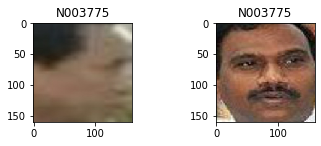

In [33]:
import matplotlib.pyplot as plt


img_paths = all_train_image_pair_paths[0]
label_indexs = all_train_image_pair_labels[0]
image1, image2 = preprocess_image(img_paths[0]), preprocess_image(img_paths[1])
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title(label_names[label_index].title())


plt.subplot(2,2,2)
plt.imshow(image2)

plt.grid(False)
plt.title(label_names[label_index].title())
print()

In [34]:
label_indexs

(117, 5)

In [87]:
input_shape = m.input_shape[1:]

In [88]:
input_shape

(160, 160, 3)

In [89]:
for layer in m.layers[:-6]:
    layer.trainable = False

In [90]:
def squared_differences(pair_of_tensors):
    x, y = pair_of_tensors
    return k.square(x - y)

In [91]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, add, Dropout, BatchNormalization

inputs1 = Input(input_shape)
inputs2 = Input(input_shape)
x1 = m(inputs1)
x2 = m(inputs2)
x1 = Model(inputs = inputs1, outputs = x1)
x2 = Model(inputs = inputs2, outputs = x2)


x = Lambda(squared_differences)([x1.output, x2.output])
X = Dense(8, activation = tf.nn.relu)(x)
X = Dropout(rate=0.2)(X)
X = BatchNormalization()(X)
 #x= Dropout(0.5)(X)
output = Dense(1, activation = 'sigmoid')(x)

In [92]:
model = Model(inputs =[x1.input,x2.input], outputs=output)
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)


In [93]:
all_train_image_pair_paths_a, all_train_image_pair_paths_b = list(zip(*all_train_image_pair_paths))
all_train_image_pair_paths_a = list(all_train_image_pair_paths_a)
all_train_image_pair_paths_b = list(all_train_image_pair_paths_b)

In [94]:
path_ds_a = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_a)
path_ds_b = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_b)

type(path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [95]:
train_image_datasource_a = path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource_b = path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource = tf.data.Dataset.zip((train_image_datasource_a, train_image_datasource_b))

In [96]:
train_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_data_labels, tf.int64))

In [97]:
train_datasource = tf.data.Dataset.zip((train_image_datasource, train_label_datasource))

In [98]:
all_test_image_pair_paths_a, all_test_image_pair_paths_b = list(zip(*all_test_image_pair_paths))
all_test_image_pair_paths_a = list(all_test_image_pair_paths_a)
all_test_image_pair_paths_b = list(all_test_image_pair_paths_b)

In [99]:
test_path_ds_a = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_a)
test_path_ds_b = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_b)

type(test_path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [100]:
test_image_datasource_a = test_path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource_b = test_path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource = tf.data.Dataset.zip((test_image_datasource_a, test_image_datasource_b))

In [101]:
test_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_test_data_labels, tf.int64))

In [102]:
test_datasource = tf.data.Dataset.zip((test_image_datasource, test_label_datasource))

In [103]:
# train_datasource = train_datasource.shuffle(buffer_size=1000)

In [104]:
train_datasource = train_datasource.repeat()

In [105]:
train_datasource = train_datasource.batch(BATCH_SIZE)

In [106]:
train_datasource = train_datasource.prefetch(buffer_size=AUTOTUNE)

In [107]:
# test_datasource = test_datasource.shuffle(buffer_size=1000)

In [108]:
test_datasource = test_datasource.repeat()

In [109]:
test_datasource = test_datasource.batch(BATCH_SIZE)

In [110]:
test_datasource = test_datasource.prefetch(buffer_size=AUTOTUNE)

In [111]:
int(len(all_test_image_pair_paths)/BATCH_SIZE)

349

In [ ]:

callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  #tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(train_datasource, epochs=100, callbacks = callbacks, steps_per_epoch=int(len(all_train_image_pair_paths)/BATCH_SIZE),
          validation_data=test_datasource, 
          validation_steps=int(len(all_test_image_pair_paths)/BATCH_SIZE))

Epoch 1/100


 204/1452 [===>..........................] - ETA: 5:57:01 - loss: 1.7962 - acc: 0.34 - ETA: 3:00:26 - loss: 1.9504 - acc: 0.31 - ETA: 2:01:35 - loss: 1.8905 - acc: 0.31 - ETA: 1:32:09 - loss: 1.8415 - acc: 0.31 - ETA: 1:14:28 - loss: 1.6709 - acc: 0.35 - ETA: 1:02:39 - loss: 1.7044 - acc: 0.34 - ETA: 54:14 - loss: 1.7169 - acc: 0.3438 - ETA: 47:56 - loss: 1.6630 - acc: 0.36 - ETA: 43:06 - loss: 1.6420 - acc: 0.35 - ETA: 39:09 - loss: 1.6009 - acc: 0.37 - ETA: 35:55 - loss: 1.5423 - acc: 0.38 - ETA: 33:15 - loss: 1.5048 - acc: 0.40 - ETA: 30:58 - loss: 1.4770 - acc: 0.40 - ETA: 29:00 - loss: 1.4448 - acc: 0.40 - ETA: 27:19 - loss: 1.4138 - acc: 0.41 - ETA: 25:51 - loss: 1.3842 - acc: 0.41 - ETA: 24:33 - loss: 1.3720 - acc: 0.42 - ETA: 23:24 - loss: 1.3495 - acc: 0.42 - ETA: 22:22 - loss: 1.3402 - acc: 0.43 - ETA: 21:25 - loss: 1.3213 - acc: 0.44 - ETA: 20:34 - loss: 1.3092 - acc: 0.44 - ETA: 19:47 - loss: 1.3055 - acc: 0.44 - ETA: 19:05 - loss: 1.3002 - acc: 0.44 - ETA: 18:27 - loss: 1.

1020/1452 [====================>.........] - ETA: 1:59 - loss: 0.2978 - acc: 0.883 - ETA: 1:58 - loss: 0.2976 - acc: 0.883 - ETA: 1:58 - loss: 0.2974 - acc: 0.883 - ETA: 1:58 - loss: 0.2972 - acc: 0.883 - ETA: 1:58 - loss: 0.2970 - acc: 0.883 - ETA: 1:58 - loss: 0.2968 - acc: 0.883 - ETA: 1:57 - loss: 0.2967 - acc: 0.883 - ETA: 1:57 - loss: 0.2966 - acc: 0.883 - ETA: 1:57 - loss: 0.2964 - acc: 0.883 - ETA: 1:57 - loss: 0.2962 - acc: 0.884 - ETA: 1:57 - loss: 0.2961 - acc: 0.884 - ETA: 1:56 - loss: 0.2958 - acc: 0.884 - ETA: 1:56 - loss: 0.2958 - acc: 0.884 - ETA: 1:56 - loss: 0.2956 - acc: 0.884 - ETA: 1:56 - loss: 0.2953 - acc: 0.884 - ETA: 1:56 - loss: 0.2951 - acc: 0.884 - ETA: 1:55 - loss: 0.2949 - acc: 0.884 - ETA: 1:55 - loss: 0.2949 - acc: 0.884 - ETA: 1:55 - loss: 0.2948 - acc: 0.884 - ETA: 1:55 - loss: 0.2946 - acc: 0.884 - ETA: 1:55 - loss: 0.2945 - acc: 0.884 - ETA: 1:54 - loss: 0.2943 - acc: 0.884 - ETA: 1:54 - loss: 0.2941 - acc: 0.885 - ETA: 1:54 - loss: 0.2939 - acc: 0.8

1229/1452 [========================>.....] - ETA: 1:19 - loss: 0.2740 - acc: 0.893 - ETA: 1:19 - loss: 0.2740 - acc: 0.893 - ETA: 1:19 - loss: 0.2738 - acc: 0.893 - ETA: 1:18 - loss: 0.2737 - acc: 0.893 - ETA: 1:18 - loss: 0.2737 - acc: 0.893 - ETA: 1:18 - loss: 0.2739 - acc: 0.893 - ETA: 1:18 - loss: 0.2740 - acc: 0.893 - ETA: 1:18 - loss: 0.2739 - acc: 0.893 - ETA: 1:17 - loss: 0.2738 - acc: 0.893 - ETA: 1:17 - loss: 0.2737 - acc: 0.893 - ETA: 1:17 - loss: 0.2736 - acc: 0.893 - ETA: 1:17 - loss: 0.2735 - acc: 0.893 - ETA: 1:17 - loss: 0.2734 - acc: 0.893 - ETA: 1:16 - loss: 0.2733 - acc: 0.893 - ETA: 1:16 - loss: 0.2732 - acc: 0.893 - ETA: 1:16 - loss: 0.2731 - acc: 0.893 - ETA: 1:16 - loss: 0.2732 - acc: 0.893 - ETA: 1:16 - loss: 0.2731 - acc: 0.893 - ETA: 1:15 - loss: 0.2732 - acc: 0.893 - ETA: 1:15 - loss: 0.2730 - acc: 0.893 - ETA: 1:15 - loss: 0.2730 - acc: 0.893 - ETA: 1:15 - loss: 0.2728 - acc: 0.893 - ETA: 1:15 - loss: 0.2728 - acc: 0.893 - ETA: 1:15 - loss: 0.2728 - acc: 0.8

1444/1452 [============================>.] - ETA: 40s - loss: 0.2589 - acc: 0.90 - ETA: 40s - loss: 0.2588 - acc: 0.90 - ETA: 40s - loss: 0.2588 - acc: 0.90 - ETA: 39s - loss: 0.2587 - acc: 0.90 - ETA: 39s - loss: 0.2586 - acc: 0.90 - ETA: 39s - loss: 0.2585 - acc: 0.90 - ETA: 39s - loss: 0.2583 - acc: 0.90 - ETA: 39s - loss: 0.2582 - acc: 0.90 - ETA: 38s - loss: 0.2581 - acc: 0.90 - ETA: 38s - loss: 0.2580 - acc: 0.90 - ETA: 38s - loss: 0.2579 - acc: 0.90 - ETA: 38s - loss: 0.2578 - acc: 0.90 - ETA: 38s - loss: 0.2578 - acc: 0.90 - ETA: 37s - loss: 0.2578 - acc: 0.90 - ETA: 37s - loss: 0.2577 - acc: 0.90 - ETA: 37s - loss: 0.2576 - acc: 0.90 - ETA: 37s - loss: 0.2575 - acc: 0.90 - ETA: 37s - loss: 0.2574 - acc: 0.90 - ETA: 37s - loss: 0.2573 - acc: 0.90 - ETA: 36s - loss: 0.2574 - acc: 0.90 - ETA: 36s - loss: 0.2573 - acc: 0.90 - ETA: 36s - loss: 0.2572 - acc: 0.90 - ETA: 36s - loss: 0.2572 - acc: 0.90 - ETA: 36s - loss: 0.2571 - acc: 0.90 - ETA: 35s - loss: 0.2570 - acc: 0.90 - ETA: 

204/349 [================>.............].] - ETA: 1s - loss: 0.2456 - acc: 0.906 - ETA: 1s - loss: 0.2456 - acc: 0.906 - ETA: 0s - loss: 0.2456 - acc: 0.906 - ETA: 0s - loss: 0.2455 - acc: 0.906 - ETA: 0s - loss: 0.2454 - acc: 0.906 - ETA: 0s - loss: 0.2453 - acc: 0.906 - ETA: 0s - loss: 0.2452 - acc: 0.9065 - ETA: 25:05 - loss: 1.4850 - acc: 0.59 - ETA: 12:56 - loss: 1.1157 - acc: 0.67 - ETA: 8:53 - loss: 1.2908 - acc: 0.5729 - ETA: 6:51 - loss: 1.3789 - acc: 0.531 - ETA: 5:37 - loss: 1.3478 - acc: 0.550 - ETA: 4:49 - loss: 1.2998 - acc: 0.546 - ETA: 4:14 - loss: 1.2605 - acc: 0.540 - ETA: 3:48 - loss: 1.2174 - acc: 0.554 - ETA: 3:28 - loss: 1.2396 - acc: 0.548 - ETA: 3:11 - loss: 1.2753 - acc: 0.553 - ETA: 2:58 - loss: 1.2940 - acc: 0.562 - ETA: 2:47 - loss: 1.2592 - acc: 0.559 - ETA: 2:37 - loss: 1.2596 - acc: 0.562 - ETA: 2:29 - loss: 1.2759 - acc: 0.564 - ETA: 2:22 - loss: 1.2602 - acc: 0.570 - ETA: 2:15 - loss: 1.2591 - acc: 0.572 - ETA: 2:10 - loss: 1.2680 - acc: 0.569 - ETA: 2:

1452/1452 [==============================] - 325s 224ms/step - loss: 0.2451 - acc: 0.9065 - val_loss: 1.3777 - val_acc: 0.5253
Epoch 2/100
 204/1452 [===>..........................] - ETA: 4:56 - loss: 0.2982 - acc: 0.843 - ETA: 4:55 - loss: 0.2427 - acc: 0.906 - ETA: 4:55 - loss: 0.2155 - acc: 0.927 - ETA: 4:58 - loss: 0.2703 - acc: 0.914 - ETA: 5:00 - loss: 0.2589 - acc: 0.918 - ETA: 4:57 - loss: 0.2819 - acc: 0.906 - ETA: 4:58 - loss: 0.2594 - acc: 0.910 - ETA: 5:00 - loss: 0.2704 - acc: 0.906 - ETA: 5:01 - loss: 0.2796 - acc: 0.899 - ETA: 4:59 - loss: 0.2626 - acc: 0.906 - ETA: 4:58 - loss: 0.2657 - acc: 0.906 - ETA: 4:57 - loss: 0.2649 - acc: 0.906 - ETA: 4:54 - loss: 0.2544 - acc: 0.908 - ETA: 4:54 - loss: 0.2457 - acc: 0.912 - ETA: 4:54 - loss: 0.2416 - acc: 0.912 - ETA: 4:55 - loss: 0.2461 - acc: 0.908 - ETA: 4:54 - loss: 0.2361 - acc: 0.913 - ETA: 4:54 - loss: 0.2306 - acc: 0.916 - ETA: 4:54 - loss: 0.2252 - acc: 0.916 - ETA: 4:54 - loss: 0.2214 - acc: 0.917 - ETA: 4:53 - loss

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)